In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("WHO-COVID-19-global-data.csv")

In [3]:
df.head()

Date_reported Country_code      Country WHO_region  New_cases  \
0      1/3/2020           AF  Afghanistan       EMRO          0   
1      1/4/2020           AF  Afghanistan       EMRO          0   
2      1/5/2020           AF  Afghanistan       EMRO          0   
3      1/6/2020           AF  Afghanistan       EMRO          0   
4      1/7/2020           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      4074 non-null   object
 1   Country_code       4074 non-null   object
 2   Country            4074 non-null   object
 3   WHO_region         4074 non-null   object
 4   New_cases          4074 non-null   int64 
 5   Cumulative_cases   4074 non-null   int64 
 6   New_deaths         4074 non-null   int64 
 7   Cumulative_deaths  4074 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 254.8+ KB


In [5]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [6]:
#selecting specific columns like cumulative_cases column that we need
#3. Select only the “Cumulative cases” column.
covid_data= df[['Date_reported', 'Country_code', 'Country','Cumulative_cases']]


In [7]:
covid_data

Date_reported Country_code      Country  Cumulative_cases
0         1/3/2020           AF  Afghanistan                 0
1         1/4/2020           AF  Afghanistan                 0
2         1/5/2020           AF  Afghanistan                 0
3         1/6/2020           AF  Afghanistan                 0
4         1/7/2020           AF  Afghanistan                 0
...            ...          ...          ...               ...
4069     9/17/2023           IN        India          44998162
4070     9/18/2023           IN        India          44998162
4071     9/19/2023           IN        India          44998162
4072     9/20/2023           IN        India          44998162
4073     9/21/2023           IN        India          44998162

[4074 rows x 4 columns]

In [8]:
covid_data_afg = covid_data[covid_data["Country"]== "Afghanistan"]

In [9]:
covid_data_afg.head()

Date_reported Country_code      Country  Cumulative_cases
0      1/3/2020           AF  Afghanistan                 0
1      1/4/2020           AF  Afghanistan                 0
2      1/5/2020           AF  Afghanistan                 0
3      1/6/2020           AF  Afghanistan                 0
4      1/7/2020           AF  Afghanistan                 0

## Below Plot depicts increase cases of covid patients of Afghanisthan from 2020 t0 2023. As we can see sudden spike of covid cumulative cases come from 3/28/2020 is 80 patients, then increasing on monthly basis. Covid patients are started in continuous order from 3/28/2020 and it become 106 on 30-03-2020 & continuously increasing on yearly basis and become high in july 2023.


/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/889107916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_afg['Date_reported'] = pd.to_datetime(covid_data_afg['Date_reported'])


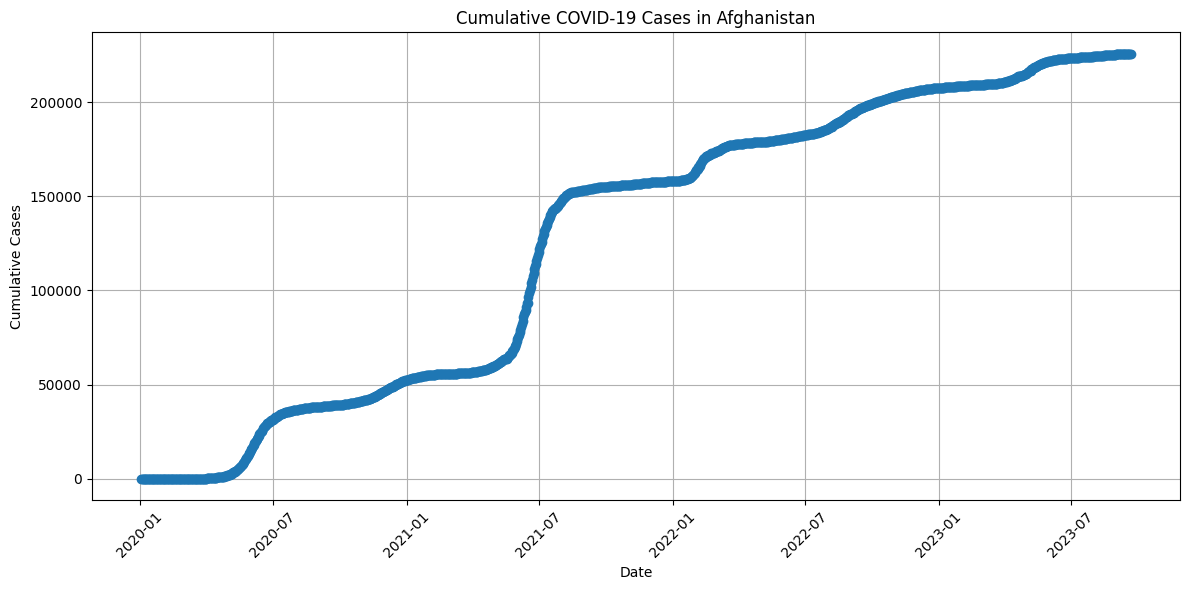

In [10]:
#Solution of 4th & 5th Question:

covid_data_afg['Date_reported'] = pd.to_datetime(covid_data_afg['Date_reported'])

# Sort the DataFrame by the 'Date_reported' column to ensure the dates are in order
covid_data_afg = covid_data_afg.sort_values(by='Date_reported')

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the cumulative cases over time
plt.plot(covid_data_afg['Date_reported'], covid_data_afg['Cumulative_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in Afghanistan')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

I want to do deep analysis so I used data from 01-01-2020 to 31-05-2020. Here we'll use elbow method for deep analysis: 
In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use with the help of website https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use. By using elbow method I found, there is sudden increament of covid patients from May month 2020 (1937 cases) & it become increasing day by day.

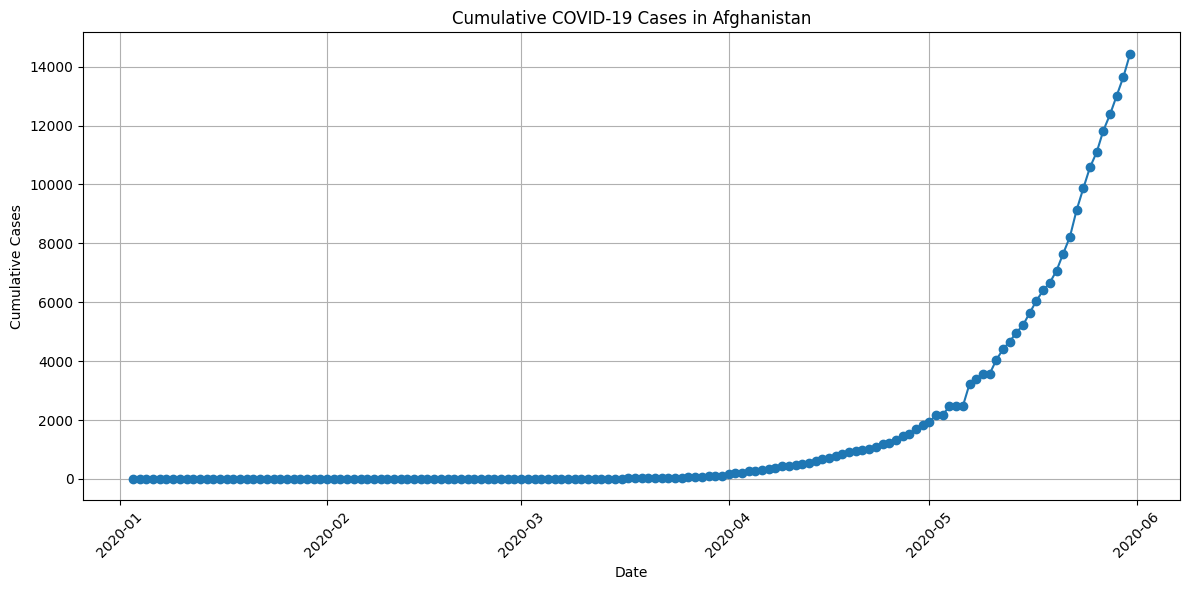

In [11]:
covid_data_afg_jan_may = covid_data_afg[(covid_data_afg["Date_reported"]>= "2020-01-01") & (covid_data_afg["Date_reported"]<= "2020-05-31")]
# Sort the DataFrame by the 'Date_reported' column to ensure the dates are in order
covid_data_afg_jan_may = covid_data_afg_jan_may.sort_values(by='Date_reported')

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the cumulative cases over time
plt.plot(covid_data_afg_jan_may['Date_reported'], covid_data_afg_jan_may['Cumulative_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in Afghanistan')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

In [12]:
covid_data


Date_reported Country_code      Country  Cumulative_cases
0         1/3/2020           AF  Afghanistan                 0
1         1/4/2020           AF  Afghanistan                 0
2         1/5/2020           AF  Afghanistan                 0
3         1/6/2020           AF  Afghanistan                 0
4         1/7/2020           AF  Afghanistan                 0
...            ...          ...          ...               ...
4069     9/17/2023           IN        India          44998162
4070     9/18/2023           IN        India          44998162
4071     9/19/2023           IN        India          44998162
4072     9/20/2023           IN        India          44998162
4073     9/21/2023           IN        India          44998162

[4074 rows x 4 columns]

In [13]:
covid_data_cn = covid_data[covid_data["Country"]== "China"]

In [14]:
covid_data_cn.head()

Date_reported Country_code Country  Cumulative_cases
1358      1/3/2020           CN   China                 0
1359      1/4/2020           CN   China                 1
1360      1/5/2020           CN   China                 1
1361      1/6/2020           CN   China                 4
1362      1/7/2020           CN   China                 4

##Below Plot depicts increase cases of covid patients of China from 2020 t0 2023. As we can see starting of covid cumulative cases is from 1/19/2020 is 125 patients, then increasing on monthly basis. But can not able to find more info about data from the below graph.


/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/4151773872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_cn['Date_reported'] = pd.to_datetime(covid_data_cn['Date_reported'])


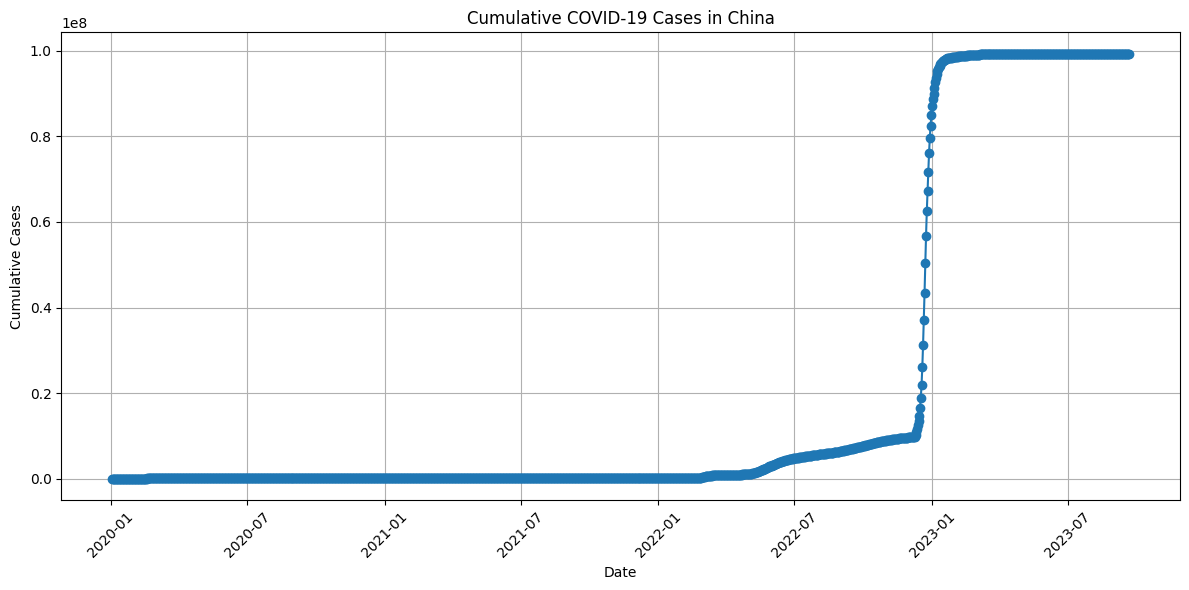

In [15]:
#Solution of 4th & 5th Question:

covid_data_cn['Date_reported'] = pd.to_datetime(covid_data_cn['Date_reported'])

# Sort the DataFrame by the 'Date_reported' column to ensure the dates are in order
covid_data_cn = covid_data_cn.sort_values(by='Date_reported')

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the cumulative cases over time
plt.plot(covid_data_cn['Date_reported'], covid_data_cn['Cumulative_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in China')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

I want to do deep analysis so I used data from 01-01-2020 to 31-05-2020. Here we'll agian use elbow method for deep analysis: 
By using elbow method I found, there is sudden increament of covid patiend from end of Jan month 2020 (9720 cases) & it become increasing day by day.
Here we can see long tail ('Long tails (wider than the normal distribution) – Points start below the line, bend to follow it, and end above it') strating from 44730 cases to 59882 on 12 & 13th Feb respectively and reached to 80000 cases till March month 2020 and become constant for sometime till mid of march month then sudden increament of covid cases till June month.

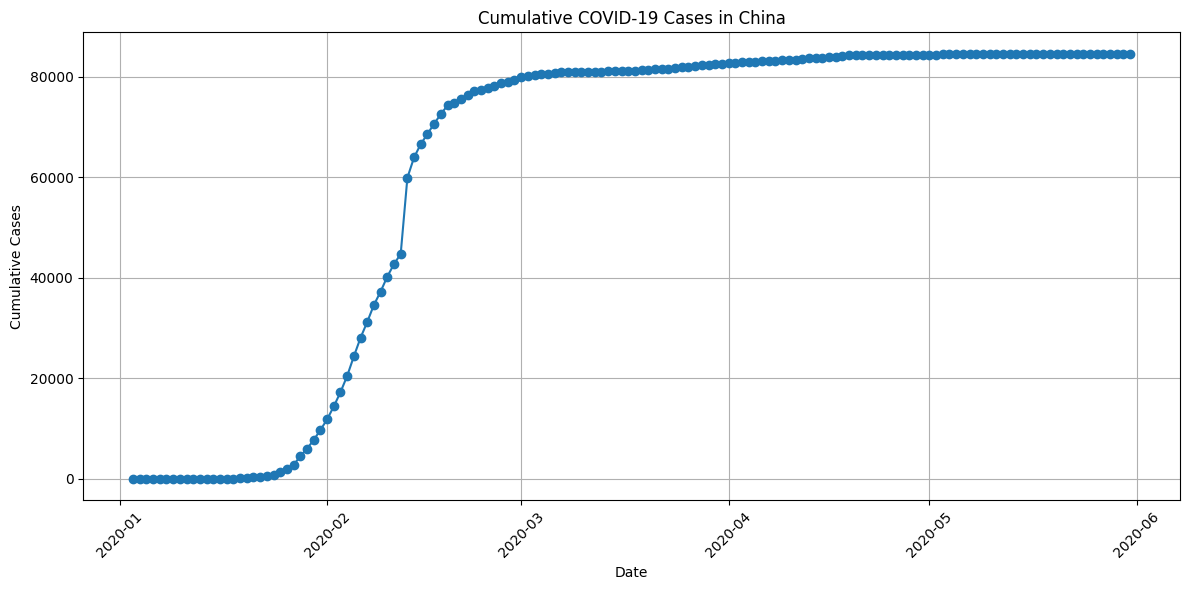

In [16]:
covid_data_cn_jan_may = covid_data_cn[(covid_data_cn["Date_reported"]>= "2020-01-01") & (covid_data_cn["Date_reported"]<= "2020-05-31")]
# Sort the DataFrame by the 'Date_reported' column to ensure the dates are in order
covid_data_cn_jan_may= covid_data_cn_jan_may.sort_values(by='Date_reported')

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the cumulative cases over time
plt.plot(covid_data_cn_jan_may['Date_reported'], covid_data_cn_jan_may['Cumulative_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in China')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

In [17]:
covid_data_cn

Date_reported Country_code Country  Cumulative_cases
1358    2020-01-03           CN   China                 0
1359    2020-01-04           CN   China                 1
1360    2020-01-05           CN   China                 1
1361    2020-01-06           CN   China                 4
1362    2020-01-07           CN   China                 4
...            ...          ...     ...               ...
2711    2023-09-17           CN   China          99309232
2712    2023-09-18           CN   China          99309232
2713    2023-09-19           CN   China          99309232
2714    2023-09-20           CN   China          99309232
2715    2023-09-21           CN   China          99309232

[1358 rows x 4 columns]

In [18]:
covid_data_in = covid_data[covid_data["Country"]== "India"]

In [19]:
covid_data_in.head()

Date_reported Country_code Country  Cumulative_cases
2716      1/3/2020           IN   India                 0
2717      1/4/2020           IN   India                 0
2718      1/5/2020           IN   India                 0
2719      1/6/2020           IN   India                 0
2720      1/7/2020           IN   India                 0

##Below Plot depicts increase cases of covid patients of India from 2020 t0 2023. As we can see sudden spike of covid cumulative cases come from 3/11/2020 is 60 patients, then increasing on monthly basis. Covid patients are started in continuous order from 3/11/2020 and it become 107 on 15-03-2020 & continuously increasing on yearly basis and become high in july 2023.


/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/2795955429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_in['Date_reported'] = pd.to_datetime(covid_data_in['Date_reported'])


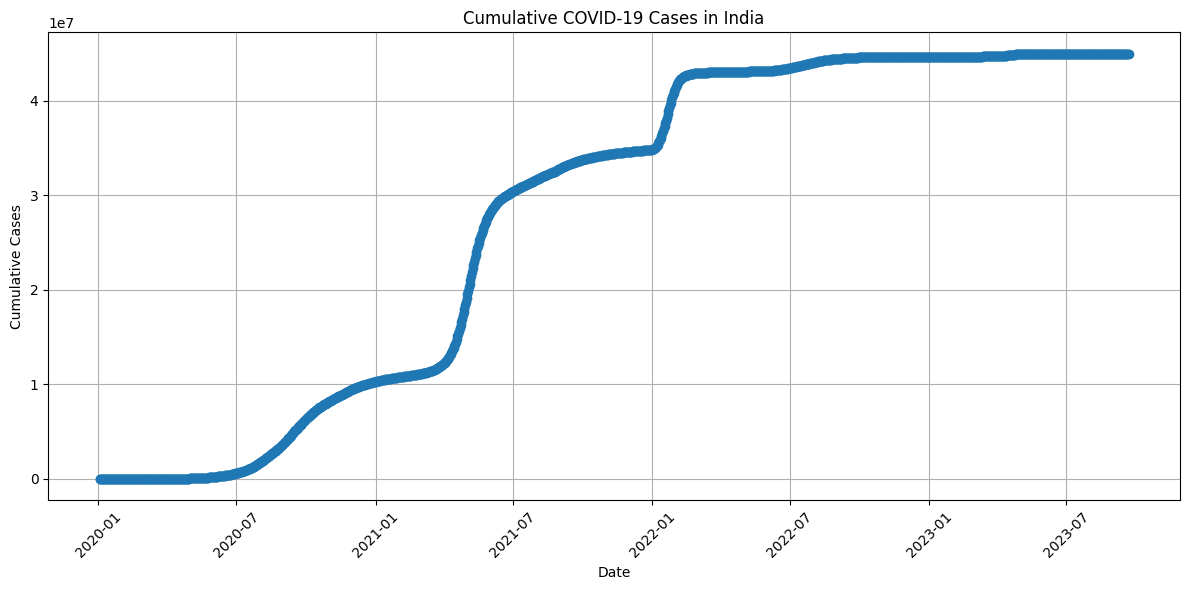

In [20]:
#Solution of 4th & 5th Question:

covid_data_in['Date_reported'] = pd.to_datetime(covid_data_in['Date_reported'])

# Sort the DataFrame by the 'Date_reported' column to ensure the dates are in order
covid_data = covid_data_in.sort_values(by='Date_reported')

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the cumulative cases over time
plt.plot(covid_data_in['Date_reported'], covid_data_in['Cumulative_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in India')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

I want to deep analysis so I used data from 01-01-2020 to 31-05-2020. Here we'll agian use elbow method for deep analysis: 
By using elbow method I found, there is sudden increament of covid patiend from April month 2020 (9152 cases) & it become increasing day by day.


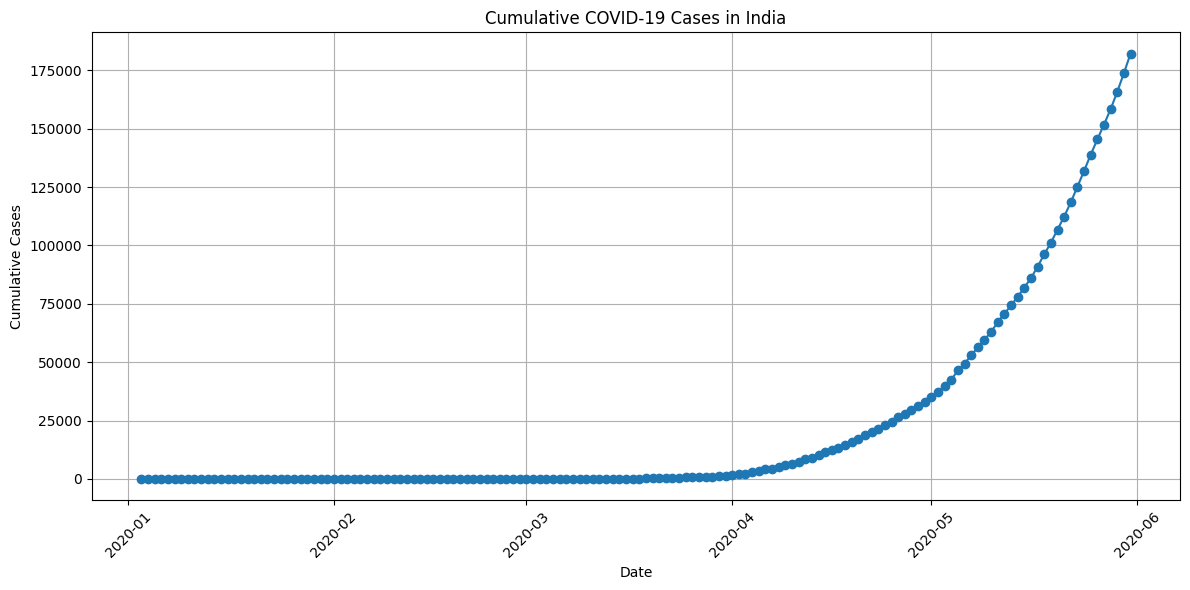

In [21]:
covid_data_in_jan_may = covid_data_in[(covid_data_in["Date_reported"]>= "2020-01-01") & (covid_data_in["Date_reported"]<= "2020-05-31")]
# Sort the DataFrame by the 'Date_reported' column to ensure the dates are in order
covid_data_in_jan_may = covid_data_in_jan_may.sort_values(by='Date_reported')

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the cumulative cases over time
plt.plot(covid_data_in_jan_may ['Date_reported'], covid_data_in_jan_may ['Cumulative_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in India')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

By the usage of google we can find the total population value of each country. It is done through the help of site  https://www.worldometers.info/world-population/. By this website, the population of each country in 2022 is given below:
•	Afghanistan: 41128771
•	China: 1425887337
•	India:  1417173173


In [22]:
covid_data_in

Date_reported Country_code Country  Cumulative_cases
2716    2020-01-03           IN   India                 0
2717    2020-01-04           IN   India                 0
2718    2020-01-05           IN   India                 0
2719    2020-01-06           IN   India                 0
2720    2020-01-07           IN   India                 0
...            ...          ...     ...               ...
4069    2023-09-17           IN   India          44998162
4070    2023-09-18           IN   India          44998162
4071    2023-09-19           IN   India          44998162
4072    2023-09-20           IN   India          44998162
4073    2023-09-21           IN   India          44998162

[1358 rows x 4 columns]

In [23]:
population_afg = 41128771  # Afghanistan's population
covid_data_afg['Normalized_cases'] = covid_data_afg['Cumulative_cases'] / population_afg
covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
0       2020-01-03           AF  Afghanistan                 0   
1       2020-01-04           AF  Afghanistan                 0   
2       2020-01-05           AF  Afghanistan                 0   
3       2020-01-06           AF  Afghanistan                 0   
4       2020-01-07           AF  Afghanistan                 0   
...            ...          ...          ...               ...   
1353    2023-09-17           AF  Afghanistan            225786   
1354    2023-09-18           AF  Afghanistan            225786   
1355    2023-09-19           AF  Afghanistan            225786   
1356    2023-09-20           AF  Afghanistan            225786   
1357    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  
0              0.00000  
1              0.00000  
2              0.00000  
3              0.00000  
4              0.00000  
...                ...  
1353           0.00549  
1354           0.00549  
1355           0.00549  
1356           0.00549  
1357           0.00549  

[1358 rows x 5 columns]

In [24]:
population_cn = 1425887337  # china's population
covid_data_cn['Normalized_cases'] = covid_data_cn['Cumulative_cases'] / population_cn
covid_data_cn
covid_data_cn


Date_reported Country_code Country  Cumulative_cases  Normalized_cases
1358    2020-01-03           CN   China                 0      0.000000e+00
1359    2020-01-04           CN   China                 1      7.013177e-10
1360    2020-01-05           CN   China                 1      7.013177e-10
1361    2020-01-06           CN   China                 4      2.805271e-09
1362    2020-01-07           CN   China                 4      2.805271e-09
...            ...          ...     ...               ...               ...
2711    2023-09-17           CN   China          99309232      6.964732e-02
2712    2023-09-18           CN   China          99309232      6.964732e-02
2713    2023-09-19           CN   China          99309232      6.964732e-02
2714    2023-09-20           CN   China          99309232      6.964732e-02
2715    2023-09-21           CN   China          99309232      6.964732e-02

[1358 rows x 5 columns]

In [25]:
population_in = 1417173173  # India's population
covid_data_in['Normalized_cases'] = covid_data_in['Cumulative_cases'] / population_in
covid_data_in



/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/2552887976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_in['Normalized_cases'] = covid_data_in['Cumulative_cases'] / population_in


Date_reported Country_code Country  Cumulative_cases  Normalized_cases
2716    2020-01-03           IN   India                 0          0.000000
2717    2020-01-04           IN   India                 0          0.000000
2718    2020-01-05           IN   India                 0          0.000000
2719    2020-01-06           IN   India                 0          0.000000
2720    2020-01-07           IN   India                 0          0.000000
...            ...          ...     ...               ...               ...
4069    2023-09-17           IN   India          44998162          0.031752
4070    2023-09-18           IN   India          44998162          0.031752
4071    2023-09-19           IN   India          44998162          0.031752
4072    2023-09-20           IN   India          44998162          0.031752
4073    2023-09-21           IN   India          44998162          0.031752

[1358 rows x 5 columns]

The graph shows normalized cumulative COVID-19 cases in Afghanistan starting from 30-03-2020, after the country had reached 106 cases. It reveals a steady increase in cases per capita over time, reflecting the ongoing impact of the pandemic in Afghanistan despite population normalization.

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/1812436750.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_afg['Normalized_cases'] = covid_data_afg['Cumulative_cases'] / population_afg


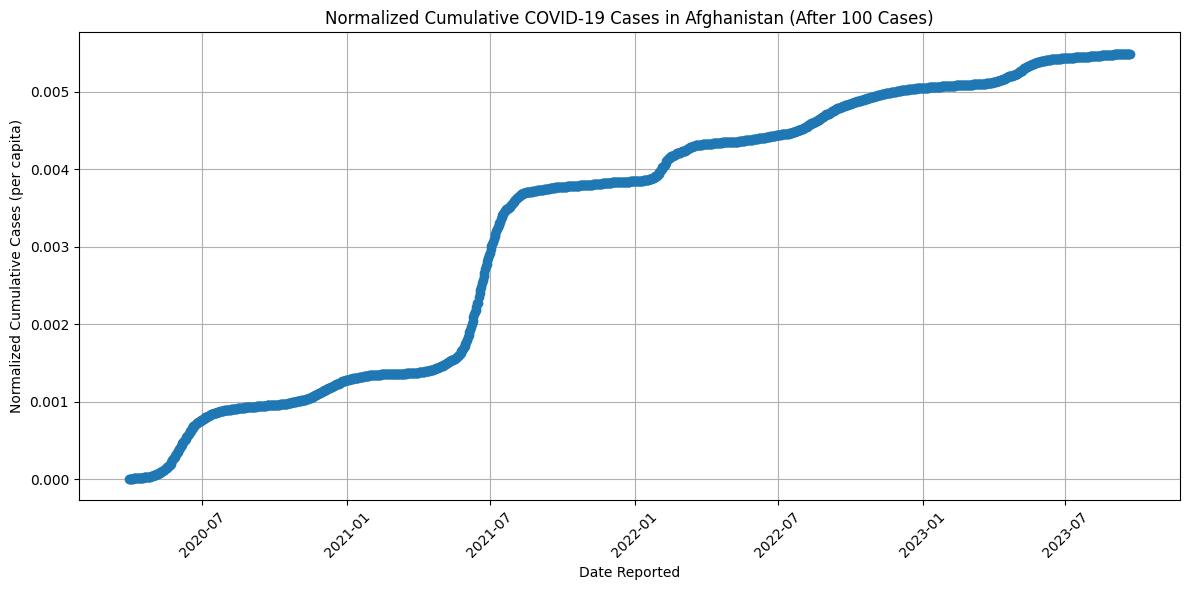

In [26]:
# Assuming you have the 'covid_data_afg' DataFrame with the necessary data and the population of Afghanistan

# Convert 'Date_reported' to datetime
covid_data_afg['Date_reported'] = pd.to_datetime(covid_data_afg['Date_reported'])

# Filter the data for dates starting from 30-03-2020
covid_data_afg = covid_data_afg[covid_data_afg['Date_reported'] >= '2020-03-30']

# Normalize the cumulative cases by dividing by the population of Afghanistan
population_afg = 41128771  # Afghanistan's population
covid_data_afg['Normalized_cases'] = covid_data_afg['Cumulative_cases'] / population_afg

# Filter the data for dates after 100 cases
covid_data_afg = covid_data_afg[covid_data_afg['Cumulative_cases'] >= 100]

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the normalized cumulative cases over time
plt.plot(covid_data_afg['Date_reported'], covid_data_afg['Normalized_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date Reported')
plt.ylabel('Normalized Cumulative Cases (per capita)')
plt.title('Normalized Cumulative COVID-19 Cases in Afghanistan (After 100 Cases)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

The graph shows normalized cumulative COVID-19 cases in China starting from 19-01-2020, after the country had reached 125 cases. It reveals a steady increase in cases per capita over time, reflecting the ongoing impact of the pandemic in China despite population normalization.

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/3808605174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_cn['Normalized_cases'] = covid_data_cn['Cumulative_cases'] / population_afg


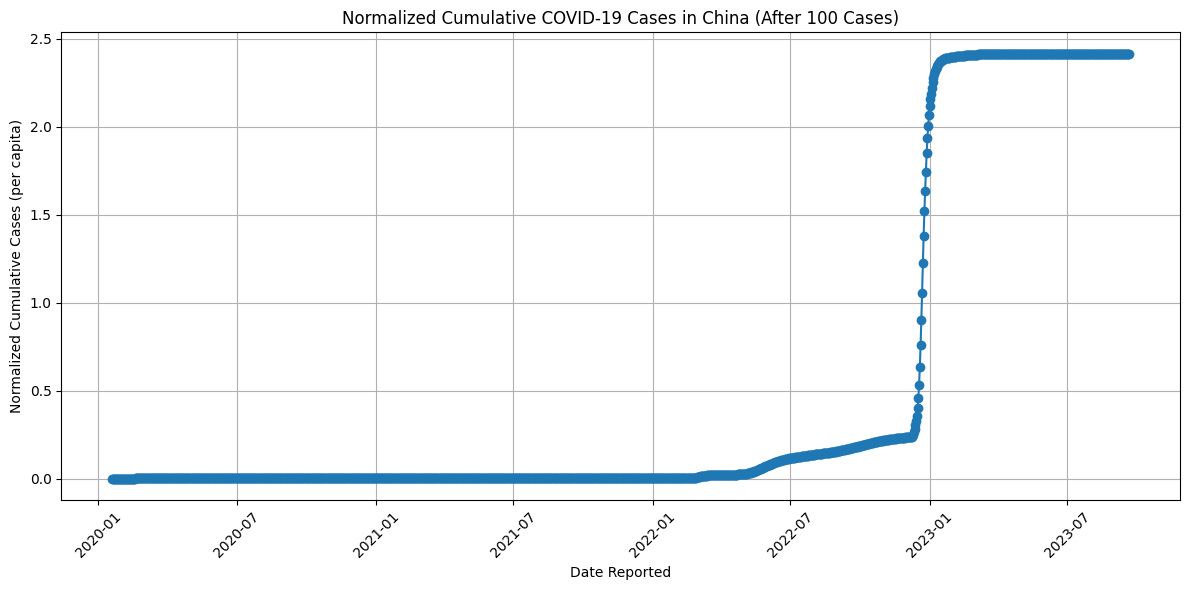

In [27]:
# Assuming you have the 'covid_data_afg' DataFrame with the necessary data and the population of Afghanistan

# Convert 'Date_reported' to datetime
covid_data_cn['Date_reported'] = pd.to_datetime(covid_data_cn['Date_reported'])

# Filter the data for dates starting from 30-03-2020
covid_data_cn = covid_data_cn[covid_data_cn['Date_reported'] >= '2020-01-19']

# Normalize the cumulative cases by dividing by the population of Afghanistan
population_cn = 1425887337  # Afghanistan's population
covid_data_cn['Normalized_cases'] = covid_data_cn['Cumulative_cases'] / population_afg

# Filter the data for dates after 100 cases
covid_data_cn = covid_data_cn[covid_data_cn['Cumulative_cases'] >= 100]

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the normalized cumulative cases over time
plt.plot(covid_data_cn['Date_reported'], covid_data_cn['Normalized_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date Reported')
plt.ylabel('Normalized Cumulative Cases (per capita)')
plt.title('Normalized Cumulative COVID-19 Cases in China (After 100 Cases)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

The graph shows normalized cumulative COVID-19 cases in India starting from 15-03-2020, after the country had reached 107 cases. It reveals a steady increase in cases per capita over time, reflecting the ongoing impact of the pandemic in India despite population normalization.

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/927242765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_in['Date_reported'] = pd.to_datetime(covid_data_in['Date_reported'])
/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/927242765.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_in['Normalized_cases'] = covid_data_in['Cumulative_cases'] / population_afg


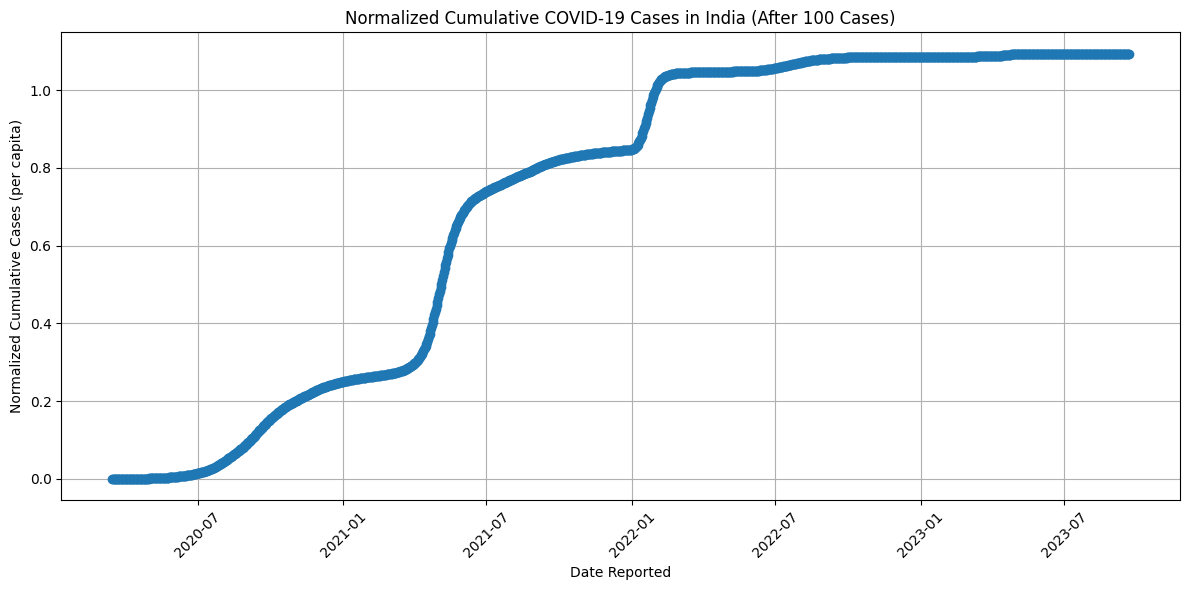

In [28]:
# Assuming you have the 'covid_data_afg' DataFrame with the necessary data and the population of Afghanistan

# Convert 'Date_reported' to datetime
covid_data_in['Date_reported'] = pd.to_datetime(covid_data_in['Date_reported'])

# Filter the data for dates starting from 30-03-2020
covid_data_in = covid_data_in[covid_data_in['Date_reported'] >= '2020-03-15']

# Normalize the cumulative cases by dividing by the population of Afghanistan
population_in = 1417173173  # Afghanistan's population
covid_data_in['Normalized_cases'] = covid_data_in['Cumulative_cases'] / population_afg

# Filter the data for dates after 100 cases
covid_data_in = covid_data_in[covid_data_in['Cumulative_cases'] >= 100]

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the normalized cumulative cases over time
plt.plot(covid_data_in['Date_reported'], covid_data_in['Normalized_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date Reported')
plt.ylabel('Normalized Cumulative Cases (per capita)')
plt.title('Normalized Cumulative COVID-19 Cases in India (After 100 Cases)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

In [29]:
covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
87      2020-03-30           AF  Afghanistan               106   
88      2020-03-31           AF  Afghanistan               114   
89      2020-04-01           AF  Afghanistan               166   
90      2020-04-02           AF  Afghanistan               192   
91      2020-04-03           AF  Afghanistan               194   
...            ...          ...          ...               ...   
1353    2023-09-17           AF  Afghanistan            225786   
1354    2023-09-18           AF  Afghanistan            225786   
1355    2023-09-19           AF  Afghanistan            225786   
1356    2023-09-20           AF  Afghanistan            225786   
1357    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  
87            0.000003  
88            0.000003  
89            0.000004  
90            0.000005  
91            0.000005  
...                ...  
1353          0.005490  
1354          0.005490  
1355          0.005490  
1356          0.005490  
1357          0.005490  

[1271 rows x 5 columns]

In [30]:
covid_data_afg.reset_index(drop=True, inplace=True)

covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
0       2020-03-30           AF  Afghanistan               106   
1       2020-03-31           AF  Afghanistan               114   
2       2020-04-01           AF  Afghanistan               166   
3       2020-04-02           AF  Afghanistan               192   
4       2020-04-03           AF  Afghanistan               194   
...            ...          ...          ...               ...   
1266    2023-09-17           AF  Afghanistan            225786   
1267    2023-09-18           AF  Afghanistan            225786   
1268    2023-09-19           AF  Afghanistan            225786   
1269    2023-09-20           AF  Afghanistan            225786   
1270    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  
0             0.000003  
1             0.000003  
2             0.000004  
3             0.000005  
4             0.000005  
...                ...  
1266          0.005490  
1267          0.005490  
1268          0.005490  
1269          0.005490  
1270          0.005490  

[1271 rows x 5 columns]

In [31]:
covid_data_cn.reset_index(drop=True, inplace=True)

covid_data_cn

Date_reported Country_code Country  Cumulative_cases  Normalized_cases
0       2020-01-19           CN   China               125          0.000003
1       2020-01-20           CN   China               202          0.000005
2       2020-01-21           CN   China               295          0.000007
3       2020-01-22           CN   China               442          0.000011
4       2020-01-23           CN   China               574          0.000014
...            ...          ...     ...               ...               ...
1337    2023-09-17           CN   China          99309232          2.414593
1338    2023-09-18           CN   China          99309232          2.414593
1339    2023-09-19           CN   China          99309232          2.414593
1340    2023-09-20           CN   China          99309232          2.414593
1341    2023-09-21           CN   China          99309232          2.414593

[1342 rows x 5 columns]

In [32]:
covid_data_in.reset_index(drop=True, inplace=True)

covid_data_in

Date_reported Country_code Country  Cumulative_cases  Normalized_cases
0       2020-03-15           IN   India               107          0.000003
1       2020-03-16           IN   India               114          0.000003
2       2020-03-17           IN   India               137          0.000003
3       2020-03-18           IN   India               151          0.000004
4       2020-03-19           IN   India               173          0.000004
...            ...          ...     ...               ...               ...
1281    2023-09-17           IN   India          44998162          1.094080
1282    2023-09-18           IN   India          44998162          1.094080
1283    2023-09-19           IN   India          44998162          1.094080
1284    2023-09-20           IN   India          44998162          1.094080
1285    2023-09-21           IN   India          44998162          1.094080

[1286 rows x 5 columns]

In [33]:
covid_data_in

Date_reported Country_code Country  Cumulative_cases  Normalized_cases
0       2020-03-15           IN   India               107          0.000003
1       2020-03-16           IN   India               114          0.000003
2       2020-03-17           IN   India               137          0.000003
3       2020-03-18           IN   India               151          0.000004
4       2020-03-19           IN   India               173          0.000004
...            ...          ...     ...               ...               ...
1281    2023-09-17           IN   India          44998162          1.094080
1282    2023-09-18           IN   India          44998162          1.094080
1283    2023-09-19           IN   India          44998162          1.094080
1284    2023-09-20           IN   India          44998162          1.094080
1285    2023-09-21           IN   India          44998162          1.094080

[1286 rows x 5 columns]

## 7(a) 
For the first wave take the data as is. For the second and further waves, subtract the
8(b) value at the last point of previous wave from the data

In [34]:
covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
0       2020-03-30           AF  Afghanistan               106   
1       2020-03-31           AF  Afghanistan               114   
2       2020-04-01           AF  Afghanistan               166   
3       2020-04-02           AF  Afghanistan               192   
4       2020-04-03           AF  Afghanistan               194   
...            ...          ...          ...               ...   
1266    2023-09-17           AF  Afghanistan            225786   
1267    2023-09-18           AF  Afghanistan            225786   
1268    2023-09-19           AF  Afghanistan            225786   
1269    2023-09-20           AF  Afghanistan            225786   
1270    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  
0             0.000003  
1             0.000003  
2             0.000004  
3             0.000005  
4             0.000005  
...                ...  
1266          0.005490  
1267          0.005490  
1268          0.005490  
1269          0.005490  
1270          0.005490  

[1271 rows x 5 columns]

In [35]:
# Calculate the number of days for each data point
covid_data_afg['Days_since_start'] = (covid_data_afg['Date_reported'] - covid_data_afg['Date_reported'].min()).dt.days


covid_data_afg['Log_Normalized_cases'] = np.log10(covid_data_afg['Normalized_cases'])

In [36]:
covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
0       2020-03-30           AF  Afghanistan               106   
1       2020-03-31           AF  Afghanistan               114   
2       2020-04-01           AF  Afghanistan               166   
3       2020-04-02           AF  Afghanistan               192   
4       2020-04-03           AF  Afghanistan               194   
...            ...          ...          ...               ...   
1266    2023-09-17           AF  Afghanistan            225786   
1267    2023-09-18           AF  Afghanistan            225786   
1268    2023-09-19           AF  Afghanistan            225786   
1269    2023-09-20           AF  Afghanistan            225786   
1270    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  Days_since_start  Log_Normalized_cases  
0             0.000003                 0             -5.588840  
1             0.000003                 1             -5.557241  
2             0.000004                 2             -5.394038  
3             0.000005                 3             -5.330845  
4             0.000005                 4             -5.326344  
...                ...               ...                   ...  
1266          0.005490              1266             -2.260449  
1267          0.005490              1267             -2.260449  
1268          0.005490              1268             -2.260449  
1269          0.005490              1269             -2.260449  
1270          0.005490              1270             -2.260449  

[1271 rows x 7 columns]

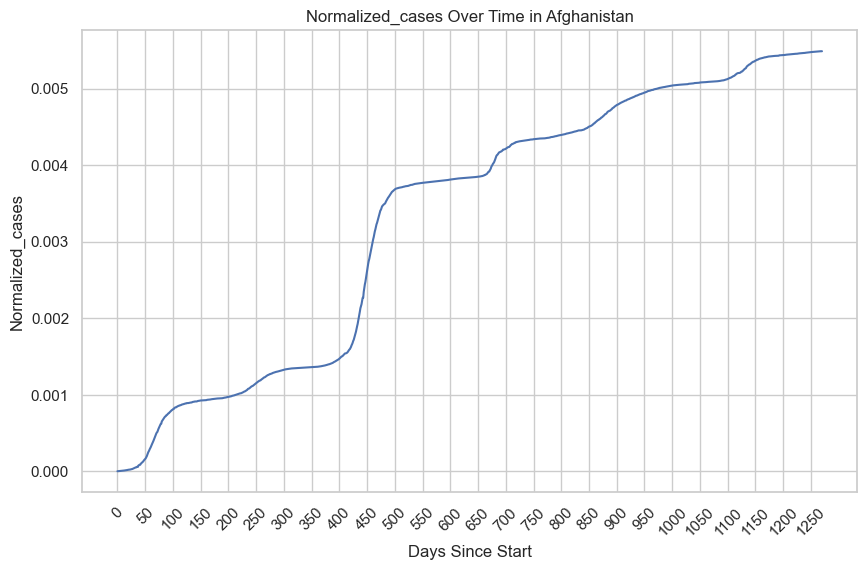

In [37]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Normalized_cases", data=covid_data_afg)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Normalized_cases")
plt.title("Normalized_cases Over Time in Afghanistan")

# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 50  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(covid_data_afg), step), covid_data_afg['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

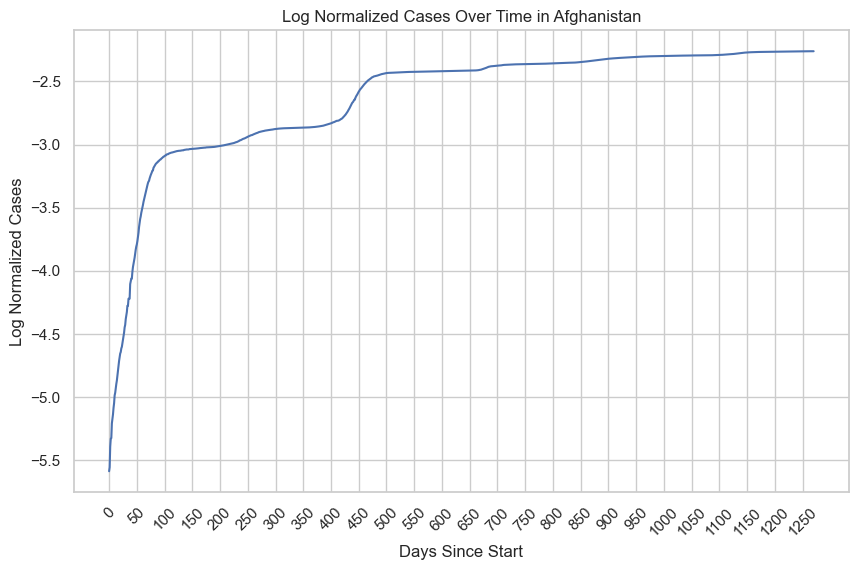

In [38]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=covid_data_afg)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases Over Time in Afghanistan")

# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 50  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(covid_data_afg), step), covid_data_afg['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

#### Filtering the data for the first wave and the second wave

In [39]:
first_wave_afg = covid_data_afg[(covid_data_afg["Days_since_start"]>=0) & (covid_data_afg["Days_since_start"]<=420)]

second_wave_afg = covid_data_afg[(covid_data_afg["Days_since_start"]>=421) & (covid_data_afg["Days_since_start"]<=len(covid_data_afg))]

second_wave_afg.reset_index(drop=True, inplace=True)

In [40]:
first_wave_afg

Date_reported Country_code      Country  Cumulative_cases  \
0      2020-03-30           AF  Afghanistan               106   
1      2020-03-31           AF  Afghanistan               114   
2      2020-04-01           AF  Afghanistan               166   
3      2020-04-02           AF  Afghanistan               192   
4      2020-04-03           AF  Afghanistan               194   
..            ...          ...          ...               ...   
416    2021-05-20           AF  Afghanistan             64575   
417    2021-05-21           AF  Afghanistan             65080   
418    2021-05-22           AF  Afghanistan             65486   
419    2021-05-23           AF  Afghanistan             65728   
420    2021-05-24           AF  Afghanistan             66275   

     Normalized_cases  Days_since_start  Log_Normalized_cases  
0            0.000003                 0             -5.588840  
1            0.000003                 1             -5.557241  
2            0.000004                 2             -5.394038  
3            0.000005                 3             -5.330845  
4            0.000005                 4             -5.326344  
..                ...               ...                   ...  
416          0.001570               416             -2.804081  
417          0.001582               417             -2.800698  
418          0.001592               418             -2.797997  
419          0.001598               419             -2.796395  
420          0.001611               420             -2.792796  

[421 rows x 7 columns]

In [41]:
second_wave_afg

Date_reported Country_code      Country  Cumulative_cases  \
0      2021-05-25           AF  Afghanistan             66903   
1      2021-05-26           AF  Afghanistan             67743   
2      2021-05-27           AF  Afghanistan             68366   
3      2021-05-28           AF  Afghanistan             69130   
4      2021-05-29           AF  Afghanistan             70111   
..            ...          ...          ...               ...   
845    2023-09-17           AF  Afghanistan            225786   
846    2023-09-18           AF  Afghanistan            225786   
847    2023-09-19           AF  Afghanistan            225786   
848    2023-09-20           AF  Afghanistan            225786   
849    2023-09-21           AF  Afghanistan            225786   

     Normalized_cases  Days_since_start  Log_Normalized_cases  
0            0.001627               421             -2.788700  
1            0.001647               422             -2.783281  
2            0.001662               423             -2.779306  
3            0.001681               424             -2.774479  
4            0.001705               425             -2.768360  
..                ...               ...                   ...  
845          0.005490              1266             -2.260449  
846          0.005490              1267             -2.260449  
847          0.005490              1268             -2.260449  
848          0.005490              1269             -2.260449  
849          0.005490              1270             -2.260449  

[850 rows x 7 columns]

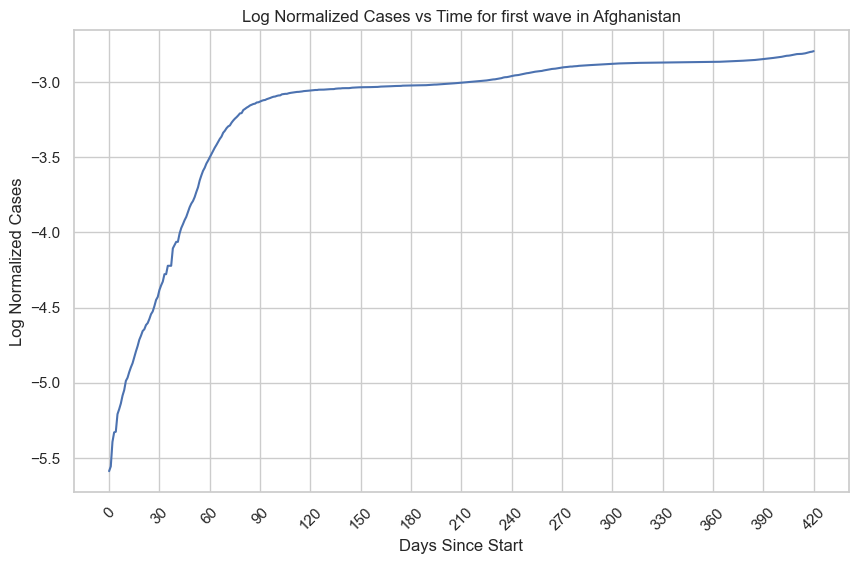

In [42]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=first_wave_afg)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases vs Time for first wave in Afghanistan")

# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 30  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(first_wave_afg), step), first_wave_afg['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

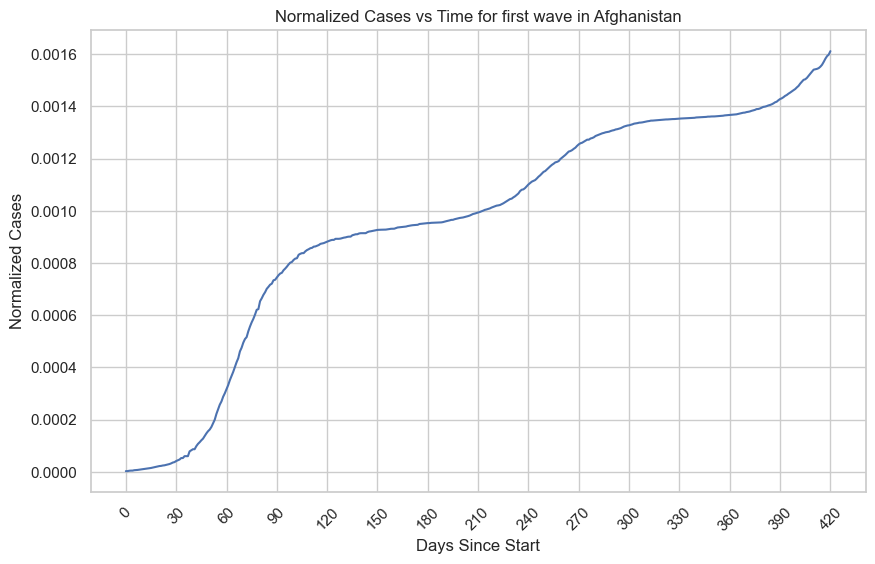

In [43]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Normalized_cases", data=first_wave_afg)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Normalized Cases")
plt.title("Normalized Cases vs Time for first wave in Afghanistan")

# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 30  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(first_wave_afg), step), first_wave_afg['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

In [44]:
from scipy.stats import linregress

In [45]:
first_wave_afg

Date_reported Country_code      Country  Cumulative_cases  \
0      2020-03-30           AF  Afghanistan               106   
1      2020-03-31           AF  Afghanistan               114   
2      2020-04-01           AF  Afghanistan               166   
3      2020-04-02           AF  Afghanistan               192   
4      2020-04-03           AF  Afghanistan               194   
..            ...          ...          ...               ...   
416    2021-05-20           AF  Afghanistan             64575   
417    2021-05-21           AF  Afghanistan             65080   
418    2021-05-22           AF  Afghanistan             65486   
419    2021-05-23           AF  Afghanistan             65728   
420    2021-05-24           AF  Afghanistan             66275   

     Normalized_cases  Days_since_start  Log_Normalized_cases  
0            0.000003                 0             -5.588840  
1            0.000003                 1             -5.557241  
2            0.000004                 2             -5.394038  
3            0.000005                 3             -5.330845  
4            0.000005                 4             -5.326344  
..                ...               ...                   ...  
416          0.001570               416             -2.804081  
417          0.001582               417             -2.800698  
418          0.001592               418             -2.797997  
419          0.001598               419             -2.796395  
420          0.001611               420             -2.792796  

[421 rows x 7 columns]

In [46]:
a0 = first_wave_afg.iloc[0,-1]
a = math.exp(a0)

r = (first_wave_afg.iloc[80, -1] - a0)/80

print("a:", a0)
print("r:", r)

a: -5.588839866955495
r: 0.03005033059454451


In [47]:
# Calculate N(t) using the exponential model
N = a * np.exp(r * first_wave_afg["Days_since_start"])

# Simulate or provide observed data
observed_data = first_wave_afg["Normalized_cases"]  # Replace with your observed data

# Calculate the error as the difference between observed and expected data
error = observed_data - N

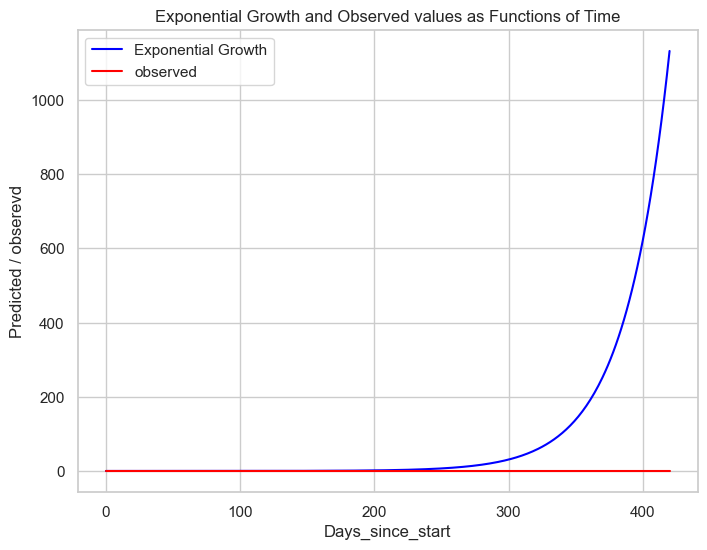

In [48]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(first_wave_afg["Days_since_start"], N, label='Exponential Growth', color='blue')
plt.plot(first_wave_afg["Days_since_start"], observed_data, label='observed', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('Predicted / obserevd')
plt.legend()
plt.grid(True)
plt.title('Exponential Growth and Observed values as Functions of Time')
plt.show()

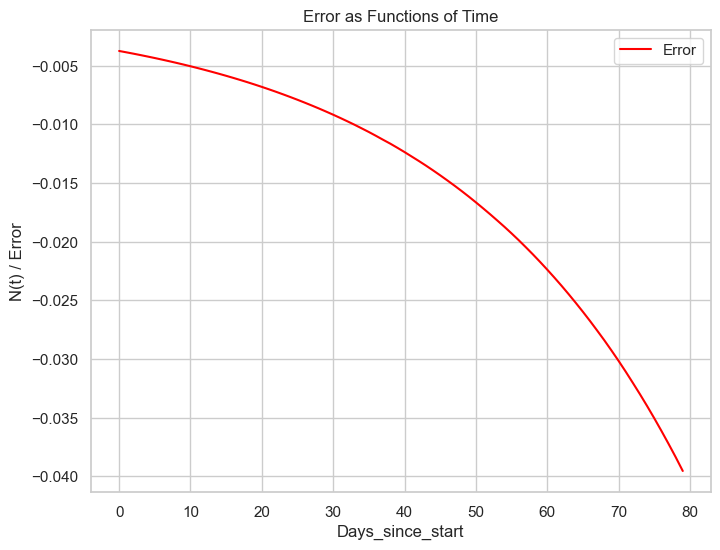

In [49]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(np.arange(80), error[0:80], label='Error', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('N(t) / Error')
plt.legend()
plt.grid(True)
plt.title('Error as Functions of Time')
plt.show()

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/2403508116.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave_afg['K(t)'] = first_wave_afg["Days_since_start"].apply(calculate_K)


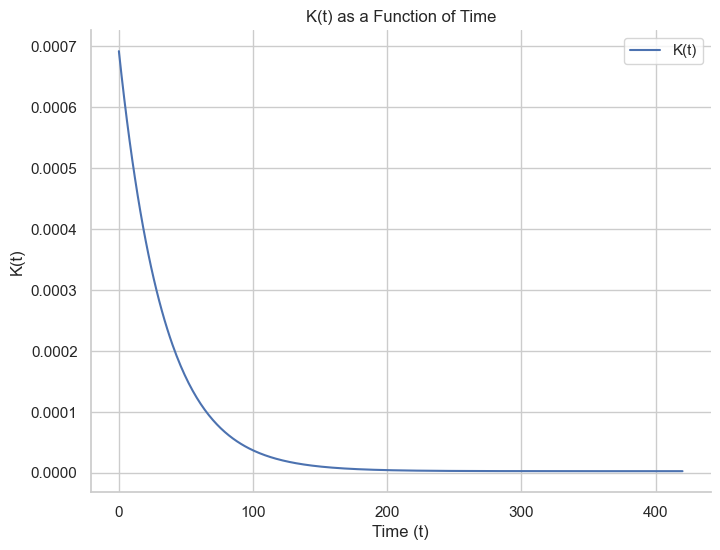

In [50]:
# Given values
a = first_wave_afg.iloc[0,-1]  # Replace with the actual value of 'a'
P_0 = first_wave_afg.iloc[0, -3] # Replace with the actual value of 'P(0)'

# Function to calculate K(t)
def calculate_K(t):
    a_rt = a + r * t
    exp_a_rt = math.exp(a_rt)
    K_t = P_0 * (1 + exp_a_rt) / exp_a_rt
    return K_t

# Apply the function to the DataFrame
first_wave_afg['K(t)'] = first_wave_afg["Days_since_start"].apply(calculate_K)

# Visualize the results with a simple line
plt.figure(figsize=(8, 6))
sns.lineplot(data=first_wave_afg, x='Days_since_start', y='K(t)', label='K(t)')
plt.xlabel('Time (t)')
plt.ylabel('K(t)')
plt.title('K(t) as a Function of Time')
plt.legend()
plt.grid(True)
sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()



##We will use it to estimate parameters of model: ln⁡〖P ̂(t)〗=a+rt. 
To find the values of 'a' and 'r' from the equation ln⁡〖P ̂(t)〗=a+rt using the code you provided, you need to perform linear regression within the exponential growth phase. The equation can be transformed into a linear form as:

ln⁡(P) = a + rt

Here, 'a' represents the natural logarithm of the initial case count, and 'r' is the slope of the linear regression line. 
The code calculates these values and prints them to the console. This allows you to estimate the initial case count and the growth rate based on the linear regression analysis of the COVID-19 data.

As we can see from Figure, exponential model with parameters a=4.875878143921355e-06 and r=0.0683 work only for the first 80 days.

##Cumulative fraction of infected population prediction

error of prediction of Afghanistan of wave 1

Let us try to estimate Carrying capacity from calculated parameters. As we can see, K has big values at the beginning of wave and become less constant at the end of interval. Let us take value k=0.0002 as initial estimation. Let us now estimate parameters of logistic grows for logistic model
In this code, the carrying_capacity function calculates the estimated carrying capacity (K) at each time point based on the values of a and r. The plot shows the estimated carrying capacity as a function of time.

The function K(t) = P(t) (1 + exp(a + rt)) / exp(a + rt) represents the carrying capacity (K) as a function of time (t), based on the estimated initial case count (a) and the growth rate (r). Observing the behavior of this function in the context of the provided data and parameters, it exhibits sigmoid-like behavior, transitioning from rapid growth to a more stable state. Initially, K(t) closely resembles the actual population size P(t), but as time progresses, it deviates due to the (1 + exp(a + rt)) / exp(a + rt) factor.

The function's steep initial increase indicates exponential growth, but it gradually slows as the population approaches its carrying capacity. While K(t) is not a constant, it reflects the population's capacity to expand. Over time, it approaches a stable value, representing the estimated carrying capacity 'K.' This behavior mirrors logistic growth models, which describe populations' growth and eventual stabilization as they encounter limiting factors. K(t) offers insights into the COVID-19 cases' saturation and the population's potential to contain the virus.

In [51]:
first_wave_afg

Date_reported Country_code      Country  Cumulative_cases  \
0      2020-03-30           AF  Afghanistan               106   
1      2020-03-31           AF  Afghanistan               114   
2      2020-04-01           AF  Afghanistan               166   
3      2020-04-02           AF  Afghanistan               192   
4      2020-04-03           AF  Afghanistan               194   
..            ...          ...          ...               ...   
416    2021-05-20           AF  Afghanistan             64575   
417    2021-05-21           AF  Afghanistan             65080   
418    2021-05-22           AF  Afghanistan             65486   
419    2021-05-23           AF  Afghanistan             65728   
420    2021-05-24           AF  Afghanistan             66275   

     Normalized_cases  Days_since_start  Log_Normalized_cases      K(t)  
0            0.000003                 0             -5.588840  0.000692  
1            0.000003                 1             -5.557241  0.000671  
2            0.000004                 2             -5.394038  0.000652  
3            0.000005                 3             -5.330845  0.000632  
4            0.000005                 4             -5.326344  0.000614  
..                ...               ...                   ...       ...  
416          0.001570               416             -2.804081  0.000003  
417          0.001582               417             -2.800698  0.000003  
418          0.001592               418             -2.797997  0.000003  
419          0.001598               419             -2.796395  0.000003  
420          0.001611               420             -2.792796  0.000003  

[421 rows x 8 columns]

In [52]:
# Function to calculate y-values based on your formula
def calculate_y_values(P, K_values):
    y_values = np.log(np.abs(P / K_values - P))
    return y_values

y = []
for i in range(len(first_wave_afg)):
    y.append(calculate_y_values(first_wave_afg.loc[i, "Normalized_cases"], first_wave_afg.loc[i, "K(t)"]))

first_wave_afg['y'] = y


/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/1165172157.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave_afg['y'] = y


In [53]:
from scipy.optimize import curve_fit

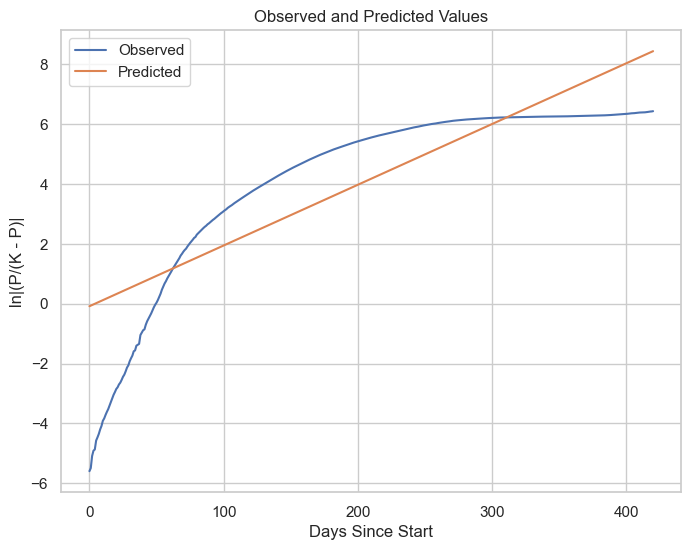

Fitted slope (m): 0.02029390471937298
Fitted intercept (b): -0.08101239563304552


In [54]:
# Function to model your regression line
def linear_regression(x, m, b):
    return m * x + b

# Fit the regression line
params, covariance = curve_fit(linear_regression, first_wave_afg['Days_since_start'], first_wave_afg['y'])

# Extract the parameters (m and b) from the fitted parameters
m, b = params

# Calculate the predicted y values based on the fitted regression line
predicted_y_values = linear_regression(first_wave_afg['Days_since_start'], m, b)

# Plot the observed and predicted values without markers
plt.figure(figsize=(8, 6))
plt.plot(first_wave_afg['Days_since_start'], first_wave_afg['y'], label='Observed')
plt.plot(first_wave_afg['Days_since_start'], predicted_y_values, label='Predicted')
plt.xlabel('Days Since Start')
plt.ylabel('ln|(P/(K - P)|')
plt.legend()
plt.grid(True)
plt.title('Observed and Predicted Values')
plt.show()

# Print the parameters of the fitted regression line
print("Fitted slope (m):", m)
print("Fitted intercept (b):", b)

In [55]:
mse = np.mean((first_wave_afg['y'] - predicted_y_values) ** 2)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.396055206987516


### For Second wave of Afghanistan

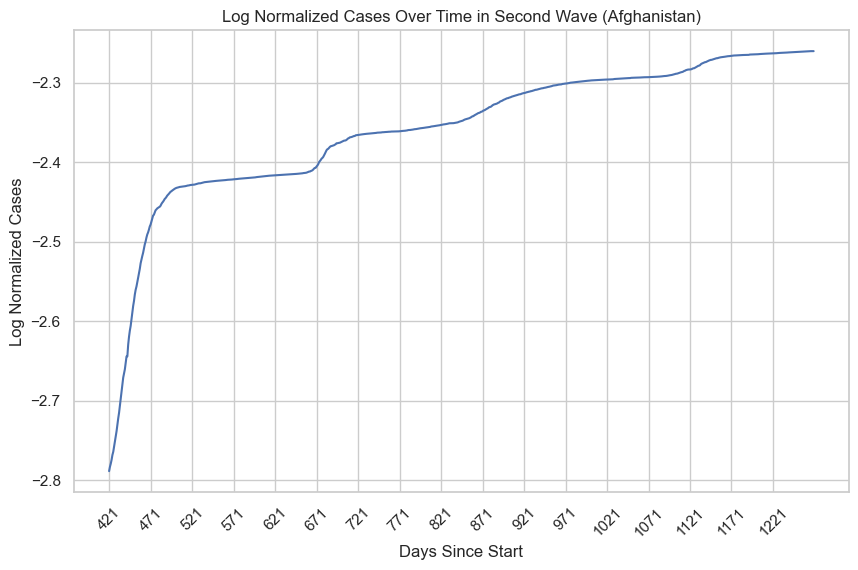

In [56]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Filter the x-axis range based on the available data points
x_max = second_wave_afg['Days_since_start'].max()
x_min = second_wave_afg['Days_since_start'].min()

sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=second_wave_afg)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases Over Time in Second Wave (Afghanistan)")

# Customize the x-axis ticks within the available range
step = 50  # You can adjust this value to control the interval between ticks
plt.xticks(range(int(x_min), int(x_max) + 1, step), rotation=45)

# Show the plot
plt.show()

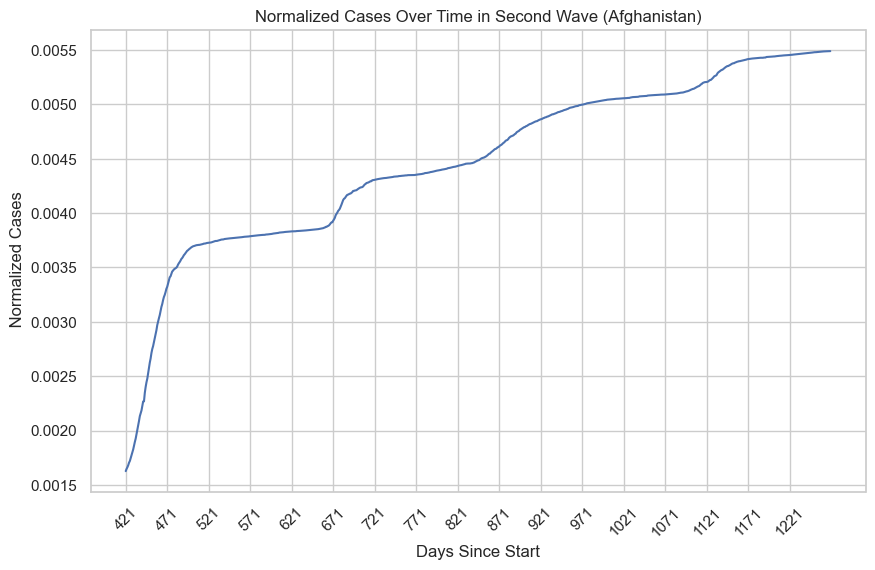

In [57]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Filter the x-axis range based on the available data points
x_max = second_wave_afg['Days_since_start'].max()
x_min = second_wave_afg['Days_since_start'].min()

sns.lineplot(x="Days_since_start", y="Normalized_cases", data=second_wave_afg)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel(" Normalized Cases")
plt.title("Normalized Cases Over Time in Second Wave (Afghanistan)")

# Customize the x-axis ticks within the available range
step = 50  # You can adjust this value to control the interval between ticks
plt.xticks(range(int(x_min), int(x_max) + 1, step), rotation=45)

# Show the plot
plt.show()

In [58]:
second_wave_afg[second_wave_afg["Days_since_start"]==471]

Date_reported Country_code      Country  Cumulative_cases  \
50    2021-07-14           AF  Afghanistan            136643   

    Normalized_cases  Days_since_start  Log_Normalized_cases  
50          0.003322               471             -2.478558

In [59]:
a0 = second_wave_afg.iloc[0,-1]
a = math.exp(a0)

r = (second_wave_afg.iloc[50, -1] - a0)/471

print("a2:", a)
print("r:", r)

a2: 0.06150110481864474
r: 0.0006584751506883871


In [60]:
# Calculate N(t) using the exponential model
N = a * np.exp(r * second_wave_afg["Days_since_start"])

# Simulate or provide observed data
observed_data = second_wave_afg["Normalized_cases"]  # Replace with your observed data

# Calculate the error as the difference between observed and expected data
error = observed_data - N

error

0     -0.079521
1     -0.079554
2     -0.079593
3     -0.079628
4     -0.079657
         ...   
845   -0.136065
846   -0.136158
847   -0.136251
848   -0.136345
849   -0.136438
Length: 850, dtype: float64

In [61]:
second_wave_afg[second_wave_afg["Days_since_start"]==471]

Date_reported Country_code      Country  Cumulative_cases  \
50    2021-07-14           AF  Afghanistan            136643   

    Normalized_cases  Days_since_start  Log_Normalized_cases  
50          0.003322               471             -2.478558

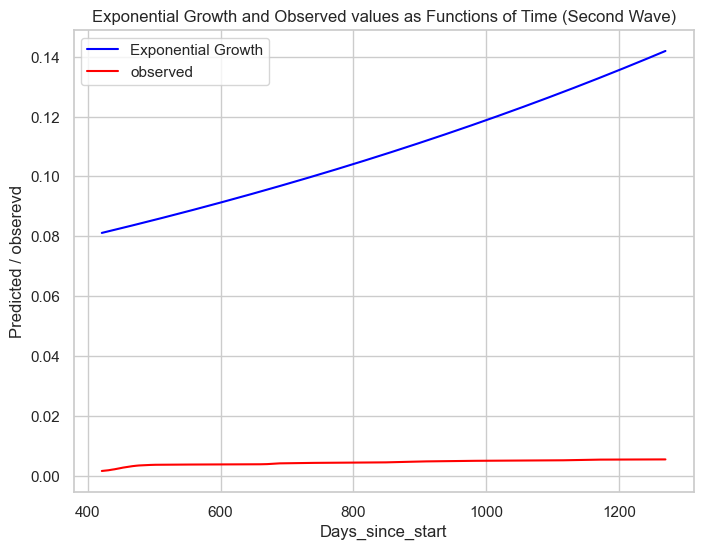

In [62]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(second_wave_afg["Days_since_start"], N, label='Exponential Growth', color='blue')
plt.plot(second_wave_afg["Days_since_start"], observed_data, label='observed', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('Predicted / obserevd')
plt.legend()
plt.grid(True)
plt.title('Exponential Growth and Observed values as Functions of Time (Second Wave)')
plt.show()

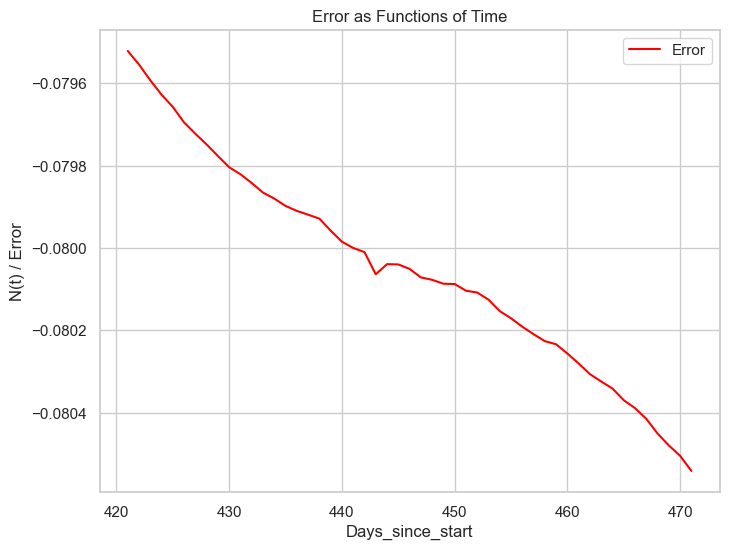

In [63]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(np.arange(421,472), error[:51], label='Error', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('N(t) / Error')
plt.legend()
plt.grid(True)
plt.title('Error as Functions of Time')
plt.show()

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/3444350762.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_wave_afg['K(t)'] = second_wave_afg["Days_since_start"].apply(calculate_K)


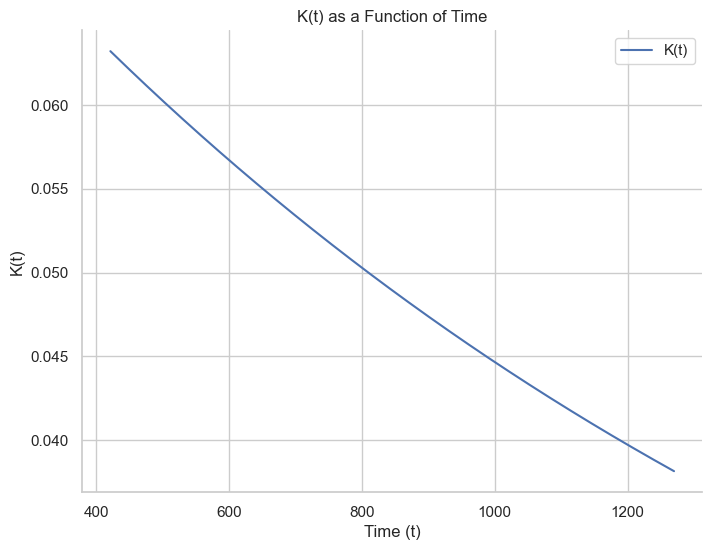

In [64]:
# Given values
a = second_wave_afg.iloc[0,-1]  # Replace with the actual value of 'a'
P_0 = second_wave_afg.iloc[471, -3] # Replace with the actual value of 'P(0)'

# Function to calculate K(t)
def calculate_K(t):
    a_rt = a + r * t
    exp_a_rt = math.exp(a_rt)
    K_t = P_0 * (1 + exp_a_rt) / exp_a_rt
    return K_t

# Apply the function to the DataFrame
second_wave_afg['K(t)'] = second_wave_afg["Days_since_start"].apply(calculate_K)

# Visualize the results with a simple line
plt.figure(figsize=(8, 6))
sns.lineplot(data=second_wave_afg, x='Days_since_start', y='K(t)', label='K(t)')
plt.xlabel('Time (t)')
plt.ylabel('K(t)')
plt.title('K(t) as a Function of Time')
plt.legend()
plt.grid(True)
sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()


In [65]:
# Function to calculate y-values based on your formula
def calculate_y_values(P, K_values):
    y_values = np.log(np.abs(P / K_values - P))
    return y_values

y = []
for i in range(len(second_wave_afg)):
    y.append(calculate_y_values(second_wave_afg.loc[i, "Normalized_cases"], second_wave_afg.loc[i, "K(t)"]))

second_wave_afg['y'] = y

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/1801847575.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_wave_afg['y'] = y


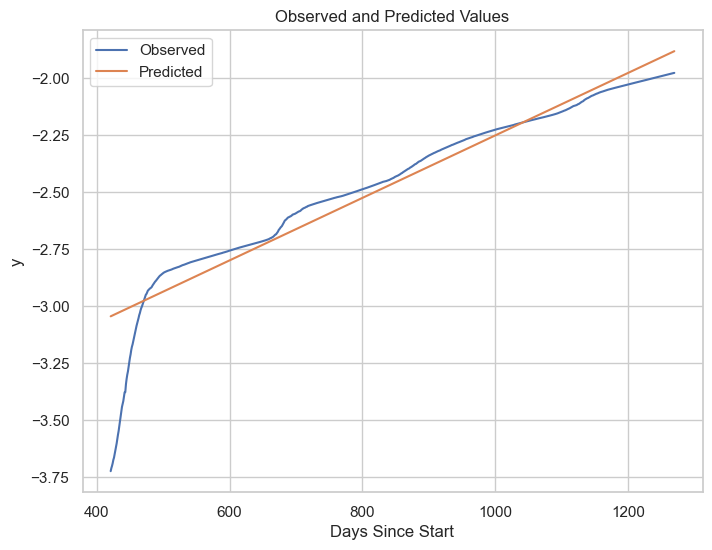

Fitted slope (m): 0.001369935230233042
Fitted intercept (b): -3.622495620890979


In [66]:
# Function to model your regression line
def linear_regression(x, m, b):
    return m * x + b

# Fit the regression line
params, covariance = curve_fit(linear_regression, second_wave_afg['Days_since_start'], second_wave_afg['y'])

# Extract the parameters (m and b) from the fitted parameters
m, b = params

# Calculate the predicted y values based on the fitted regression line
predicted_y_values = linear_regression(second_wave_afg['Days_since_start'], m, b)

# Plot the observed and predicted values without markers
plt.figure(figsize=(8, 6))
plt.plot(second_wave_afg['Days_since_start'], second_wave_afg['y'], label='Observed')
plt.plot(second_wave_afg['Days_since_start'], predicted_y_values, label='Predicted')
plt.xlabel('Days Since Start')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Observed and Predicted Values')
plt.show()

# Print the parameters of the fitted regression line
print("Fitted slope (m):", m)
print("Fitted intercept (b):", b)

In [67]:
mse = np.mean((second_wave_afg['y'] - predicted_y_values) ** 2)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.010950647222662032


In [68]:
first_wave_data = pd.concat([first_wave_afg, second_wave_afg])
first_wave_data

Date_reported Country_code      Country  Cumulative_cases  \
0      2020-03-30           AF  Afghanistan               106   
1      2020-03-31           AF  Afghanistan               114   
2      2020-04-01           AF  Afghanistan               166   
3      2020-04-02           AF  Afghanistan               192   
4      2020-04-03           AF  Afghanistan               194   
..            ...          ...          ...               ...   
845    2023-09-17           AF  Afghanistan            225786   
846    2023-09-18           AF  Afghanistan            225786   
847    2023-09-19           AF  Afghanistan            225786   
848    2023-09-20           AF  Afghanistan            225786   
849    2023-09-21           AF  Afghanistan            225786   

     Normalized_cases  Days_since_start  Log_Normalized_cases      K(t)  \
0            0.000003                 0             -5.588840  0.000692   
1            0.000003                 1             -5.557241  0.000671   
2            0.000004                 2             -5.394038  0.000652   
3            0.000005                 3             -5.330845  0.000632   
4            0.000005                 4             -5.326344  0.000614   
..                ...               ...                   ...       ...   
845          0.005490              1266             -2.260449  0.038252   
846          0.005490              1267             -2.260449  0.038230   
847          0.005490              1268             -2.260449  0.038208   
848          0.005490              1269             -2.260449  0.038186   
849          0.005490              1270             -2.260449  0.038164   

            y  
0   -5.593264  
1   -5.490548  
2   -5.084805  
3   -4.909349  
4   -4.869042  
..        ...  
845 -1.980322  
846 -1.979723  
847 -1.979123  
848 -1.978523  
849 -1.977924  

[1271 rows x 9 columns]

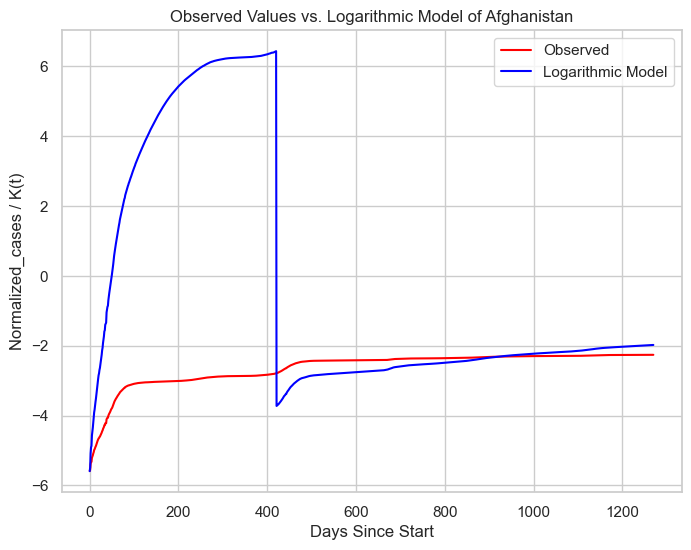

In [69]:
# Assuming you have a DataFrame named 'data' with the relevant columns

observed_values = first_wave_data['Log_Normalized_cases']
logarithmic_model_values = first_wave_data['y']
days_since_start = first_wave_data['Days_since_start']

plt.figure(figsize=(8, 6))
plt.plot(days_since_start, observed_values, label='Observed', color='red')
plt.plot(days_since_start, logarithmic_model_values, label='Logarithmic Model', color='blue')

plt.xlabel('Days Since Start')
plt.ylabel('Normalized_cases / K(t)')
plt.legend()
plt.grid(True)
plt.title('Observed Values vs. Logarithmic Model of Afghanistan')
plt.show()

In [70]:
covid_data_cn

Date_reported Country_code Country  Cumulative_cases  Normalized_cases
0       2020-01-19           CN   China               125          0.000003
1       2020-01-20           CN   China               202          0.000005
2       2020-01-21           CN   China               295          0.000007
3       2020-01-22           CN   China               442          0.000011
4       2020-01-23           CN   China               574          0.000014
...            ...          ...     ...               ...               ...
1337    2023-09-17           CN   China          99309232          2.414593
1338    2023-09-18           CN   China          99309232          2.414593
1339    2023-09-19           CN   China          99309232          2.414593
1340    2023-09-20           CN   China          99309232          2.414593
1341    2023-09-21           CN   China          99309232          2.414593

[1342 rows x 5 columns]

In [71]:
# Calculate the number of days for each data point
covid_data_cn['Days_since_start'] = (covid_data_cn['Date_reported'] - covid_data_cn['Date_reported'].min()).dt.days

covid_data_cn['Log_Normalized_cases'] = np.log10(covid_data_cn['Normalized_cases'])

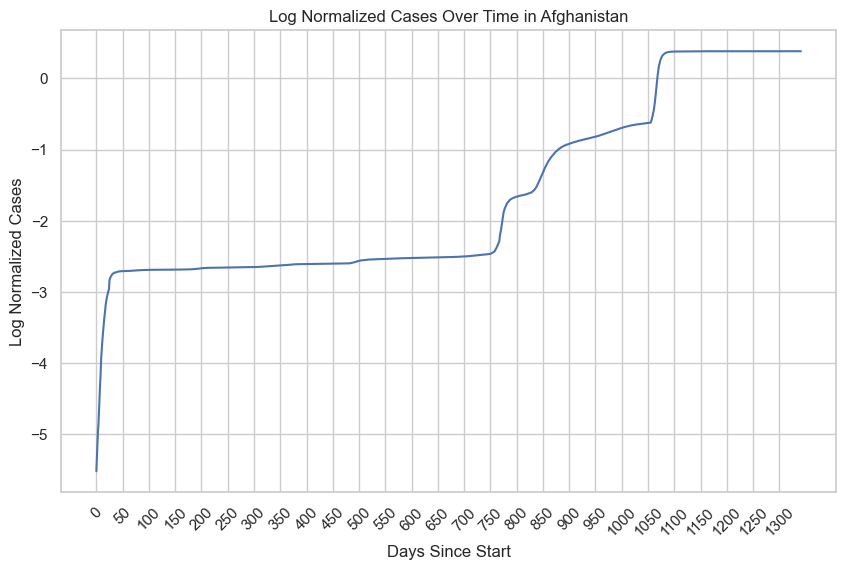

In [72]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=covid_data_cn)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases Over Time in Afghanistan")

# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 50  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(covid_data_cn), step), covid_data_cn['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

In [73]:
first_wave_cn = covid_data_cn[(covid_data_cn["Days_since_start"]>=0) & (covid_data_cn["Days_since_start"]<=750)]

second_wave_cn = covid_data_cn[(covid_data_cn["Days_since_start"]>=751) & (covid_data_cn["Days_since_start"]<=len(covid_data_cn))]

second_wave_cn.reset_index(drop=True, inplace=True)

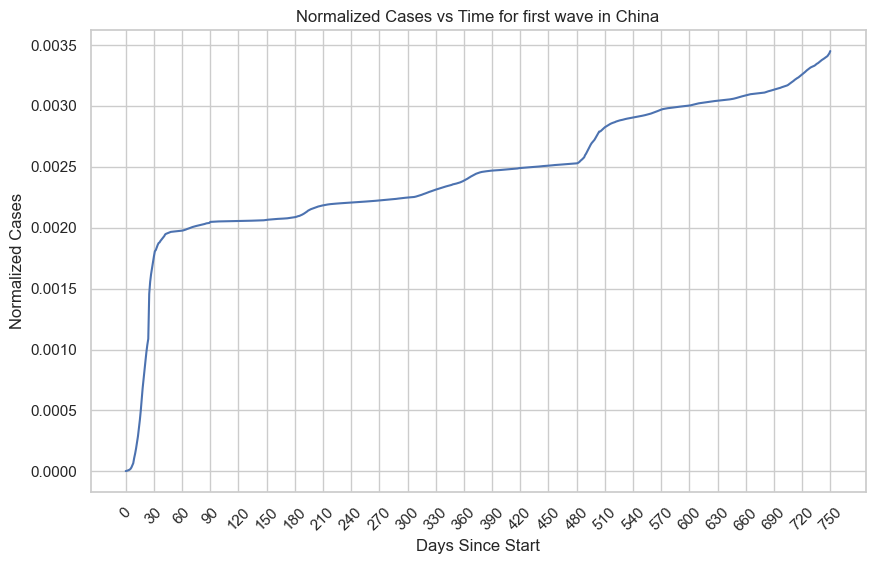

In [74]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Normalized_cases", data=first_wave_cn)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Normalized Cases")
plt.title("Normalized Cases vs Time for first wave in China")
# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 30  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(first_wave_cn), step), first_wave_cn['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

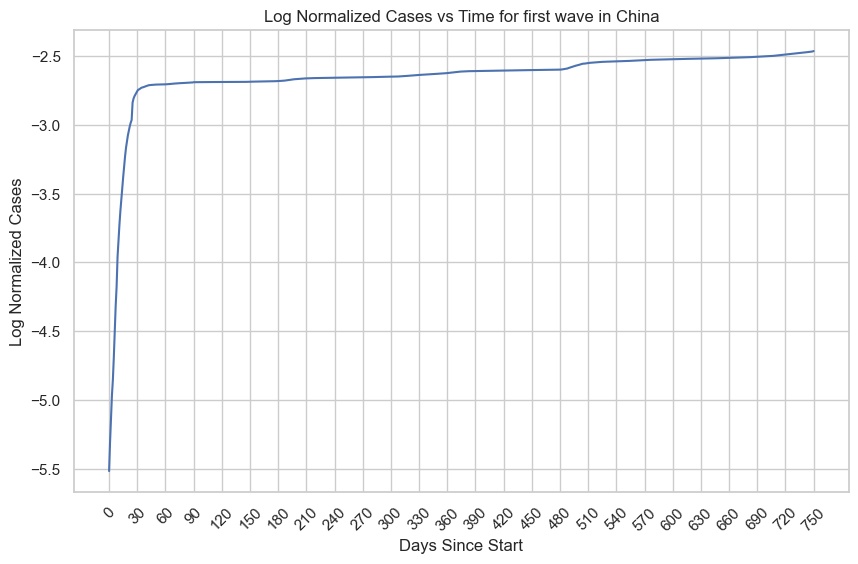

In [75]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=first_wave_cn)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases vs Time for first wave in China")
# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 30  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(first_wave_cn), step), first_wave_cn['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

In [76]:
first_wave_cn

Date_reported Country_code Country  Cumulative_cases  Normalized_cases  \
0      2020-01-19           CN   China               125          0.000003   
1      2020-01-20           CN   China               202          0.000005   
2      2020-01-21           CN   China               295          0.000007   
3      2020-01-22           CN   China               442          0.000011   
4      2020-01-23           CN   China               574          0.000014   
..            ...          ...     ...               ...               ...   
746    2022-02-03           CN   China            139891          0.003401   
747    2022-02-04           CN   China            140120          0.003407   
748    2022-02-05           CN   China            140586          0.003418   
749    2022-02-06           CN   China            141049          0.003429   
750    2022-02-07           CN   China            141816          0.003448   

     Days_since_start  Log_Normalized_cases  
0                   0             -5.517236  
1                   1             -5.308794  
2                   2             -5.144324  
3                   3             -4.968723  
4                   4             -4.855234  
..                ...                   ...  
746               746             -2.468356  
747               747             -2.467646  
748               748             -2.466204  
749               749             -2.464776  
750               750             -2.462421  

[751 rows x 7 columns]

In [77]:
a0 = first_wave_cn.iloc[0,-1]
a = math.exp(a0)

r = (first_wave_cn.iloc[30, -1] - a0)/30

print("a:", a)
print("r:", r)

a: 0.004016936549546928
r: 0.09211985629021854


In [78]:
# Calculate N(t) using the exponential model
N = a * np.exp(r * first_wave_cn["Days_since_start"])

# Simulate or provide observed data
observed_data = first_wave_cn["Normalized_cases"]  # Replace with your observed data

# Calculate the error as the difference between observed and expected data
error = observed_data - N

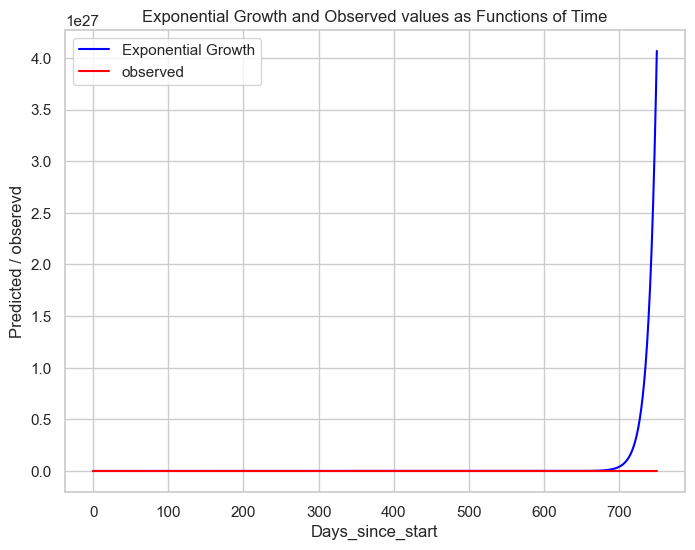

In [79]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(first_wave_cn["Days_since_start"], N, label='Exponential Growth', color='blue')
plt.plot(first_wave_cn["Days_since_start"], observed_data, label='observed', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('Predicted / obserevd')
plt.legend()
plt.grid(True)
plt.title('Exponential Growth and Observed values as Functions of Time')
plt.show()

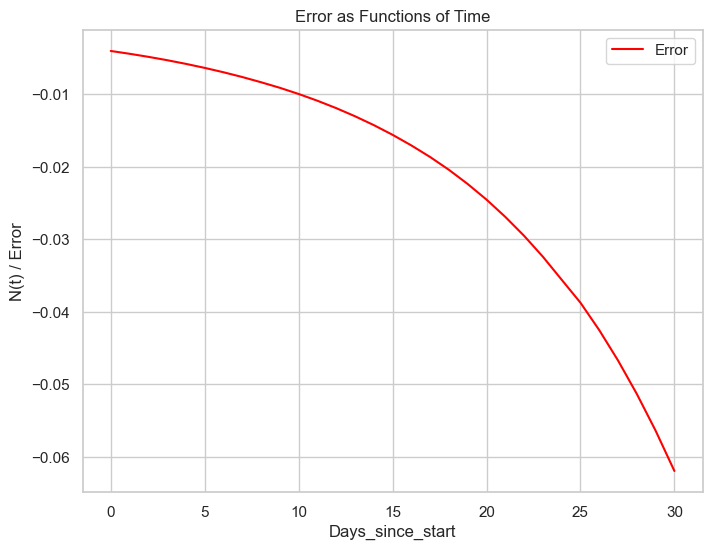

In [80]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(np.arange(31), error[:31], label='Error', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('N(t) / Error')
plt.legend()
plt.grid(True)
plt.title('Error as Functions of Time')
plt.show()

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/3084578212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave_cn['K(t)'] = first_wave_cn["Days_since_start"].apply(calculate_K)


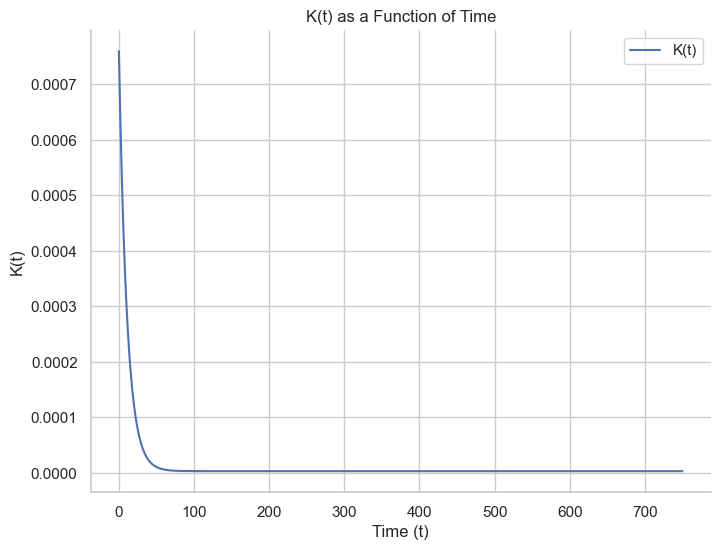

In [81]:
# Given values
a = first_wave_cn.iloc[0,-1]  # Replace with the actual value of 'a'
P_0 = first_wave_cn.iloc[0, -3] # Replace with the actual value of 'P(0)'

# Function to calculate K(t)
def calculate_K(t):
    a_rt = a + r * t
    exp_a_rt = math.exp(a_rt)
    K_t = P_0 * (1 + exp_a_rt) / exp_a_rt
    return K_t

# Apply the function to the DataFrame
first_wave_cn['K(t)'] = first_wave_cn["Days_since_start"].apply(calculate_K)

# Visualize the results with a simple line
plt.figure(figsize=(8, 6))
sns.lineplot(data=first_wave_cn, x='Days_since_start', y='K(t)', label='K(t)')
plt.xlabel('Time (t)')
plt.ylabel('K(t)')
plt.title('K(t) as a Function of Time')
plt.legend()
plt.grid(True)
sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()


In [82]:
# Function to calculate y-values based on your formula
def calculate_y_values(P, K_values):
    y_values = np.log(np.abs(P / K_values - P))
    return y_values

y = []
for i in range(len(first_wave_cn)):
    y.append(calculate_y_values(first_wave_cn.loc[i, "Normalized_cases"], first_wave_cn.loc[i, "K(t)"]))

first_wave_cn['y'] = y

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/2892503391.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave_cn['y'] = y


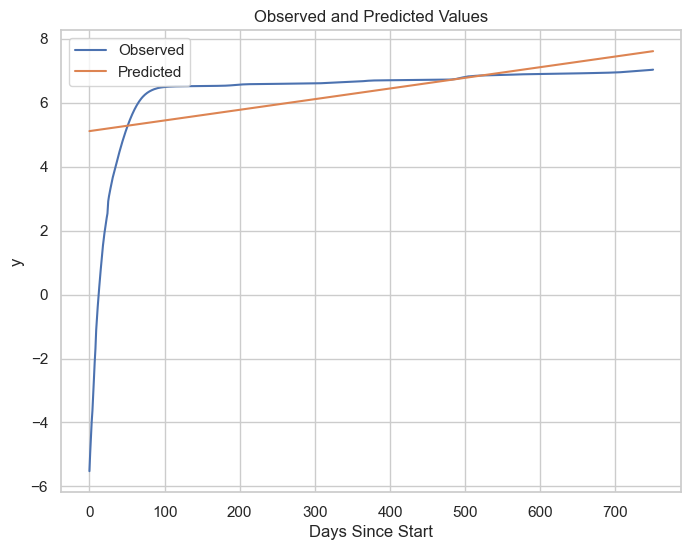

Fitted slope (m): 0.003332612112335709
Fitted intercept (b): 5.111341737507027


In [83]:
# Function to model your regression line
def linear_regression(x, m, b):
    return m * x + b

# Fit the regression line
params, covariance = curve_fit(linear_regression, first_wave_cn['Days_since_start'], first_wave_cn['y'])

# Extract the parameters (m and b) from the fitted parameters
m, b = params

# Calculate the predicted y values based on the fitted regression line
predicted_y_values = linear_regression(first_wave_cn['Days_since_start'], m, b)

# Plot the observed and predicted values without markers
plt.figure(figsize=(8, 6))
plt.plot(first_wave_cn['Days_since_start'], first_wave_cn['y'], label='Observed')
plt.plot(first_wave_cn['Days_since_start'], predicted_y_values, label='Predicted')
plt.xlabel('Days Since Start')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Observed and Predicted Values')
plt.show()

# Print the parameters of the fitted regression line
print("Fitted slope (m):", m)
print("Fitted intercept (b):", b)

In [84]:
mse = np.mean((first_wave_cn['y'] - predicted_y_values) ** 2)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.648190838964894


In [85]:
second_wave_cn[second_wave_cn["Days_since_start"]==1051]

Date_reported Country_code Country  Cumulative_cases  Normalized_cases  \
300    2022-12-05           CN   China           9773625          0.237635   

     Days_since_start  Log_Normalized_cases  
300              1051              -0.62409

In [86]:
second_wave_cn[second_wave_cn["Days_since_start"]==751]

Date_reported Country_code Country  Cumulative_cases  Normalized_cases  \
0    2022-02-08           CN   China            142599          0.003467   

   Days_since_start  Log_Normalized_cases  
0               751             -2.460029

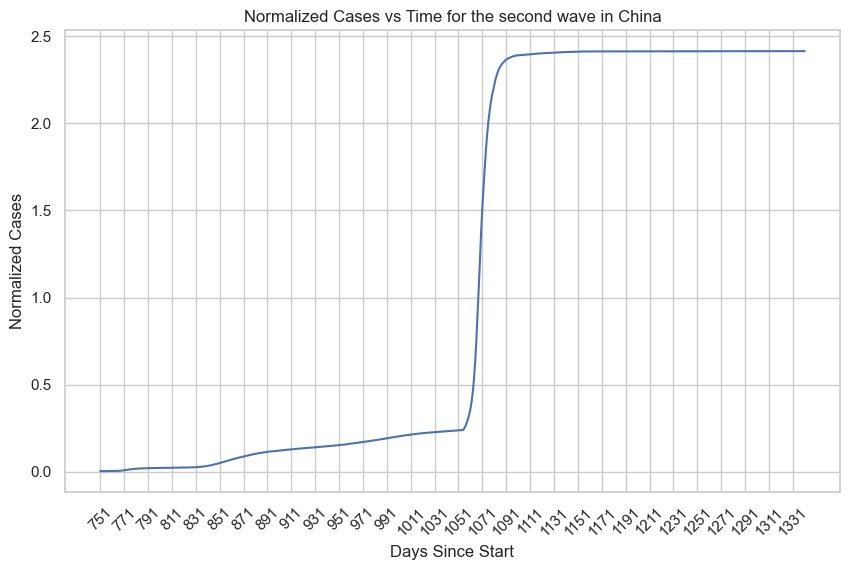

In [87]:
# Set the style for the Seaborn plot
sns.set(style="whitegrid")

# Select a subset of the data for the x-axis
subset_data = second_wave_cn.iloc[::20]  # Adjust the step as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Normalized_cases", data=second_wave_cn)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Normalized Cases")
plt.title("Normalized Cases vs Time for the second wave in China")

# Customize the x-axis ticks using the selected subset
plt.xticks(subset_data['Days_since_start'], rotation=45)

# Show the plot
plt.show()

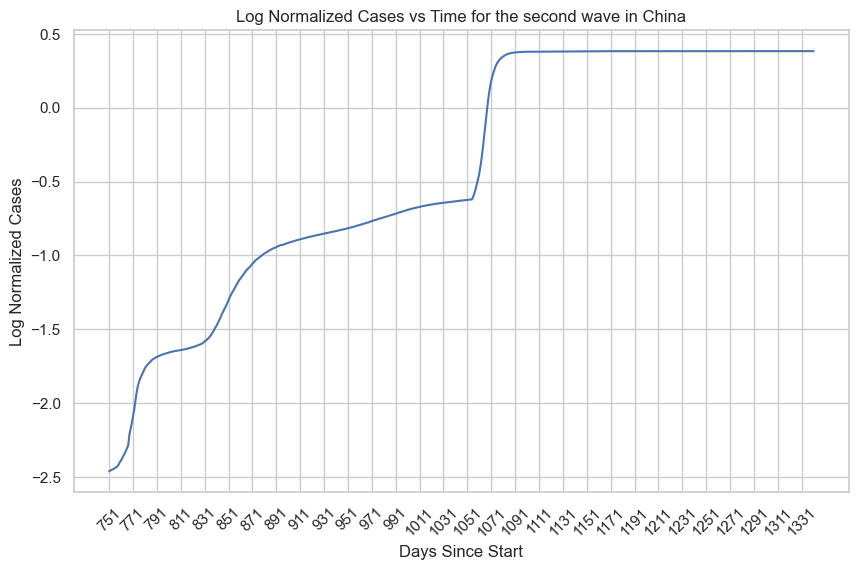

In [88]:
# Set the style for the Seaborn plot
sns.set(style="whitegrid")

# Select a subset of the data for the x-axis
subset_data = second_wave_cn.iloc[::20]  # Adjust the step as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=second_wave_cn)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases vs Time for the second wave in China")

# Customize the x-axis ticks using the selected subset
plt.xticks(subset_data['Days_since_start'], rotation=45)

# Show the plot
plt.show()

In [89]:
a0 = second_wave_cn.iloc[0,-1]
a = math.exp(a0)

r = (second_wave_cn.iloc[300, -1] - a0)/1051

print("a:", a)
print("r:", r)

a: 0.08543245183860773
r: 0.0017468498494694921


In [90]:
# Calculate N(t) using the exponential model
N = a * np.exp(r * second_wave_cn["Days_since_start"])

# Simulate or provide observed data
observed_data = second_wave_cn["Normalized_cases"]  # Replace with your observed data

# Calculate the error as the difference between observed and expected data
error = observed_data - N

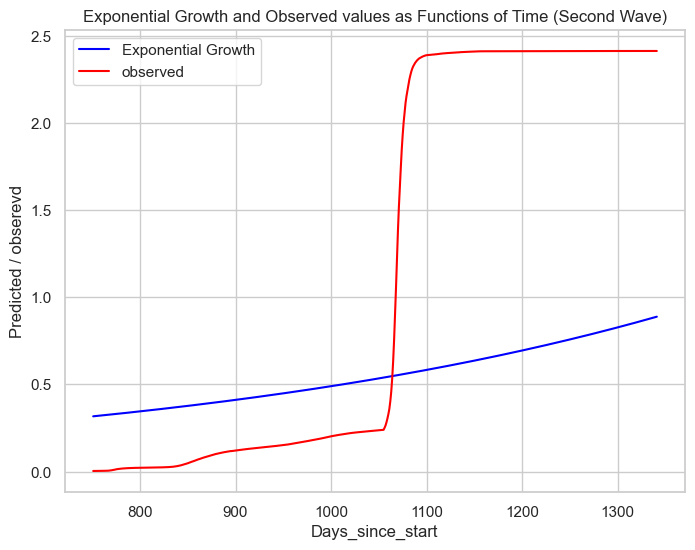

In [91]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(second_wave_cn["Days_since_start"], N, label='Exponential Growth', color='blue')
plt.plot(second_wave_cn["Days_since_start"], observed_data, label='observed', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('Predicted / obserevd')
plt.legend()
plt.grid(True)
plt.title('Exponential Growth and Observed values as Functions of Time (Second Wave)')
plt.show()

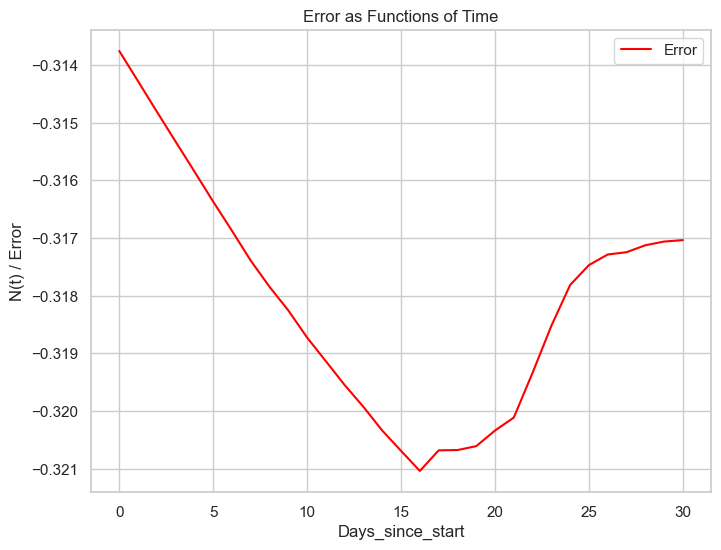

In [92]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(np.arange(31), error[:31], label='Error', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('N(t) / Error')
plt.legend()
plt.grid(True)
plt.title('Error as Functions of Time')
plt.show()

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/540534497.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_wave_cn['K(t)'] = second_wave_cn["Days_since_start"].apply(calculate_K)


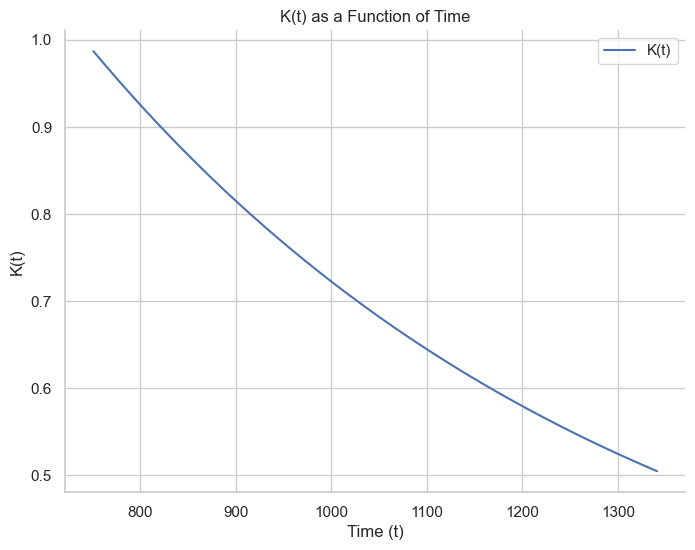

In [93]:
# Given values
a = second_wave_cn.iloc[0,-1]  # Replace with the actual value of 'a'
P_0 = second_wave_cn.iloc[300, -3] # Replace with the actual value of 'P(0)'

# Function to calculate K(t)
def calculate_K(t):
    a_rt = a + r * t
    exp_a_rt = math.exp(a_rt)
    K_t = P_0 * (1 + exp_a_rt) / exp_a_rt
    return K_t

# Apply the function to the DataFrame
second_wave_cn['K(t)'] = second_wave_cn["Days_since_start"].apply(calculate_K)

# Visualize the results with a simple line
plt.figure(figsize=(8, 6))
sns.lineplot(data=second_wave_cn, x='Days_since_start', y='K(t)', label='K(t)')
plt.xlabel('Time (t)')
plt.ylabel('K(t)')
plt.title('K(t) as a Function of Time')
plt.legend()
plt.grid(True)
sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()


/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/1297408194.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_wave_cn['y'] = y


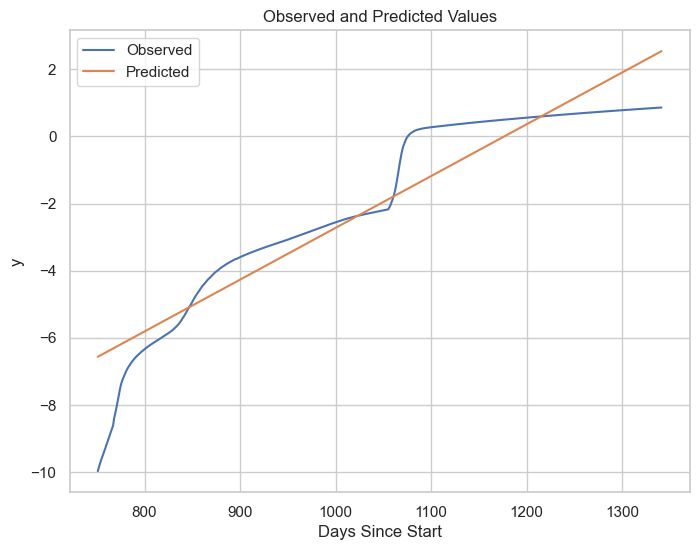

Fitted slope (m): 0.015434693216035236
Fitted intercept (b): -18.15726267146629


In [94]:
# Function to calculate y-values based on your formula
def calculate_y_values(P, K_values):
    y_values = np.log(np.abs(P / K_values - P))
    return y_values

y = []
for i in range(len(second_wave_cn)):
    y.append(calculate_y_values(second_wave_cn.loc[i, "Normalized_cases"], second_wave_cn.loc[i, "K(t)"]))

second_wave_cn['y'] = y

# Function to model your regression line
def linear_regression(x, m, b):
    return m * x + b

# Fit the regression line
params, covariance = curve_fit(linear_regression, second_wave_cn['Days_since_start'], second_wave_cn['y'])

# Extract the parameters (m and b) from the fitted parameters
m, b = params

# Calculate the predicted y values based on the fitted regression line
predicted_y_values = linear_regression(second_wave_cn['Days_since_start'], m, b)

# Plot the observed and predicted values without markers
plt.figure(figsize=(8, 6))
plt.plot(second_wave_cn['Days_since_start'], second_wave_cn['y'], label='Observed')
plt.plot(second_wave_cn['Days_since_start'], predicted_y_values, label='Predicted')
plt.xlabel('Days Since Start')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Observed and Predicted Values')
plt.show()

# Print the parameters of the fitted regression line
print("Fitted slope (m):", m)
print("Fitted intercept (b):", b)

In [95]:
mse = np.mean((second_wave_cn['y'] - predicted_y_values) ** 2)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.8457525022754901


In [96]:
first_wave_data_cn = pd.concat([first_wave_cn, second_wave_cn])
first_wave_data_cn

Date_reported Country_code Country  Cumulative_cases  Normalized_cases  \
0      2020-01-19           CN   China               125          0.000003   
1      2020-01-20           CN   China               202          0.000005   
2      2020-01-21           CN   China               295          0.000007   
3      2020-01-22           CN   China               442          0.000011   
4      2020-01-23           CN   China               574          0.000014   
..            ...          ...     ...               ...               ...   
586    2023-09-17           CN   China          99309232          2.414593   
587    2023-09-18           CN   China          99309232          2.414593   
588    2023-09-19           CN   China          99309232          2.414593   
589    2023-09-20           CN   China          99309232          2.414593   
590    2023-09-21           CN   China          99309232          2.414593   

     Days_since_start  Log_Normalized_cases      K(t)         y  
0                   0             -5.517236  0.000760 -5.522005  
1                   1             -5.308794  0.000693 -4.950250  
2                   2             -5.144324  0.000632 -4.479785  
3                   3             -4.968723  0.000577 -3.983739  
4                   4             -4.855234  0.000526 -3.630757  
..                ...                   ...       ...       ...  
586              1337              0.382844  0.506773  0.854436  
587              1338              0.382844  0.506303  0.856316  
588              1339              0.382844  0.505835  0.858192  
589              1340              0.382844  0.505366  0.860064  
590              1341              0.382844  0.504899  0.861933  

[1342 rows x 9 columns]

This code plots observed values (in red) and logarithmic model values (in blue) from the 'first_wave_data_cn' DataFrame over time. It visually compares how well the logarithmic model fits the observed data for the first wave in terms of normalized cases and K(t).

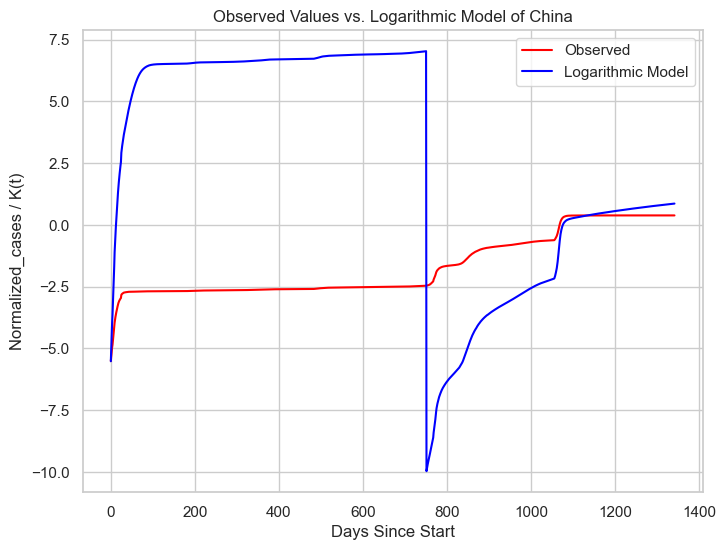

In [97]:
# Assuming you have a DataFrame named 'data' with the relevant columns

observed_values = first_wave_data_cn['Log_Normalized_cases']
logarithmic_model_values = first_wave_data_cn['y']
days_since_start = first_wave_data_cn['Days_since_start']

plt.figure(figsize=(8, 6))
plt.plot(days_since_start, observed_values, label='Observed', color='red')
plt.plot(days_since_start, logarithmic_model_values, label='Logarithmic Model', color='blue')

plt.xlabel('Days Since Start')
plt.ylabel('Normalized_cases / K(t)')
plt.legend()
plt.grid(True)
plt.title('Observed Values vs. Logarithmic Model of China')
plt.show()

In [98]:
covid_data_in

Date_reported Country_code Country  Cumulative_cases  Normalized_cases
0       2020-03-15           IN   India               107          0.000003
1       2020-03-16           IN   India               114          0.000003
2       2020-03-17           IN   India               137          0.000003
3       2020-03-18           IN   India               151          0.000004
4       2020-03-19           IN   India               173          0.000004
...            ...          ...     ...               ...               ...
1281    2023-09-17           IN   India          44998162          1.094080
1282    2023-09-18           IN   India          44998162          1.094080
1283    2023-09-19           IN   India          44998162          1.094080
1284    2023-09-20           IN   India          44998162          1.094080
1285    2023-09-21           IN   India          44998162          1.094080

[1286 rows x 5 columns]

In [99]:
# Calculate the number of days for each data point
covid_data_in['Days_since_start'] = (covid_data_in['Date_reported'] - covid_data_in['Date_reported'].min()).dt.days

covid_data_in['Log_Normalized_cases'] = np.log10(covid_data_in['Normalized_cases'])

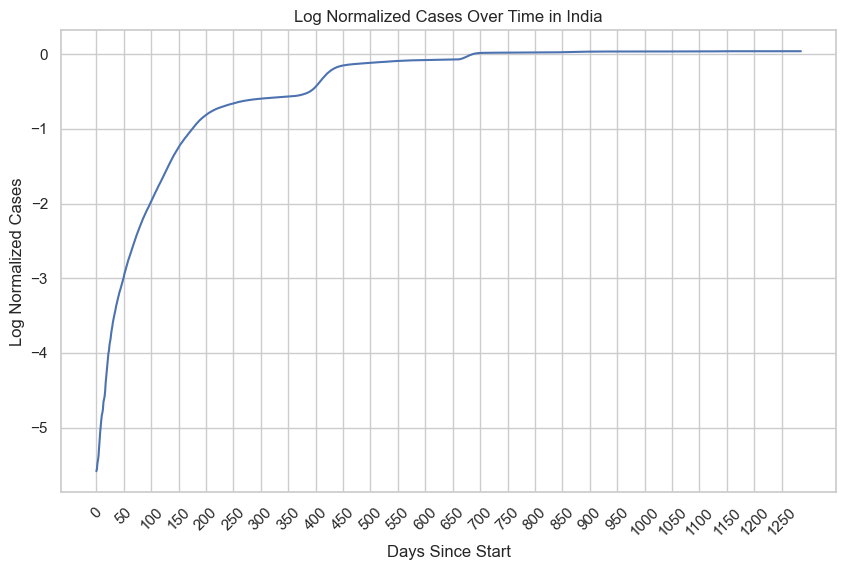

In [100]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=covid_data_in)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases Over Time in India")

# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 50  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(covid_data_in), step), covid_data_in['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

In [101]:
first_wave_in = covid_data_in[(covid_data_in["Days_since_start"]>=0) & (covid_data_in["Days_since_start"]<=350)]

second_wave_in = covid_data_in[(covid_data_in["Days_since_start"]>=351) & (covid_data_in["Days_since_start"]<=len(covid_data_in))]

second_wave_in.reset_index(drop=True, inplace=True)

In [102]:
second_wave_in


Date_reported Country_code Country  Cumulative_cases  Normalized_cases  \
0      2021-03-01           IN   India          11112241          0.270182   
1      2021-03-02           IN   India          11124527          0.270480   
2      2021-03-03           IN   India          11139516          0.270845   
3      2021-03-04           IN   India          11156923          0.271268   
4      2021-03-05           IN   India          11173761          0.271677   
..            ...          ...     ...               ...               ...   
930    2023-09-17           IN   India          44998162          1.094080   
931    2023-09-18           IN   India          44998162          1.094080   
932    2023-09-19           IN   India          44998162          1.094080   
933    2023-09-20           IN   India          44998162          1.094080   
934    2023-09-21           IN   India          44998162          1.094080   

     Days_since_start  Log_Normalized_cases  
0                 351             -0.568344  
1                 352             -0.567864  
2                 353             -0.567279  
3                 354             -0.566601  
4                 355             -0.565946  
..                ...                   ...  
930              1281              0.039049  
931              1282              0.039049  
932              1283              0.039049  
933              1284              0.039049  
934              1285              0.039049  

[935 rows x 7 columns]

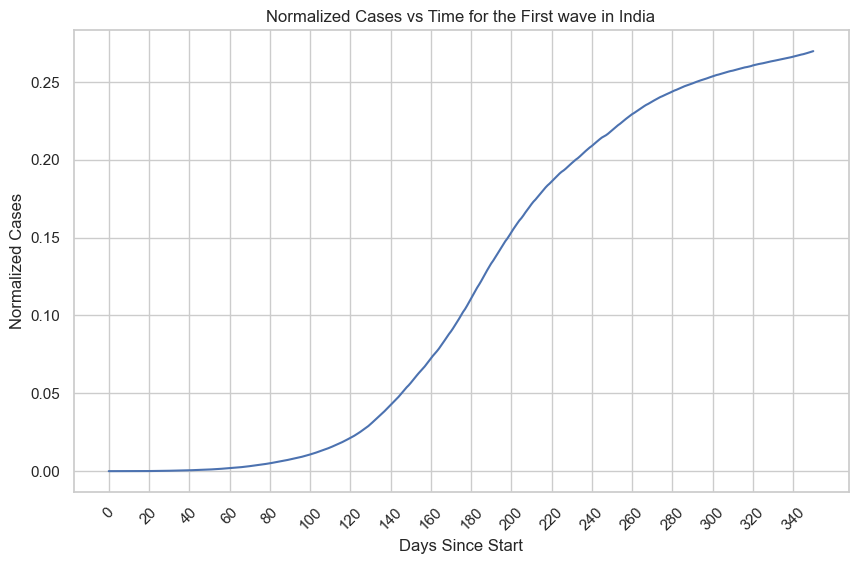

In [103]:
# Set the style for the Seaborn plot
sns.set(style="whitegrid")

# Select a subset of the data for the x-axis
subset_data = first_wave_in.iloc[::20]  # Adjust the step as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Normalized_cases", data=first_wave_in)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Normalized Cases")
plt.title("Normalized Cases vs Time for the First wave in India")

# Customize the x-axis ticks using the selected subset
plt.xticks(subset_data['Days_since_start'], rotation=45)

# Show the plot
plt.show()

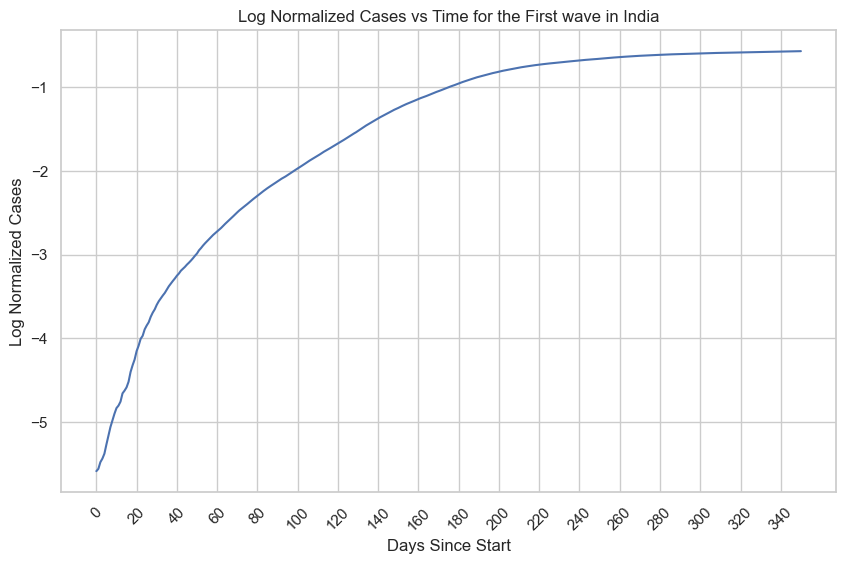

In [104]:
# Set the style for the Seaborn plot
sns.set(style="whitegrid")

# Select a subset of the data for the x-axis
subset_data = first_wave_in.iloc[::20]  # Adjust the step as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=first_wave_in)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases vs Time for the First wave in India")

# Customize the x-axis ticks using the selected subset
plt.xticks(subset_data['Days_since_start'], rotation=45)

# Show the plot
plt.show()

In [105]:
a0 = first_wave_in.iloc[0,-1]
print(a0)
a = math.exp(a0)

r = (first_wave_in.iloc[201, -1] - a0)/200

print("a:", a)
print("r:", r)

-5.584761954535056
a: 0.0037546434392422517
r: 0.023881967364674045


In [106]:
# Calculate N(t) using the exponential model
N = a * np.exp(r * first_wave_in["Days_since_start"])

# Simulate or provide observed data
observed_data = first_wave_in["Normalized_cases"]  # Replace with your observed data

# Calculate the error as the difference between observed and expected data
error = observed_data - N

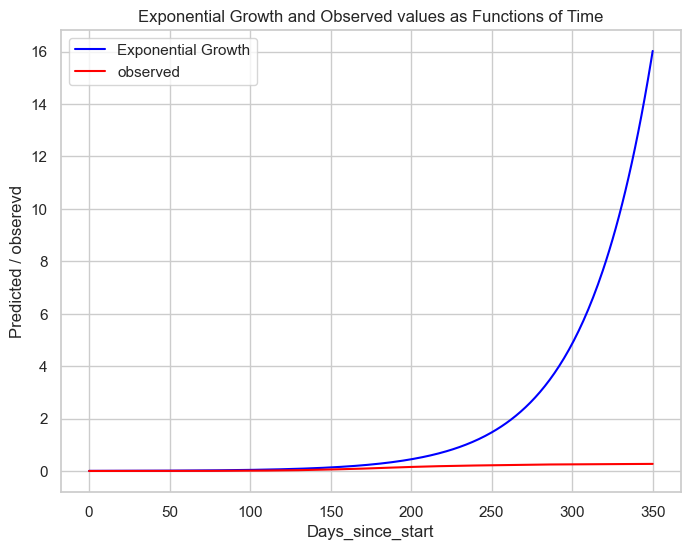

In [107]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(first_wave_in["Days_since_start"], N, label='Exponential Growth', color='blue')
plt.plot(first_wave_in["Days_since_start"], observed_data, label='observed', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('Predicted / obserevd')
plt.legend()
plt.grid(True)
plt.title('Exponential Growth and Observed values as Functions of Time')
plt.show()

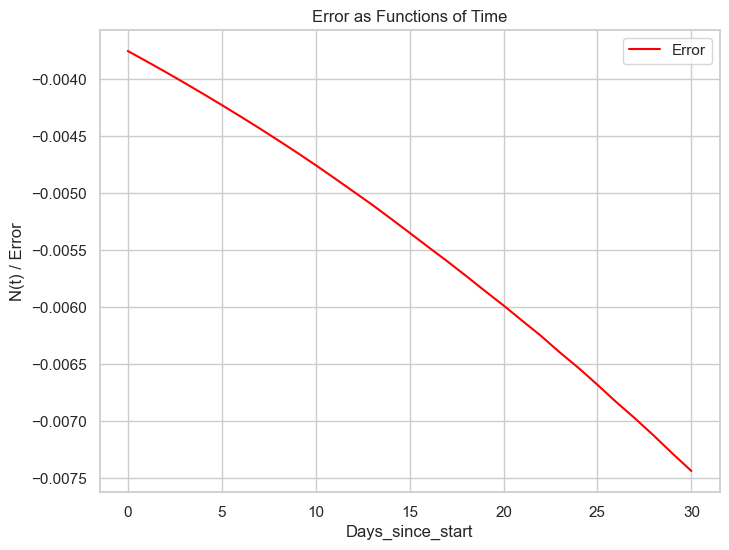

In [108]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(np.arange(31), error[:31], label='Error', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('N(t) / Error')
plt.legend()
plt.grid(True)
plt.title('Error as Functions of Time')
plt.show()

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/868154458.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave_in['K(t)'] = first_wave_in["Days_since_start"].apply(calculate_K)


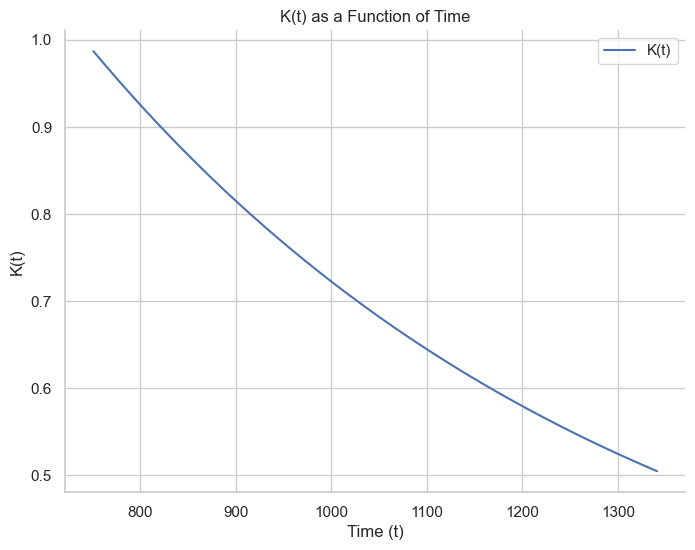

In [109]:
# Given values
a = first_wave_in.iloc[0,-1]  # Replace with the actual value of 'a'
P_0 = first_wave_in.iloc[0, -3] # Replace with the actual value of 'P(0)'

# Function to calculate K(t)
def calculate_K(t):
    a_rt = a + r * t
    exp_a_rt = math.exp(a_rt)
    K_t = P_0 * (1 + exp_a_rt) / exp_a_rt
    return K_t

# Apply the function to the DataFrame
first_wave_in['K(t)'] = first_wave_in["Days_since_start"].apply(calculate_K)

# Visualize the results with a simple line
plt.figure(figsize=(8, 6))
sns.lineplot(data=second_wave_cn, x='Days_since_start', y='K(t)', label='K(t)')
plt.xlabel('Time (t)')
plt.ylabel('K(t)')
plt.title('K(t) as a Function of Time')
plt.legend()
plt.grid(True)
sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()


/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/418654304.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave_in['y'] = y


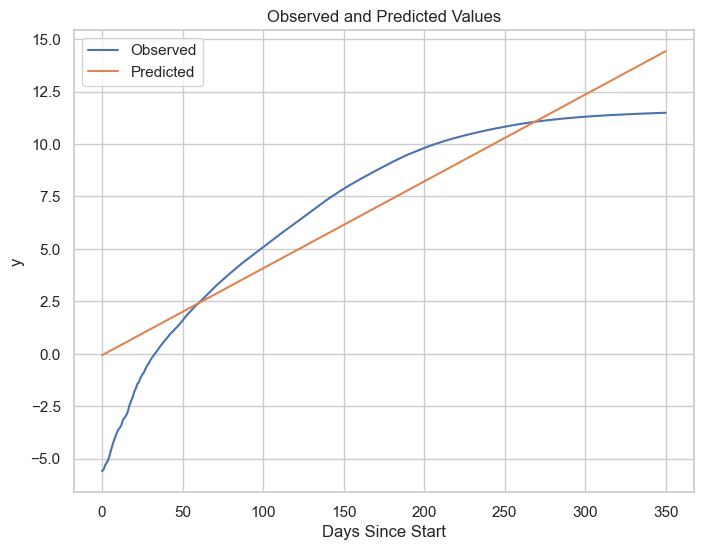

Fitted slope (m): 0.041391271699426135
Fitted intercept (b): -0.06495786094294309


In [110]:
# Function to calculate y-values based on your formula
def calculate_y_values(P, K_values):
    y_values = np.log(np.abs(P / K_values - P))
    return y_values

y = []
for i in range(len(first_wave_in)):
    y.append(calculate_y_values(first_wave_in.loc[i, "Normalized_cases"], first_wave_in.loc[i, "K(t)"]))

first_wave_in['y'] = y

# Function to model your regression line
def linear_regression(x, m, b):
    return m * x + b

# Fit the regression line
params, covariance = curve_fit(linear_regression, first_wave_in['Days_since_start'], first_wave_in['y'])

# Extract the parameters (m and b) from the fitted parameters
m, b = params

# Calculate the predicted y values based on the fitted regression line
predicted_y_values = linear_regression(first_wave_in['Days_since_start'], m, b)

# Plot the observed and predicted values without markers
plt.figure(figsize=(8, 6))
plt.plot(first_wave_in['Days_since_start'], first_wave_in['y'], label='Observed')
plt.plot(first_wave_in['Days_since_start'], predicted_y_values, label='Predicted')
plt.xlabel('Days Since Start')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Observed and Predicted Values')
plt.show()

# Print the parameters of the fitted regression line
print("Fitted slope (m):", m)
print("Fitted intercept (b):", b)

In [111]:
mse = np.mean((first_wave_in['y'] - predicted_y_values) ** 2)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.8141215607651215


In [112]:
second_wave_in[second_wave_in["Days_since_start"]==351]

Date_reported Country_code Country  Cumulative_cases  Normalized_cases  \
0    2021-03-01           IN   India          11112241          0.270182   

   Days_since_start  Log_Normalized_cases  
0               351             -0.568344

In [113]:
second_wave_in[second_wave_in["Days_since_start"]==441]

Date_reported Country_code Country  Cumulative_cases  Normalized_cases  \
90    2021-05-30           IN   India          27894800          0.678231   

    Days_since_start  Log_Normalized_cases  
90               441             -0.168622

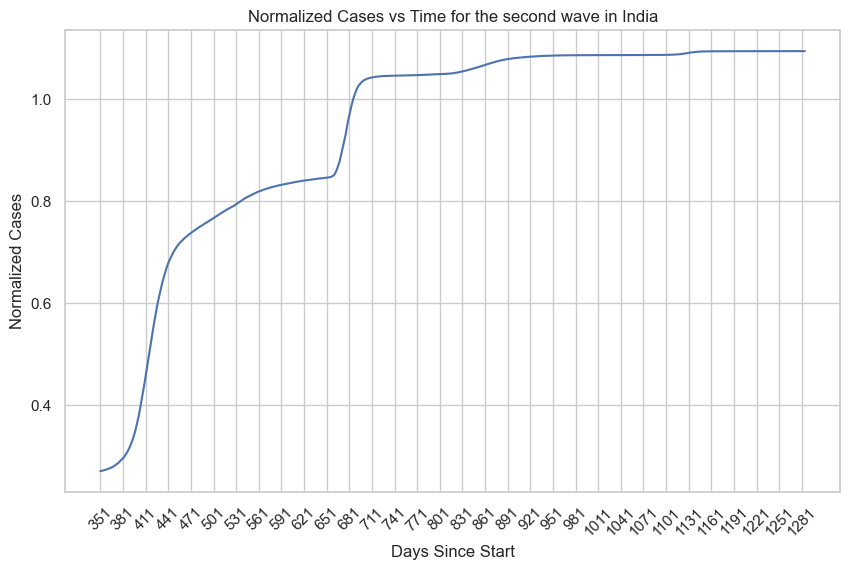

In [114]:
# Set the style for the Seaborn plot
sns.set(style="whitegrid")

# Select a subset of the data for the x-axis
subset_data = second_wave_in.iloc[::30]  # Adjust the step as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Normalized_cases", data=second_wave_in)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Normalized Cases")
plt.title("Normalized Cases vs Time for the second wave in India")

# Customize the x-axis ticks using the selected subset
selected_ticks = subset_data['Days_since_start']
plt.xticks(selected_ticks, rotation=45)

# Show the plot
plt.show()

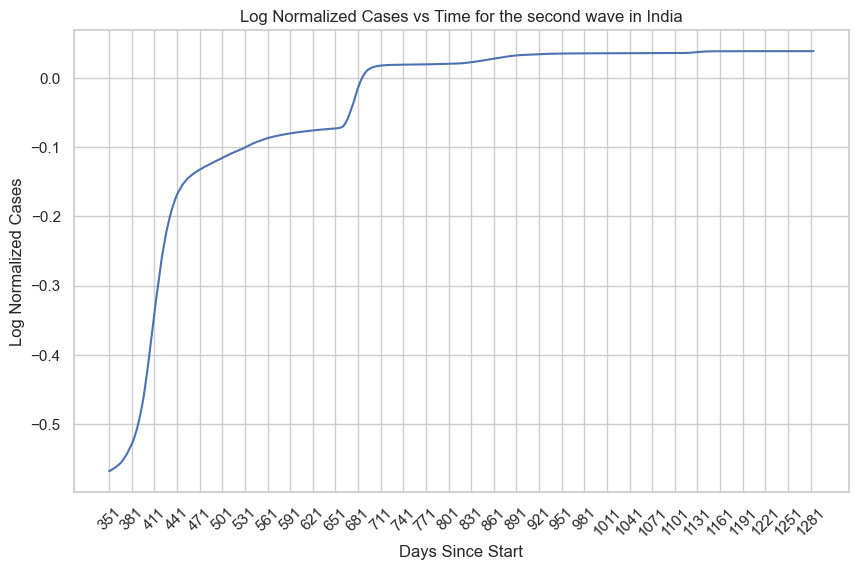

In [115]:
# Set the style for the Seaborn plot
sns.set(style="whitegrid")

# Select a subset of the data for the x-axis
subset_data = second_wave_in.iloc[::30]  # Adjust the step as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=second_wave_in)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases vs Time for the second wave in India")

# Customize the x-axis ticks using the selected subset
selected_ticks = subset_data['Days_since_start']
plt.xticks(selected_ticks, rotation=45)

# Show the plot
plt.show()

In [116]:
a0 = second_wave_in.iloc[0,-1]
print(a0)
a = math.exp(a0)

r = (second_wave_in.iloc[90, -1] - a0)/441

print("a:", a)
print("r:", r)

-0.5683440804990619
a: 0.566462679084907
r: 0.0009063981864714377


In [117]:
# Calculate N(t) using the exponential model
N = a * np.exp(r * second_wave_in["Days_since_start"])

# Simulate or provide observed data
observed_data = second_wave_in["Normalized_cases"]  # Replace with your observed data

# Calculate the error as the difference between observed and expected data
error = observed_data - N

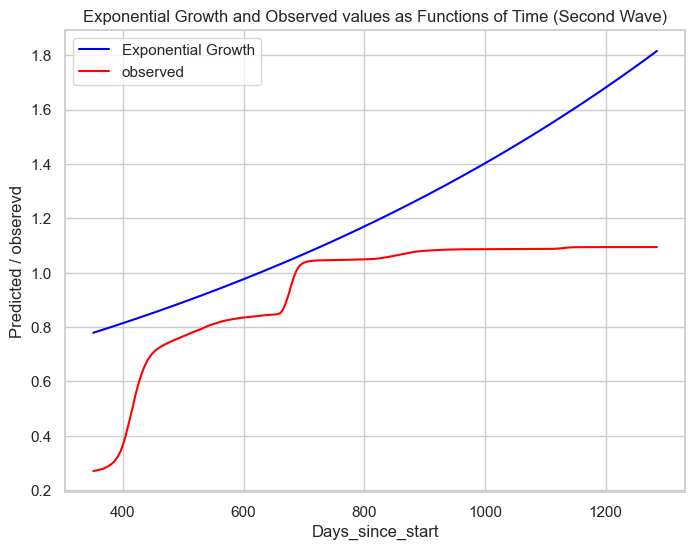

In [118]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(second_wave_in["Days_since_start"], N, label='Exponential Growth', color='blue')
plt.plot(second_wave_in["Days_since_start"], observed_data, label='observed', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('Predicted / obserevd')
plt.legend()
plt.grid(True)
plt.title('Exponential Growth and Observed values as Functions of Time (Second Wave)')
plt.show()

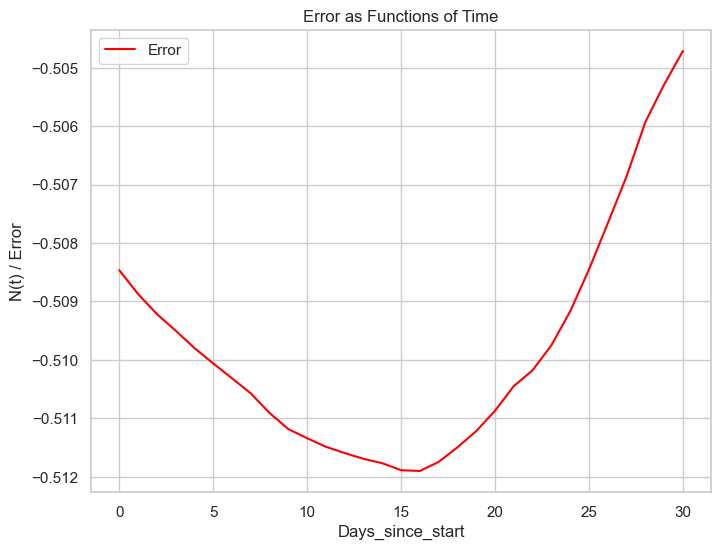

In [119]:
# Plot exponential growth and error
plt.figure(figsize=(8, 6))
plt.plot(np.arange(31), error[:31], label='Error', color='red')
plt.xlabel('Days_since_start')
plt.ylabel('N(t) / Error')
plt.legend()
plt.grid(True)
plt.title('Error as Functions of Time')
plt.show()

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/1091029795.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_wave_in['K(t)'] = second_wave_in["Days_since_start"].apply(calculate_K)


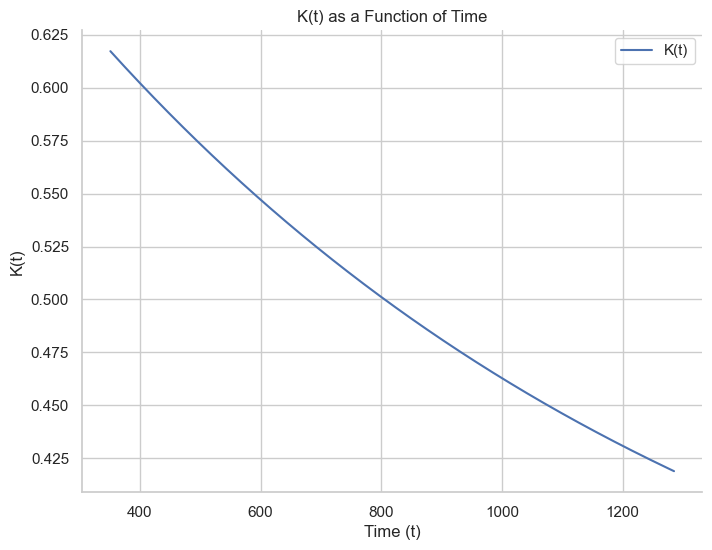

In [120]:
# Given values
a = second_wave_in.iloc[0,-1]  # Replace with the actual value of 'a'
P_0 = second_wave_in.iloc[0, -3] # Replace with the actual value of 'P(0)'

# Function to calculate K(t)
def calculate_K(t):
    a_rt = a + r * t
    exp_a_rt = math.exp(a_rt)
    K_t = P_0 * (1 + exp_a_rt) / exp_a_rt
    return K_t

# Apply the function to the DataFrame
second_wave_in['K(t)'] = second_wave_in["Days_since_start"].apply(calculate_K)

# Visualize the results with a simple line
plt.figure(figsize=(8, 6))
sns.lineplot(data=second_wave_in, x='Days_since_start', y='K(t)', label='K(t)')
plt.xlabel('Time (t)')
plt.ylabel('K(t)')
plt.title('K(t) as a Function of Time')
plt.legend()
plt.grid(True)
sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()


/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/347785378.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_wave_in['y'] = y


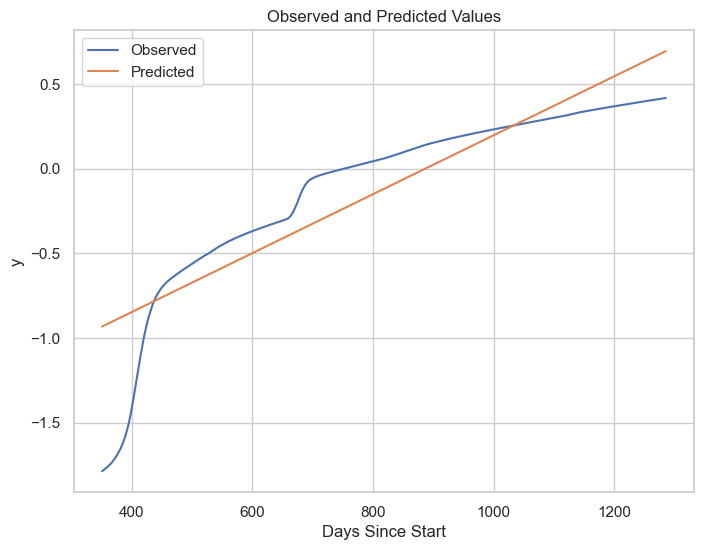

Fitted slope (m): 0.0017407551048003178
Fitted intercept (b): -1.5437143773036248


In [121]:
# Function to calculate y-values based on your formula
def calculate_y_values(P, K_values):
    y_values = np.log(np.abs(P / K_values - P))
    return y_values

y = []
for i in range(len(second_wave_in)):
    y.append(calculate_y_values(second_wave_in.loc[i, "Normalized_cases"], second_wave_in.loc[i, "K(t)"]))

second_wave_in['y'] = y

# Function to model your regression line
def linear_regression(x, m, b):
    return m * x + b

# Fit the regression line
params, covariance = curve_fit(linear_regression, second_wave_in['Days_since_start'], second_wave_in['y'])

# Extract the parameters (m and b) from the fitted parameters
m, b = params

# Calculate the predicted y values based on the fitted regression line
predicted_y_values = linear_regression(second_wave_in['Days_since_start'], m, b)

# Plot the observed and predicted values without markers
plt.figure(figsize=(8, 6))
plt.plot(second_wave_in['Days_since_start'], second_wave_in['y'], label='Observed')
plt.plot(second_wave_in['Days_since_start'], predicted_y_values, label='Predicted')
plt.xlabel('Days Since Start')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Observed and Predicted Values')
plt.show()

# Print the parameters of the fitted regression line
print("Fitted slope (m):", m)
print("Fitted intercept (b):", b)

In [122]:
mse = np.mean((second_wave_in['y'] - predicted_y_values) ** 2)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.05692430537330079


In [123]:
first_wave_data_in = pd.concat([first_wave_in, second_wave_in])
first_wave_data_in

Date_reported Country_code Country  Cumulative_cases  Normalized_cases  \
0      2020-03-15           IN   India               107          0.000003   
1      2020-03-16           IN   India               114          0.000003   
2      2020-03-17           IN   India               137          0.000003   
3      2020-03-18           IN   India               151          0.000004   
4      2020-03-19           IN   India               173          0.000004   
..            ...          ...     ...               ...               ...   
930    2023-09-17           IN   India          44998162          1.094080   
931    2023-09-18           IN   India          44998162          1.094080   
932    2023-09-19           IN   India          44998162          1.094080   
933    2023-09-20           IN   India          44998162          1.094080   
934    2023-09-21           IN   India          44998162          1.094080   

     Days_since_start  Log_Normalized_cases      K(t)         y  
0                   0             -5.584762  0.000695 -5.589205  
1                   1             -5.557241  0.000679 -5.502028  
2                   2             -5.477425  0.000663 -5.294440  
3                   3             -5.435169  0.000648 -5.173338  
4                   4             -5.376100  0.000632 -5.013526  
..                ...                   ...       ...       ...  
930              1281              0.039049  0.419539  0.414579  
931              1282              0.039049  0.419404  0.415135  
932              1283              0.039049  0.419269  0.415690  
933              1284              0.039049  0.419134  0.416245  
934              1285              0.039049  0.418999  0.416799  

[1286 rows x 9 columns]

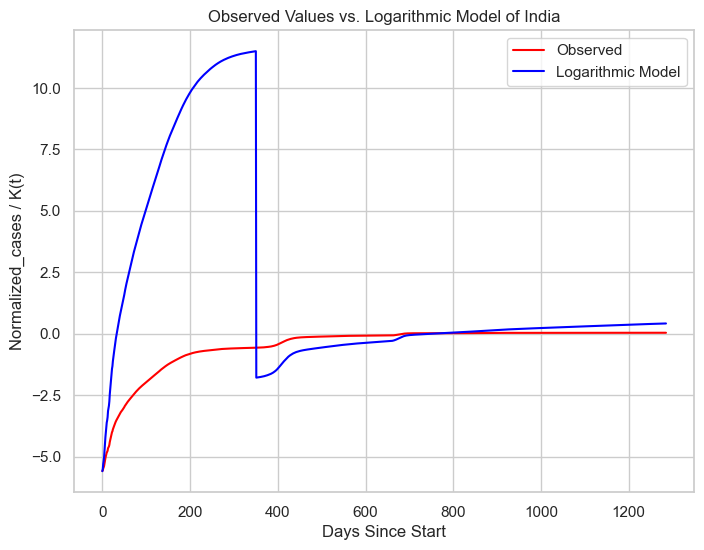

In [124]:
# Assuming you have a DataFrame named 'data' with the relevant columns

observed_values = first_wave_data_in['Log_Normalized_cases']
logarithmic_model_values = first_wave_data_in['y']
days_since_start = first_wave_data_in['Days_since_start']

plt.figure(figsize=(8, 6))
plt.plot(days_since_start, observed_values, label='Observed', color='red')
plt.plot(days_since_start, logarithmic_model_values, label='Logarithmic Model', color='blue')

plt.xlabel('Days Since Start')
plt.ylabel('Normalized_cases / K(t)')
plt.legend()
plt.grid(True)
plt.title('Observed Values vs. Logarithmic Model of India')
plt.show()

### Draft 2
Task 1:

we have selected data from when epidemic has started that is from 30-03-2020 is 106 patients are there for COuntry Afghanistan

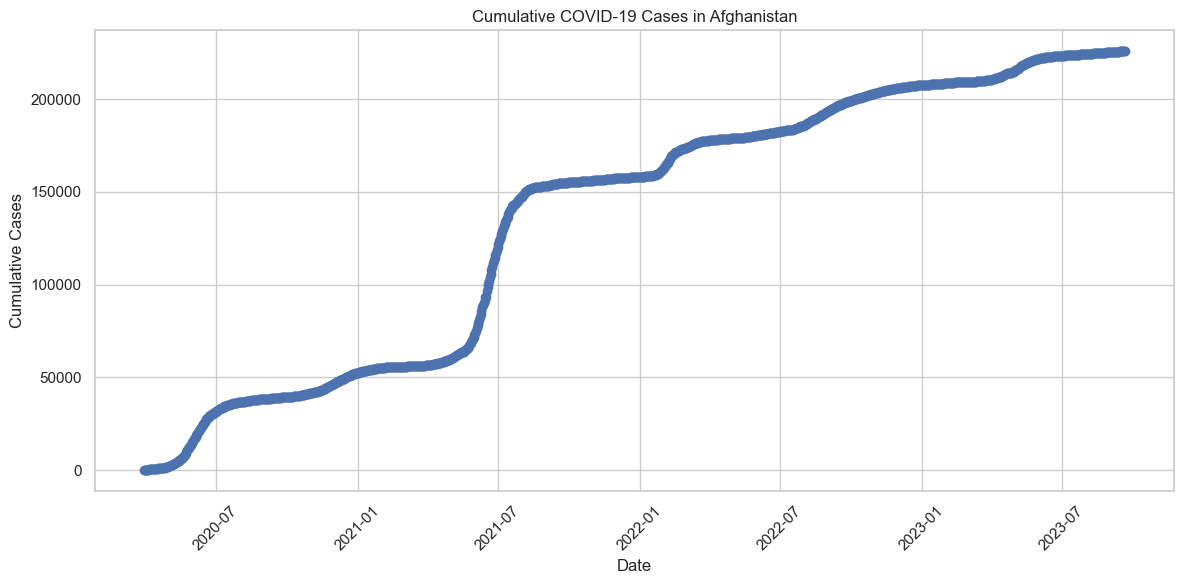

In [125]:
# Filter the DataFrame to keep data from 30-03-2020 onwards
covid_data_afg = covid_data_afg[covid_data_afg['Date_reported'] >= '2020-03-30']

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the cumulative cases over time
plt.plot(covid_data_afg['Date_reported'], covid_data_afg['Cumulative_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in Afghanistan')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()



we have selected data from when epidemic has started that is from 19-01-2020 is 125 patients are there for Country China

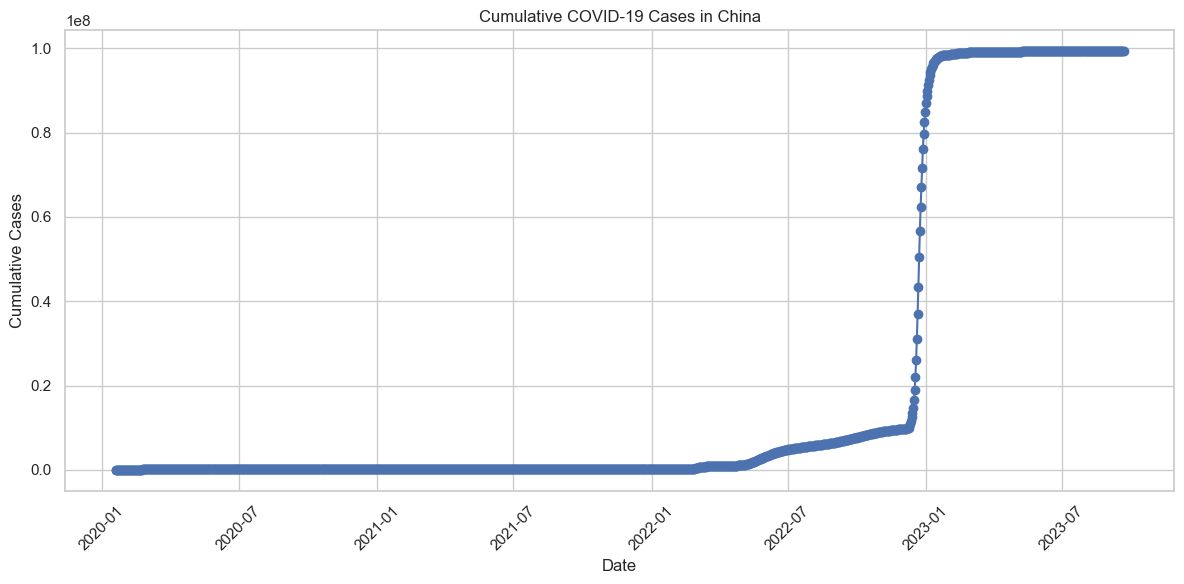

In [126]:
# Filter the DataFrame to keep data from 30-03-2020 onwards
covid_data_cn = covid_data_cn[covid_data_cn['Date_reported'] >= '2020-01-19']

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the cumulative cases over time
plt.plot(covid_data_cn['Date_reported'], covid_data_cn['Cumulative_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in China')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

we have selected data from when epidemic has started that is from 15-03-2020 is 107 patients are there for Country India

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/3114537548.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_data_in = covid_data_in[covid_data_cn['Date_reported'] >= '2020-03-15']


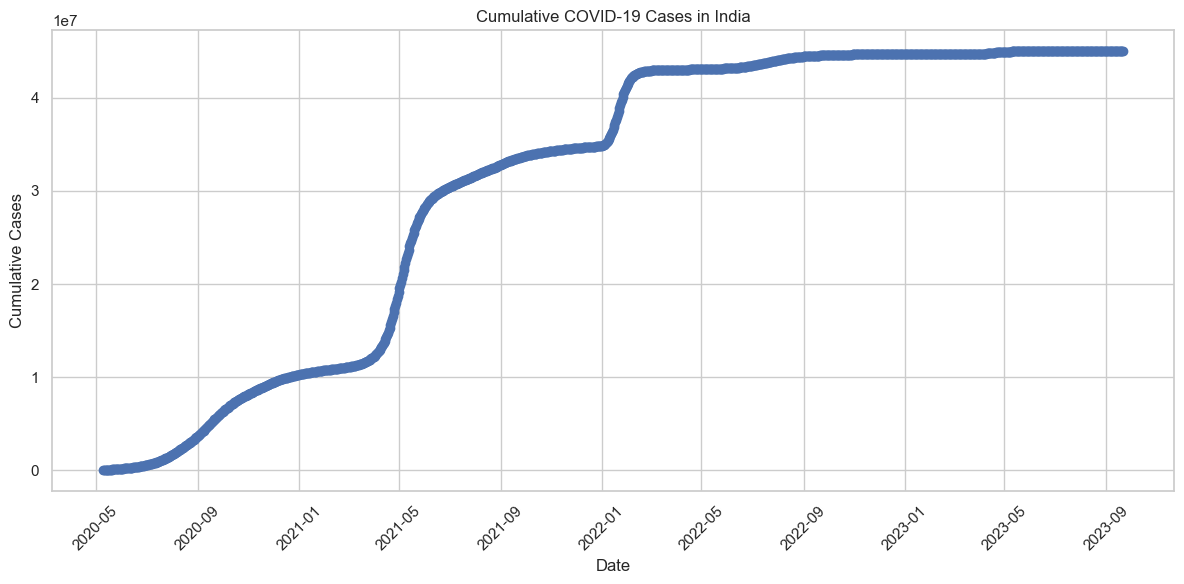

In [127]:
# Filter the DataFrame to keep data from 30-03-2020 onwards
covid_data_in = covid_data_in[covid_data_cn['Date_reported'] >= '2020-03-15']

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the cumulative cases over time
plt.plot(covid_data_in['Date_reported'], covid_data_in['Cumulative_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases in India')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

The graph shows normalized cumulative COVID-19 cases in Afghanistan starting from 30-03-2020, after the country had reached 106 cases. It reveals a steady increase in cases per capita over time, reflecting the ongoing impact of the pandemic in Afghanistan despite population normalization.

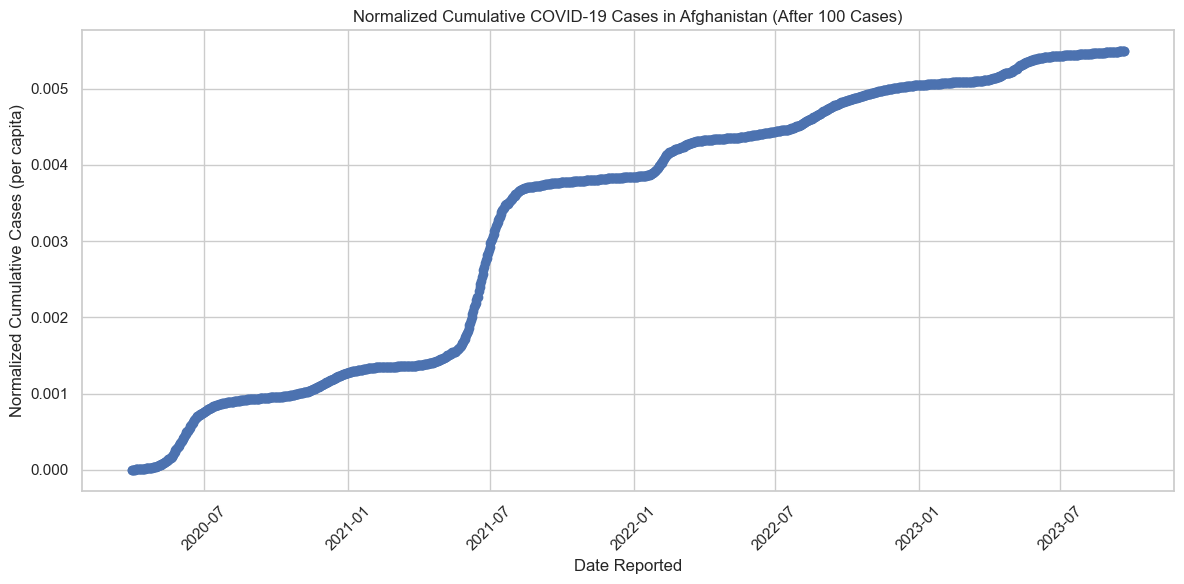

In [128]:
# Assuming you have the 'covid_data_afg' DataFrame with the necessary data and the population of Afghanistan

# Convert 'Date_reported' to datetime
covid_data_afg['Date_reported'] = pd.to_datetime(covid_data_afg['Date_reported'])

# Filter the data for dates starting from 30-03-2020
covid_data_afg = covid_data_afg[covid_data_afg['Date_reported'] >= '2020-03-30']

# Normalize the cumulative cases by dividing by the population of Afghanistan
population_afg = 41128771  # Afghanistan's population
covid_data_afg['Normalized_cases'] = covid_data_afg['Cumulative_cases'] / population_afg

# Filter the data for dates after 100 cases
covid_data_afg = covid_data_afg[covid_data_afg['Cumulative_cases'] >= 100]

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the normalized cumulative cases over time
plt.plot(covid_data_afg['Date_reported'], covid_data_afg['Normalized_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date Reported')
plt.ylabel('Normalized Cumulative Cases (per capita)')
plt.title('Normalized Cumulative COVID-19 Cases in Afghanistan (After 100 Cases)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

The graph shows normalized cumulative COVID-19 cases in China starting from 19-01-2020, after the country had reached 125 cases. It reveals a steady increase in cases per capita over time, reflecting the ongoing impact of the pandemic in China despite population normalization.

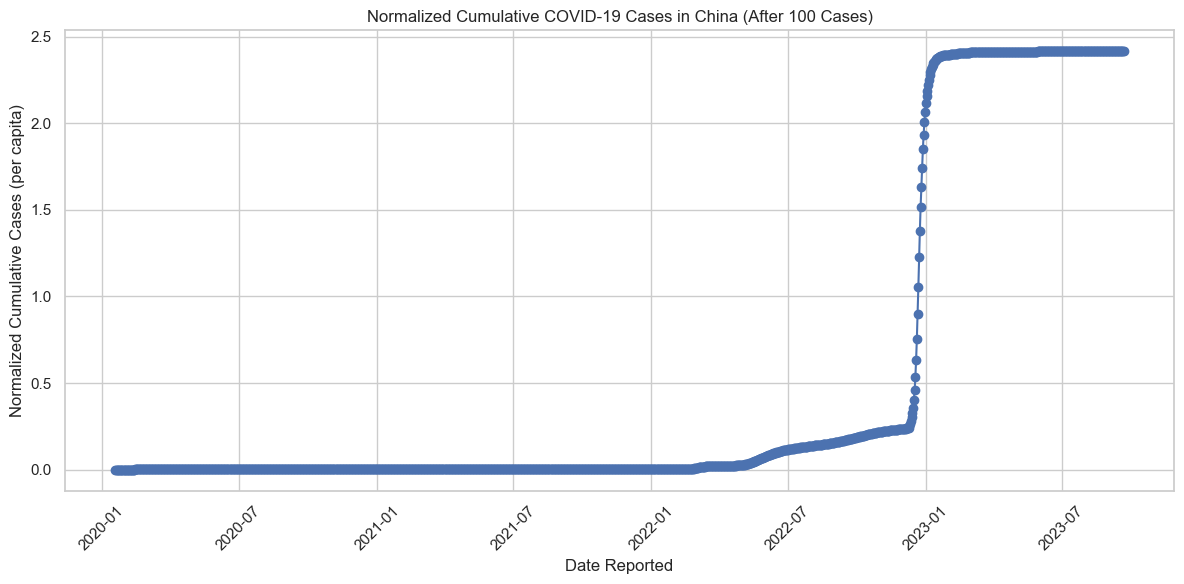

In [129]:
# Assuming you have the 'covid_data_afg' DataFrame with the necessary data and the population of Afghanistan

# Convert 'Date_reported' to datetime
covid_data_cn['Date_reported'] = pd.to_datetime(covid_data_cn['Date_reported'])

# Filter the data for dates starting from 30-03-2020
covid_data_cn = covid_data_cn[covid_data_cn['Date_reported'] >= '2020-01-19']

# Normalize the cumulative cases by dividing by the population of Afghanistan
population_cn = 1425887337  # Afghanistan's population
covid_data_cn['Normalized_cases'] = covid_data_cn['Cumulative_cases'] / population_afg

# Filter the data for dates after 100 cases
covid_data_cn = covid_data_cn[covid_data_cn['Cumulative_cases'] >= 100]

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the normalized cumulative cases over time
plt.plot(covid_data_cn['Date_reported'], covid_data_cn['Normalized_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date Reported')
plt.ylabel('Normalized Cumulative Cases (per capita)')
plt.title('Normalized Cumulative COVID-19 Cases in China (After 100 Cases)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

The graph shows normalized cumulative COVID-19 cases in India starting from 15-03-2020, after the country had reached 107 cases. It reveals a steady increase in cases per capita over time, reflecting the ongoing impact of the pandemic in India despite population normalization.

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/927242765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_in['Date_reported'] = pd.to_datetime(covid_data_in['Date_reported'])


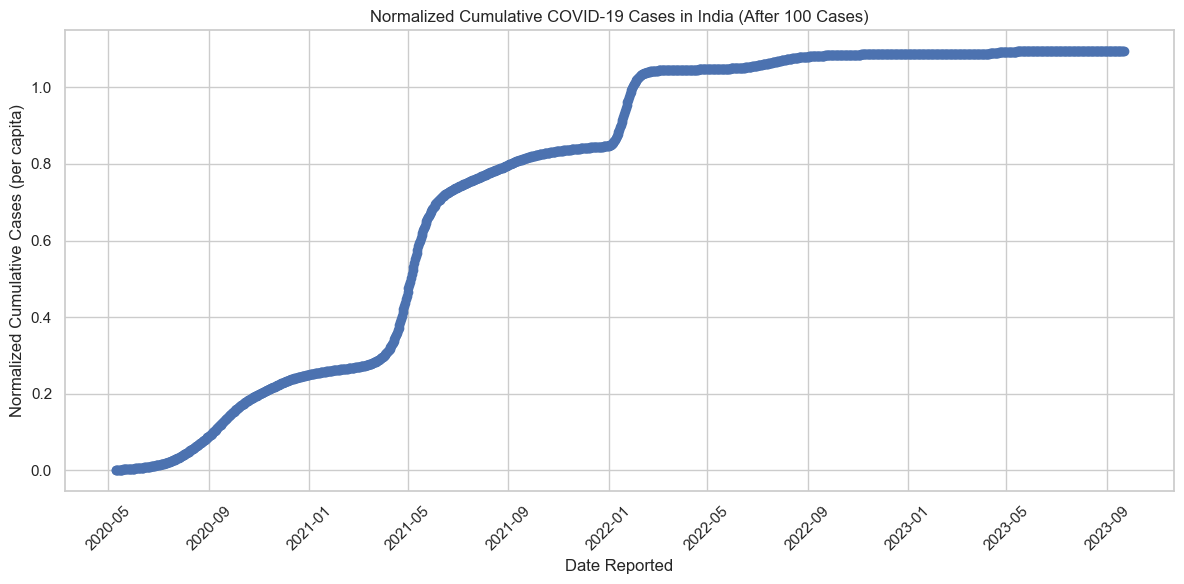

In [130]:
# Assuming you have the 'covid_data_afg' DataFrame with the necessary data and the population of Afghanistan

# Convert 'Date_reported' to datetime
covid_data_in['Date_reported'] = pd.to_datetime(covid_data_in['Date_reported'])

# Filter the data for dates starting from 30-03-2020
covid_data_in = covid_data_in[covid_data_in['Date_reported'] >= '2020-03-15']

# Normalize the cumulative cases by dividing by the population of Afghanistan
population_in = 1417173173  # Afghanistan's population
covid_data_in['Normalized_cases'] = covid_data_in['Cumulative_cases'] / population_afg

# Filter the data for dates after 100 cases
covid_data_in = covid_data_in[covid_data_in['Cumulative_cases'] >= 100]

# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the normalized cumulative cases over time
plt.plot(covid_data_in['Date_reported'], covid_data_in['Normalized_cases'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date Reported')
plt.ylabel('Normalized Cumulative Cases (per capita)')
plt.title('Normalized Cumulative COVID-19 Cases in India (After 100 Cases)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add a grid
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

In [131]:
covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
0       2020-03-30           AF  Afghanistan               106   
1       2020-03-31           AF  Afghanistan               114   
2       2020-04-01           AF  Afghanistan               166   
3       2020-04-02           AF  Afghanistan               192   
4       2020-04-03           AF  Afghanistan               194   
...            ...          ...          ...               ...   
1266    2023-09-17           AF  Afghanistan            225786   
1267    2023-09-18           AF  Afghanistan            225786   
1268    2023-09-19           AF  Afghanistan            225786   
1269    2023-09-20           AF  Afghanistan            225786   
1270    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  Days_since_start  Log_Normalized_cases  
0             0.000003                 0             -5.588840  
1             0.000003                 1             -5.557241  
2             0.000004                 2             -5.394038  
3             0.000005                 3             -5.330845  
4             0.000005                 4             -5.326344  
...                ...               ...                   ...  
1266          0.005490              1266             -2.260449  
1267          0.005490              1267             -2.260449  
1268          0.005490              1268             -2.260449  
1269          0.005490              1269             -2.260449  
1270          0.005490              1270             -2.260449  

[1271 rows x 7 columns]

### TasK 2:

• Plot logarithms of the normalised cumulative data of each country. We can recognise two waves: the first from 1 to 420 (end of the first green line), the second from 421 to 1221 to the end of data. Here we can see exponential growth from 1 to 80 days then logarithmetic saturation came. Again we can see exponential growth from 421 to 471 and again saturation come.


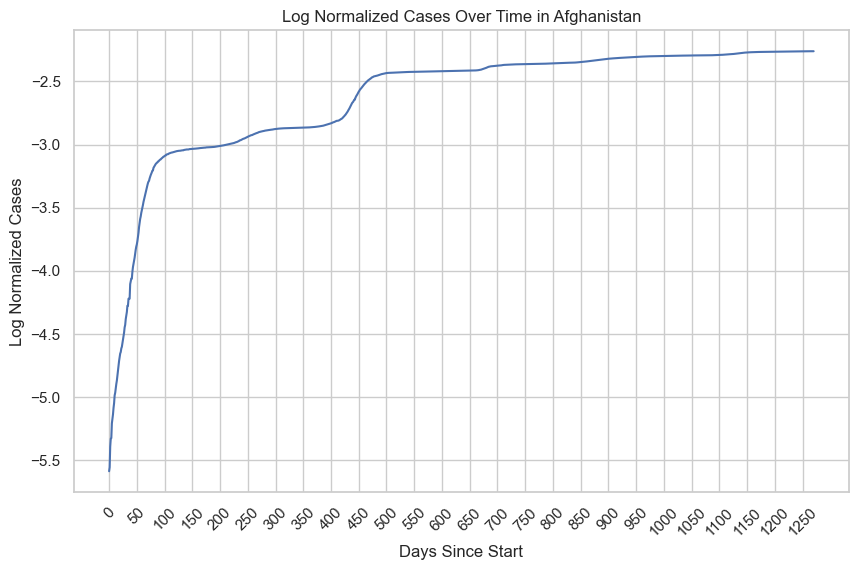

In [132]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=covid_data_afg)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases Over Time in Afghanistan")

# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 50  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(covid_data_afg), step), covid_data_afg['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

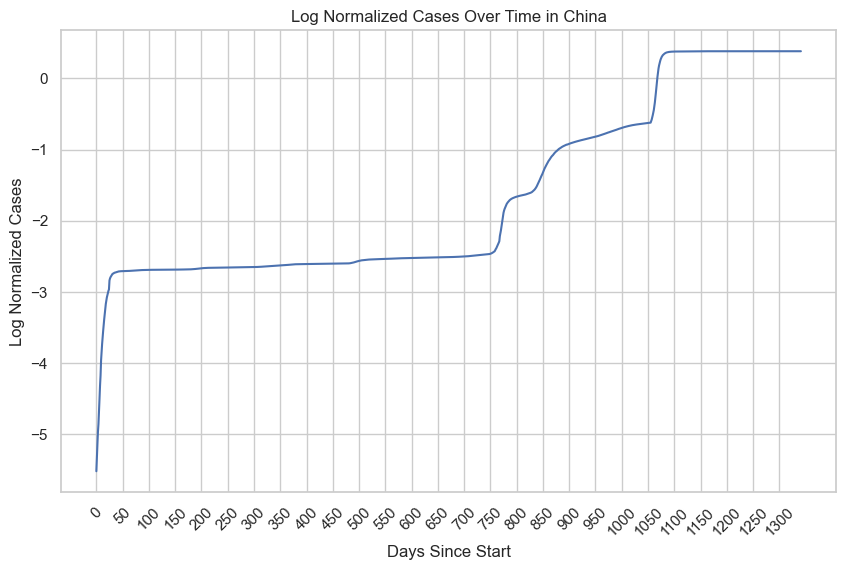

In [133]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=covid_data_cn)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases Over Time in China")

# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 50  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(covid_data_cn), step), covid_data_cn['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

We can recognise two waves: the first from 1 to 350, the second from 351 to 1285 to the end of data.

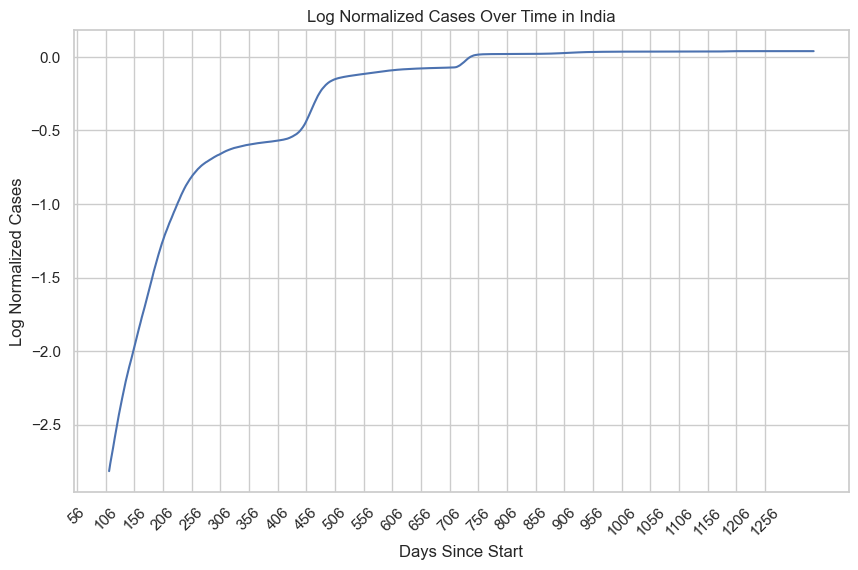

In [134]:
# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x="Days_since_start", y="Log_Normalized_cases", data=covid_data_in)

# Set labels and title
plt.xlabel("Days Since Start")
plt.ylabel("Log Normalized Cases")
plt.title("Log Normalized Cases Over Time in India")

# Customize the x-axis ticks
# Here, we're using range(0, len(covid_data_afg), step) to set ticks at regular intervals.
step = 50  # You can adjust this value to control the interval between ticks
plt.xticks(range(0, len(covid_data_in), step), covid_data_in['Days_since_start'][::step], rotation=45)

# Show the plot
plt.show()

Within the framework of the SIR (Susceptible-Infectious-Removed) model, the exponential growth phase represents the early stages of an outbreak for infectious diseases such as COVID-19. The number of infected individuals (I) grows quickly and continuously during this stage, increasing at a steady rate. The basic formula that describes this increase is dI/dt = aSI, in which an is the rate of transmission, dI/dt is the rate of new infections, S is the pool of susceptible people, and I is the number of infected cases.
There are a fair number of susceptible people (S) in the beginning of this phase who could get the disease. The pool of susceptible people gets smaller as the exponential expansion continues, and the number of infected cases rises more rapidly. The exponential growth eventually slows down as a larger proportion of the population contracts the infection, which reduces the number of vulnerable people.

In [135]:
covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
0       2020-03-30           AF  Afghanistan               106   
1       2020-03-31           AF  Afghanistan               114   
2       2020-04-01           AF  Afghanistan               166   
3       2020-04-02           AF  Afghanistan               192   
4       2020-04-03           AF  Afghanistan               194   
...            ...          ...          ...               ...   
1266    2023-09-17           AF  Afghanistan            225786   
1267    2023-09-18           AF  Afghanistan            225786   
1268    2023-09-19           AF  Afghanistan            225786   
1269    2023-09-20           AF  Afghanistan            225786   
1270    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  Days_since_start  Log_Normalized_cases  
0             0.000003                 0             -5.588840  
1             0.000003                 1             -5.557241  
2             0.000004                 2             -5.394038  
3             0.000005                 3             -5.330845  
4             0.000005                 4             -5.326344  
...                ...               ...                   ...  
1266          0.005490              1266             -2.260449  
1267          0.005490              1267             -2.260449  
1268          0.005490              1268             -2.260449  
1269          0.005490              1269             -2.260449  
1270          0.005490              1270             -2.260449  

[1271 rows x 7 columns]

To estimate the initial number of susceptible individuals (S0) using the SIR model, we need to subtract the cumulative cases from the 1 and then normalize it to be a fraction of the population. Here's the corrected calculation for S0.



The reason for dividing by the total population is to normalize the cumulative cases and obtain the fraction of the population that is still susceptible (S) to the disease. In the context of epidemiology and compartmental models like SIR (Susceptible-Infectious-Recovered), the total population is divided into different compartments:

Susceptible (S): Individuals who are not infected but are at risk of getting the infection.
Infectious (I): Individuals who are currently infected and can spread the disease.
Recovered (R): Individuals who have recovered from the infection and are assumed to be immune.
In the SIR model, the fraction of the population that is susceptible (S) is given by:

S=Number of Susceptible Individuals / Total Population


In [136]:
# Total population
total_population = 41128771  # Replace with the actual total population

# Cumulative cases on Day 0 and Day 1270
cumulative_cases_beginning = covid_data_afg[covid_data_afg['Date_reported'] == '2020-03-30']['Cumulative_cases'].iloc[0]
cumulative_cases_end = covid_data_afg[covid_data_afg['Date_reported'] == '2023-09-21']['Cumulative_cases'].iloc[0]
print(cumulative_cases_beginning)
print(cumulative_cases_end)

# Estimate S at the beginning (Day 0)
S_beginning = 1 - cumulative_cases_beginning / total_population

# Estimate S at the end (Day 1270)
S_end = 1 - cumulative_cases_end / total_population

print(f"Estimated S at the beginning (Day 0): {S_beginning}")
print(f"Estimated S at the end (Day 1270): {S_end}")

106
225786
Estimated S at the beginning (Day 0): 0.9999974227287268
Estimated S at the end (Day 1270): 0.994510266304821


Here we have seleceted two waves of each country and need to find r and c for these waves together. Then we'll select interval of wave which have less mean square error then find c and r of that wave.
We can recognise two waves: the first from 1 to 420 (end of the first green line), the second from 421 to 1221 to the end of data.
Second wave has less mean square that is 0.0109.
The exponential model with parameters  functions with a=-2.478558and r= 0.0006584  only during the first 50 days from 421 to 471,

The estimated value of "r" will provide information about the growth rate or decay rate in the log-transformed cumulative data. it can be considered as an approximation of the exponent "r" in the equation logP ≈ c + rt

So r will be same with the second wave exponential growth.


In [137]:
# Assuming the third-to-last column contains logarithmic values
log_normalized_cases_column = first_wave_data.iloc[:, -3]

# Calculate 'a0'
a0 = log_normalized_cases_column.iloc[0]
a = math.exp(a0)

# Calculate 'r' for the entire wave
r = (log_normalized_cases_column.iloc[-1] - a0) / (log_normalized_cases_column.index[-1] - log_normalized_cases_column.index[0])

print("a0:", a0)
#print("a:", a)
print("r:", r)

a0: -5.588839866955495
r: 0.003920366483465442


In [138]:
mse = np.mean((first_wave_data['y'] - predicted_y_values) ** 2)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 13.404779787122033


In [139]:
first_wave_data


Date_reported Country_code      Country  Cumulative_cases  \
0      2020-03-30           AF  Afghanistan               106   
1      2020-03-31           AF  Afghanistan               114   
2      2020-04-01           AF  Afghanistan               166   
3      2020-04-02           AF  Afghanistan               192   
4      2020-04-03           AF  Afghanistan               194   
..            ...          ...          ...               ...   
845    2023-09-17           AF  Afghanistan            225786   
846    2023-09-18           AF  Afghanistan            225786   
847    2023-09-19           AF  Afghanistan            225786   
848    2023-09-20           AF  Afghanistan            225786   
849    2023-09-21           AF  Afghanistan            225786   

     Normalized_cases  Days_since_start  Log_Normalized_cases      K(t)  \
0            0.000003                 0             -5.588840  0.000692   
1            0.000003                 1             -5.557241  0.000671   
2            0.000004                 2             -5.394038  0.000652   
3            0.000005                 3             -5.330845  0.000632   
4            0.000005                 4             -5.326344  0.000614   
..                ...               ...                   ...       ...   
845          0.005490              1266             -2.260449  0.038252   
846          0.005490              1267             -2.260449  0.038230   
847          0.005490              1268             -2.260449  0.038208   
848          0.005490              1269             -2.260449  0.038186   
849          0.005490              1270             -2.260449  0.038164   

            y  
0   -5.593264  
1   -5.490548  
2   -5.084805  
3   -4.909349  
4   -4.869042  
..        ...  
845 -1.980322  
846 -1.979723  
847 -1.979123  
848 -1.978523  
849 -1.977924  

[1271 rows x 9 columns]

### Task 3:
### parameters of the SIR model


In [140]:
# Define the known values
r=0.0006584 
b = 0.1  # Value of 'b'
gamma = 1 / 10  # Recovery rate (approximately 1/τ where τ ≈ 10 days)

# Calculate 'a' based on the provided relationship a = r + b
a = r + b  # Assuming 'r' is known

# Calculate 'beta' based on the relationship β = a + γ
beta = a + gamma

# Print the calculated coefficients
print("a:", a)
print("beta:", beta)
print("gamma:", gamma)
print("r:", r)  # If 'r' is known, include it here

# Now you have the SIR coefficients 'a,' 'beta,' 'gamma,' and 'r' (if known) for your model.

a: 0.10065840000000001
beta: 0.20065840000000001
gamma: 0.1
r: 0.0006584


we took total population of afghanistan that is 41128771, for I0 we took cumulative cases as 106 on 30-03-2020 and R0, we took 0.02%, we have skipped first few data due to abnormalities so we can assume a very small value for R0 that is 0.02%.

### First infections and recovery times are taken into account, with a population of 41,128,771 taken into account. Through the course of 420 days, the simulation shows how the vulnerable, infected, and recovered individuals changed. The rates of recovery and transmission are affected by the beta and gamma factors. A classic epidemic curve is depicted in the resulting plot, where the number of suceptible people declines, the number of infected people peaks, and the number of recovered people rises. Through the use of the SIR model, the code efficiently visualises the dynamics of the illness spread.

Here let I0=1 and R=0.02, We have skipped some data due to abnormalities in the new cases because of that reason, we took R0=0.02

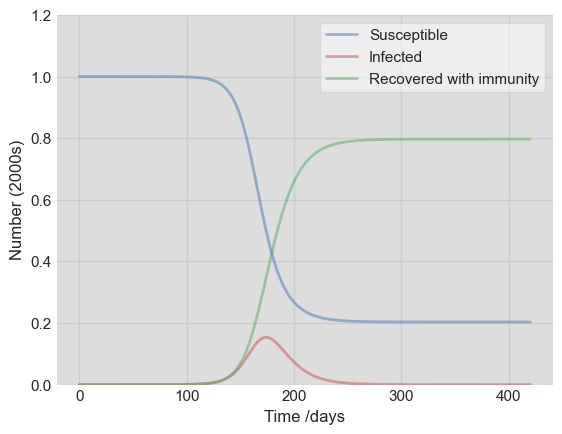

In [141]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 41128771
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0.02
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 420, 420)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/41128771, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/41128771, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/41128771, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (2000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

A scenario with a lower initial infection rate, indicative of a milder outbreak, is presented by the updated code. The SIR model models the transmission of the disease over a long period of 1270 days, starting with an initial infected proportion of 0.000000212. Plotted curves show a longer, slower spread of the epidemic with a smaller peak in the number of afflicted individuals. Recovery and transmission rates are still influenced by the factors beta and gamma. Overall, this shift in input parameters highlights how flexible the model is to various epidemic scenarios and highlights how crucial initial conditions are in determining how the outbreak develops.

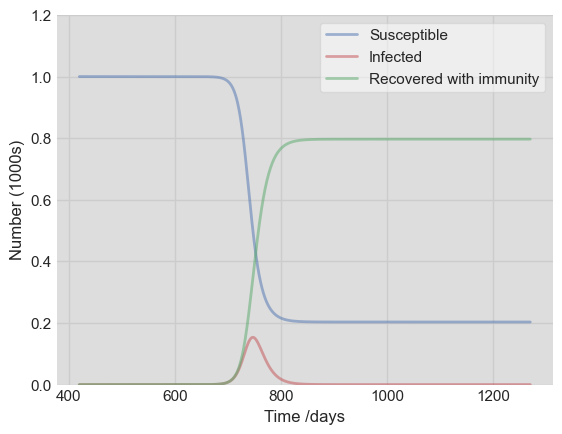

In [142]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 41128771
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 0.000000212, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(420, 1270, 1270)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/41128771, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/41128771, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/41128771, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

A milder outbreak is simulated by the modified algorithm, which runs at an even lower beginning infection rate. The SIR model predicts that the pandemic will spread gradually and steadily over a period of 1270 days, starting with an initial infected proportion of 0.00000007212. A longer period of vulnerability, a smaller peak in infections, and a gradual increase in the recovered population are all depicted by the presented curves. The transmission and recovery rates are still impacted by the selected parameters, beta and gamma. The model's ability to capture various epidemic dynamics is emphasised by this diversity in input parameters, which also highlights the influence of initial conditions on the outbreak's trajectory.


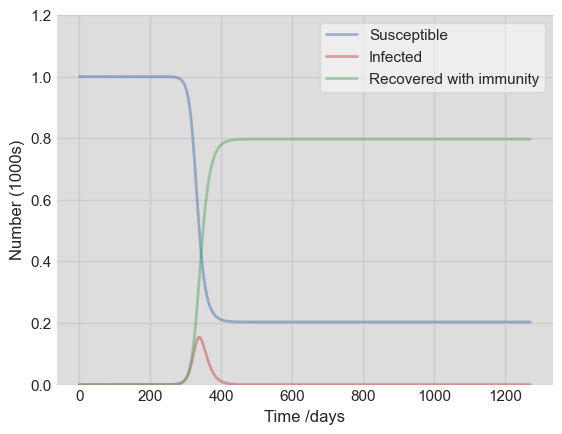

In [143]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 41128771
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 0.00000007212, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 1270, 1270)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/41128771, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/41128771, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/41128771, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

A longer and milder epidemic can be simulated by changing the initial infected proportion (I0) in the SIR model to a lesser number, such as 0.00000007212. This highlights how sensitive the model is to early conditions, demonstrating how the dynamics of an outbreak are greatly impacted by even a little variation in the initial population size of infected individuals. The scenario highlights the need of comprehending the potential diversity in the spread of infectious diseases based on varied levels of early infections and implies that exact estimation of initial conditions is vital for accurate epidemic predictions.

### Task 5:

In [144]:
covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
0       2020-03-30           AF  Afghanistan               106   
1       2020-03-31           AF  Afghanistan               114   
2       2020-04-01           AF  Afghanistan               166   
3       2020-04-02           AF  Afghanistan               192   
4       2020-04-03           AF  Afghanistan               194   
...            ...          ...          ...               ...   
1266    2023-09-17           AF  Afghanistan            225786   
1267    2023-09-18           AF  Afghanistan            225786   
1268    2023-09-19           AF  Afghanistan            225786   
1269    2023-09-20           AF  Afghanistan            225786   
1270    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  Days_since_start  Log_Normalized_cases  
0             0.000003                 0             -5.588840  
1             0.000003                 1             -5.557241  
2             0.000004                 2             -5.394038  
3             0.000005                 3             -5.330845  
4             0.000005                 4             -5.326344  
...                ...               ...                   ...  
1266          0.005490              1266             -2.260449  
1267          0.005490              1267             -2.260449  
1268          0.005490              1268             -2.260449  
1269          0.005490              1269             -2.260449  
1270          0.005490              1270             -2.260449  

[1271 rows x 7 columns]

### Chapter 3

In [145]:
covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
0       2020-03-30           AF  Afghanistan               106   
1       2020-03-31           AF  Afghanistan               114   
2       2020-04-01           AF  Afghanistan               166   
3       2020-04-02           AF  Afghanistan               192   
4       2020-04-03           AF  Afghanistan               194   
...            ...          ...          ...               ...   
1266    2023-09-17           AF  Afghanistan            225786   
1267    2023-09-18           AF  Afghanistan            225786   
1268    2023-09-19           AF  Afghanistan            225786   
1269    2023-09-20           AF  Afghanistan            225786   
1270    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  Days_since_start  Log_Normalized_cases  
0             0.000003                 0             -5.588840  
1             0.000003                 1             -5.557241  
2             0.000004                 2             -5.394038  
3             0.000005                 3             -5.330845  
4             0.000005                 4             -5.326344  
...                ...               ...                   ...  
1266          0.005490              1266             -2.260449  
1267          0.005490              1267             -2.260449  
1268          0.005490              1268             -2.260449  
1269          0.005490              1269             -2.260449  
1270          0.005490              1270             -2.260449  

[1271 rows x 7 columns]

Calculating the value of the reaction rate constant k res-exh for the transition Sres→Sexh which is given as 1/50(after 50 days in the "Resistance" state, people become tired)


In [146]:
# Given information
days_in_resistance = 50

# Calculate the reaction rate constant
k_res_exh = 1 / days_in_resistance

print(f"The value of the reaction rate constant for Sres -> Sexh is: {k_res_exh}")


The value of the reaction rate constant for Sres -> Sexh is: 0.02


If the reaction rate constant for the transition Sexh→Sign is given as 1/100 (after 100 days in the "Exhaustion" state, people return to the initial "Ignorant" state and become sensitive to alarm signals)  

In [147]:
# Given information
days_in_exhaustion = 100

# Calculate the reaction rate constant
k_exh_sign = 1 / days_in_exhaustion

print(f"The value of the reaction rate constant for Sexh -> Sign is: {k_exh_sign}")

The value of the reaction rate constant for Sexh -> Sign is: 0.01


If the reaction rate constant for the transition Sign+I→Sres+I is given as 1, and you assume that the transition rate is the product kSignI, where kSignI is the characteristic time for the modification of behavior, then you can calculate kSignI as follows:

In [148]:
k_sign_i = 1

print(f"The value of the characteristic time constant k_SignI is: {k_sign_i}")


The value of the characteristic time constant k_SignI is: 1


1. Sres → Sexh:
dSres/dt = −kres_exh⋅Sres
​where kres_exh = 1/50 is the reaction rate constant for the transition from the "Resistance" state to the "Exhaustion" state.

2. Sexh → Sign:
dSexh/dt = −kexh_sign⋅Sexh
where kexh_sign = 1/100 is the reaction rate constant for the transition from the "Exhaustion" state to the "Ignorant" state.

3. Sign + I → Sres + I:
dSign/dt = −ksign_i⋅Sign
where ksign_i = 1 is the reaction rate constant for the transition from the "Ignorant" state to the "Resistance" state when influenced by alarm signals.
These equations describe the rate of change of each population (Sres, Sexh, Sign) with respect to time. The negative sign indicates a decrease in the population due to the transitions described.

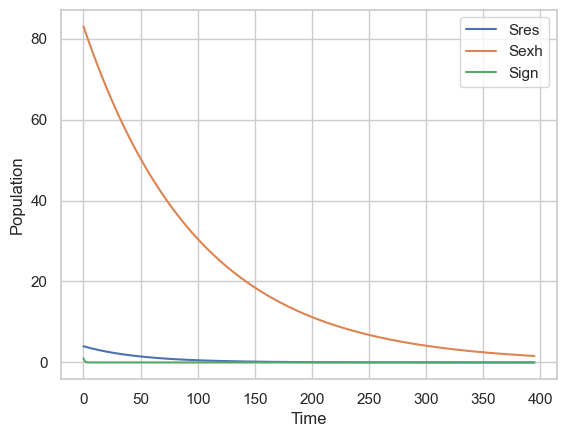

In [149]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the kinetic equations
def model(y, t):
    Sres, Sexh, Sign = y
    dSresdt = -k_res_exh * Sres
    dSexhdt = -k_exh_sign * Sexh
    dSigndt = -k_sign_i * Sign
    return [dSresdt, dSexhdt, dSigndt]

# Set initial conditions and time points
initial_conditions = [4, 83, 1]  # Initial values of Sres, Sexh, Sign
t = np.linspace(0, 395, 396)  # Time points from 4 to 395

# Set the reaction rate constants
k_res_exh = 1 / 50
k_exh_sign = 1 / 100
k_sign_i = 1

# Solve the system of ODEs
solution = odeint(model, initial_conditions, t)

# Extract results
Sres_result, Sexh_result, Sign_result = solution.T

# Plot the results
plt.plot(t, Sres_result, label='Sres')
plt.plot(t, Sexh_result, label='Sexh')
plt.plot(t, Sign_result, label='Sign')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


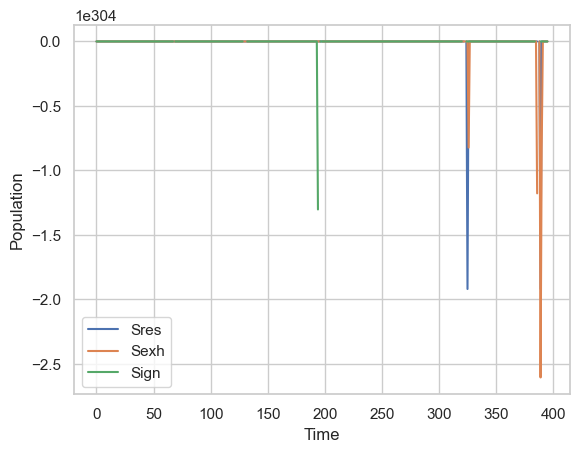

In [150]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the kinetic equations with parameters
def model(y, t, r, c, b, a, MSE):
    Sres, Sexh, Sign = y
    dSresdt = r * Sres * (1 - c * Sres - b * Sexh - a * Sign)
    dSexhdt = b * Sexh * (1 - MSE * Sign - r * Sres)
    dSigndt = a * Sign * (1 - b * Sexh - MSE * Sres)
    return [dSresdt, dSexhdt, dSigndt]

# Set initial conditions and time points
initial_conditions = [4, 83, 1]  # Initial values of Sres, Sexh, Sign
t = np.linspace(0, 395, 396)  # Time points from 4 to 395

# Set the parameters based on the provided table
r = 0.0639
c = -12.1261
b = 0.1
a = 0.1639
MSE = 3.62e-01  # Assuming this value corresponds to the MSE parameter

# Solve the system of ODEs
solution = odeint(model, initial_conditions, t, args=(r, c, b, a, MSE))

# Extract results
Sres_result, Sexh_result, Sign_result = solution.T

# Plot the results
plt.plot(t, Sres_result, label='Sres')
plt.plot(t, Sexh_result, label='Sexh')
plt.plot(t, Sign_result, label='Sign')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

##Draft 3

###Plotting Data Countrywise

In [151]:
import pandas as pd
# importing data 
covid_19_Data = pd.read_csv("WHO-COVID-19-global-data.csv")
covid_19_Data

Date_reported Country_code      Country WHO_region  New_cases  \
0         1/3/2020           AF  Afghanistan       EMRO          0   
1         1/4/2020           AF  Afghanistan       EMRO          0   
2         1/5/2020           AF  Afghanistan       EMRO          0   
3         1/6/2020           AF  Afghanistan       EMRO          0   
4         1/7/2020           AF  Afghanistan       EMRO          0   
...            ...          ...          ...        ...        ...   
4069     9/17/2023           IN        India      SEARO         55   
4070     9/18/2023           IN        India      SEARO          0   
4071     9/19/2023           IN        India      SEARO          0   
4072     9/20/2023           IN        India      SEARO          0   
4073     9/21/2023           IN        India      SEARO          0   

      Cumulative_cases  New_deaths  Cumulative_deaths  
0                    0           0                  0  
1                    0           0                  0  
2                    0           0                  0  
3                    0           0                  0  
4                    0           0                  0  
...                ...         ...                ...  
4069          44998162           1             532030  
4070          44998162           0             532030  
4071          44998162           0             532030  
4072          44998162           0             532030  
4073          44998162           0             532030  

[4074 rows x 8 columns]

# cleaning Data

In [152]:
# dropping columns which we dont need in our analysis also removing empty rows
covid_19_Data.drop(["Country_code", "WHO_region","New_cases","New_deaths","Cumulative_deaths"], axis = 1, inplace = True)
covid_19_Data.dropna(inplace=True)
covid_19_Data

Date_reported      Country  Cumulative_cases
0         1/3/2020  Afghanistan                 0
1         1/4/2020  Afghanistan                 0
2         1/5/2020  Afghanistan                 0
3         1/6/2020  Afghanistan                 0
4         1/7/2020  Afghanistan                 0
...            ...          ...               ...
4069     9/17/2023        India          44998162
4070     9/18/2023        India          44998162
4071     9/19/2023        India          44998162
4072     9/20/2023        India          44998162
4073     9/21/2023        India          44998162

[4074 rows x 3 columns]

In [153]:
covid_19_Data.dtypes

Date_reported       object
Country             object
Cumulative_cases     int64
dtype: object

In [154]:
# changing date Data type
covid_19_Data['Date_reported'] = pd.to_datetime(covid_19_Data['Date_reported'])
covid_19_Data

Date_reported      Country  Cumulative_cases
0       2020-01-03  Afghanistan                 0
1       2020-01-04  Afghanistan                 0
2       2020-01-05  Afghanistan                 0
3       2020-01-06  Afghanistan                 0
4       2020-01-07  Afghanistan                 0
...            ...          ...               ...
4069    2023-09-17        India          44998162
4070    2023-09-18        India          44998162
4071    2023-09-19        India          44998162
4072    2023-09-20        India          44998162
4073    2023-09-21        India          44998162

[4074 rows x 3 columns]

In [155]:
# Filtering Data

In [156]:
# filtering out Pakistan Data
Afghanistan_Data = covid_19_Data[covid_19_Data['Country'] == "Afghanistan"].reset_index(drop=True)
Afghanistan_Data                       

Date_reported      Country  Cumulative_cases
0       2020-01-03  Afghanistan                 0
1       2020-01-04  Afghanistan                 0
2       2020-01-05  Afghanistan                 0
3       2020-01-06  Afghanistan                 0
4       2020-01-07  Afghanistan                 0
...            ...          ...               ...
1353    2023-09-17  Afghanistan            225786
1354    2023-09-18  Afghanistan            225786
1355    2023-09-19  Afghanistan            225786
1356    2023-09-20  Afghanistan            225786
1357    2023-09-21  Afghanistan            225786

[1358 rows x 3 columns]

In [157]:
# dropping useless rows in start of dataset
Afghanistan_Data = Afghanistan_Data.drop(Afghanistan_Data.index[0:87]).reset_index(drop=True)
Afghanistan_Data

Date_reported      Country  Cumulative_cases
0       2020-03-30  Afghanistan               106
1       2020-03-31  Afghanistan               114
2       2020-04-01  Afghanistan               166
3       2020-04-02  Afghanistan               192
4       2020-04-03  Afghanistan               194
...            ...          ...               ...
1266    2023-09-17  Afghanistan            225786
1267    2023-09-18  Afghanistan            225786
1268    2023-09-19  Afghanistan            225786
1269    2023-09-20  Afghanistan            225786
1270    2023-09-21  Afghanistan            225786

[1271 rows x 3 columns]

In [158]:
# filtering out italy Data
China_Data = covid_19_Data[covid_19_Data['Country'] == "China"].reset_index(drop=True)
China_Data

Date_reported Country  Cumulative_cases
0       2020-01-03   China                 0
1       2020-01-04   China                 1
2       2020-01-05   China                 1
3       2020-01-06   China                 4
4       2020-01-07   China                 4
...            ...     ...               ...
1353    2023-09-17   China          99309232
1354    2023-09-18   China          99309232
1355    2023-09-19   China          99309232
1356    2023-09-20   China          99309232
1357    2023-09-21   China          99309232

[1358 rows x 3 columns]

In [159]:
# dropping useless rows in start of dataset
China_Data = China_Data.drop(China_Data.index[0:16]).reset_index(drop=True)
China_Data

Date_reported Country  Cumulative_cases
0       2020-01-19   China               125
1       2020-01-20   China               202
2       2020-01-21   China               295
3       2020-01-22   China               442
4       2020-01-23   China               574
...            ...     ...               ...
1337    2023-09-17   China          99309232
1338    2023-09-18   China          99309232
1339    2023-09-19   China          99309232
1340    2023-09-20   China          99309232
1341    2023-09-21   China          99309232

[1342 rows x 3 columns]

In [160]:
# filtering out republic of korea data
India_Data = covid_19_Data[covid_19_Data['Country'] == "India"].reset_index(drop=True)
India_Data

Date_reported Country  Cumulative_cases
0       2020-01-03   India                 0
1       2020-01-04   India                 0
2       2020-01-05   India                 0
3       2020-01-06   India                 0
4       2020-01-07   India                 0
...            ...     ...               ...
1353    2023-09-17   India          44998162
1354    2023-09-18   India          44998162
1355    2023-09-19   India          44998162
1356    2023-09-20   India          44998162
1357    2023-09-21   India          44998162

[1358 rows x 3 columns]

In [161]:
# dropping useless rows in start of dataset
India_Data = India_Data.drop(India_Data.index[0:71]).reset_index(drop=True)
India_Data

Date_reported Country  Cumulative_cases
0       2020-03-14   India                84
1       2020-03-15   India               107
2       2020-03-16   India               114
3       2020-03-17   India               137
4       2020-03-18   India               151
...            ...     ...               ...
1282    2023-09-17   India          44998162
1283    2023-09-18   India          44998162
1284    2023-09-19   India          44998162
1285    2023-09-20   India          44998162
1286    2023-09-21   India          44998162

[1287 rows x 3 columns]

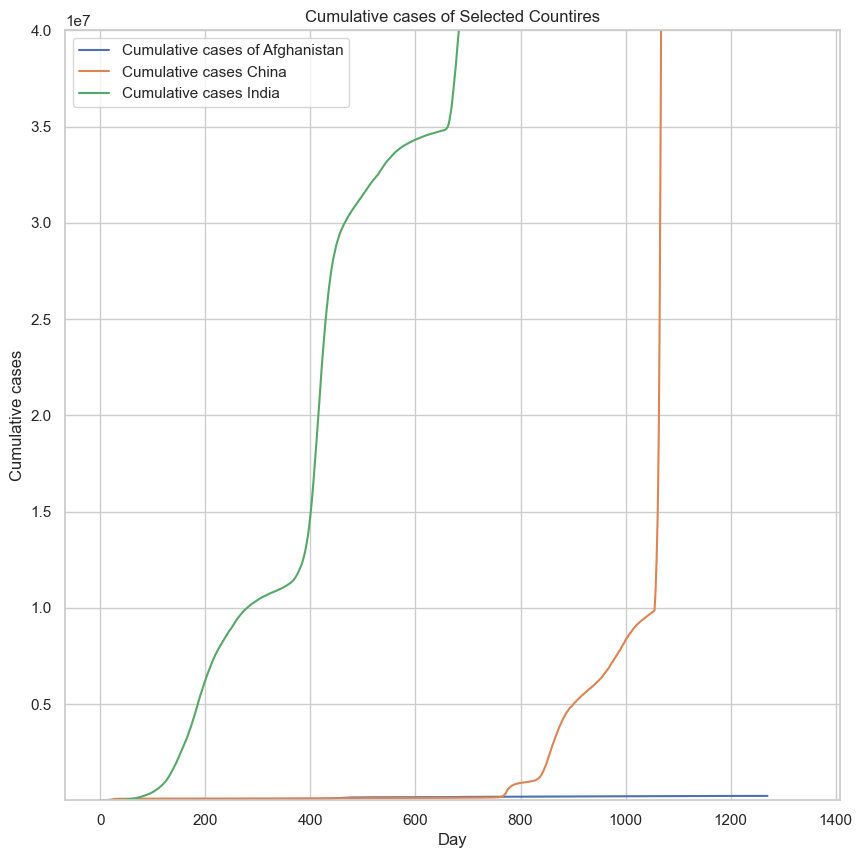

In [162]:

import matplotlib.pyplot as plt

# Plotting two columns from the filtered data
plt.figure(figsize=(10, 10))

plt.plot(Afghanistan_Data['Cumulative_cases'], label='Cumulative cases of Afghanistan')
plt.plot(China_Data['Cumulative_cases'], label='Cumulative cases China')
plt.plot(India_Data['Cumulative_cases'], label='Cumulative cases India')
plt.ylim(1,40000000)
plt.xlabel('Day')
plt.ylabel('Cumulative cases')
plt.title('Cumulative cases of Selected Countires')
plt.legend()
plt.grid(True)
plt.show()


In [163]:
# Adding population in Data frame

In [164]:
pop_df = pd.DataFrame([['Afghanistan',41128771],['China', 1425887337],['India',1417173173.]],columns=['Country','population'])
pop_df

Country    population
0  Afghanistan  4.112877e+07
1        China  1.425887e+09
2        India  1.417173e+09

##Plotting Normalised Data

In [165]:
covid_data_afg

Date_reported Country_code      Country  Cumulative_cases  \
0       2020-03-30           AF  Afghanistan               106   
1       2020-03-31           AF  Afghanistan               114   
2       2020-04-01           AF  Afghanistan               166   
3       2020-04-02           AF  Afghanistan               192   
4       2020-04-03           AF  Afghanistan               194   
...            ...          ...          ...               ...   
1266    2023-09-17           AF  Afghanistan            225786   
1267    2023-09-18           AF  Afghanistan            225786   
1268    2023-09-19           AF  Afghanistan            225786   
1269    2023-09-20           AF  Afghanistan            225786   
1270    2023-09-21           AF  Afghanistan            225786   

      Normalized_cases  Days_since_start  Log_Normalized_cases  
0             0.000003                 0             -5.588840  
1             0.000003                 1             -5.557241  
2             0.000004                 2             -5.394038  
3             0.000005                 3             -5.330845  
4             0.000005                 4             -5.326344  
...                ...               ...                   ...  
1266          0.005490              1266             -2.260449  
1267          0.005490              1267             -2.260449  
1268          0.005490              1268             -2.260449  
1269          0.005490              1269             -2.260449  
1270          0.005490              1270             -2.260449  

[1271 rows x 7 columns]

In [166]:
# merging population data frame with covid data
norm_data = covid_19_Data.merge(pop_df,on='Country',how='inner')
# normalizing Cumulative_cases
norm_data['norm_data'] = norm_data['Cumulative_cases']/norm_data['population']

covid_19_Data

Date_reported      Country  Cumulative_cases
0       2020-01-03  Afghanistan                 0
1       2020-01-04  Afghanistan                 0
2       2020-01-05  Afghanistan                 0
3       2020-01-06  Afghanistan                 0
4       2020-01-07  Afghanistan                 0
...            ...          ...               ...
4069    2023-09-17        India          44998162
4070    2023-09-18        India          44998162
4071    2023-09-19        India          44998162
4072    2023-09-20        India          44998162
4073    2023-09-21        India          44998162

[4074 rows x 3 columns]

# Filtering Normalized Data

In [167]:
# Filtering Pakistan normalized data
norm_Afghanistan_Data = norm_data[norm_data['Country'] == "Afghanistan"]
#Dropping useless Data
norm_Afghanistan_Data = norm_Afghanistan_Data.drop(norm_Afghanistan_Data.index[0:87]).reset_index(drop=True)
# adding index col
norm_Afghanistan_Data['index']=norm_Afghanistan_Data.index+1
norm_Afghanistan_Data

Date_reported      Country  Cumulative_cases  population  norm_data  \
0       2020-03-30  Afghanistan               106  41128771.0   0.000003   
1       2020-03-31  Afghanistan               114  41128771.0   0.000003   
2       2020-04-01  Afghanistan               166  41128771.0   0.000004   
3       2020-04-02  Afghanistan               192  41128771.0   0.000005   
4       2020-04-03  Afghanistan               194  41128771.0   0.000005   
...            ...          ...               ...         ...        ...   
1266    2023-09-17  Afghanistan            225786  41128771.0   0.005490   
1267    2023-09-18  Afghanistan            225786  41128771.0   0.005490   
1268    2023-09-19  Afghanistan            225786  41128771.0   0.005490   
1269    2023-09-20  Afghanistan            225786  41128771.0   0.005490   
1270    2023-09-21  Afghanistan            225786  41128771.0   0.005490   

      index  
0         1  
1         2  
2         3  
3         4  
4         5  
...     ...  
1266   1267  
1267   1268  
1268   1269  
1269   1270  
1270   1271  

[1271 rows x 6 columns]

In [168]:
# Filtering Brazil normalized data
norm_China_Data = norm_data[norm_data['Country'] == "China"].reset_index(drop=True)
#Dropping useless Data
norm_China_Data = norm_China_Data.drop(norm_China_Data.index[0:16]).reset_index(drop=True)
# adding index col
norm_China_Data['index']=norm_China_Data.index+1
norm_China_Data

Date_reported Country  Cumulative_cases    population     norm_data  \
0       2020-01-19   China               125  1.425887e+09  8.766471e-08   
1       2020-01-20   China               202  1.425887e+09  1.416662e-07   
2       2020-01-21   China               295  1.425887e+09  2.068887e-07   
3       2020-01-22   China               442  1.425887e+09  3.099824e-07   
4       2020-01-23   China               574  1.425887e+09  4.025563e-07   
...            ...     ...               ...           ...           ...   
1337    2023-09-17   China          99309232  1.425887e+09  6.964732e-02   
1338    2023-09-18   China          99309232  1.425887e+09  6.964732e-02   
1339    2023-09-19   China          99309232  1.425887e+09  6.964732e-02   
1340    2023-09-20   China          99309232  1.425887e+09  6.964732e-02   
1341    2023-09-21   China          99309232  1.425887e+09  6.964732e-02   

      index  
0         1  
1         2  
2         3  
3         4  
4         5  
...     ...  
1337   1338  
1338   1339  
1339   1340  
1340   1341  
1341   1342  

[1342 rows x 6 columns]

In [169]:
# Filtering Brazil normalized data
norm_India_Data = norm_data[norm_data['Country'] == "India"].reset_index(drop=True)
#Dropping useless Data
norm_India_Data = norm_India_Data.drop(norm_India_Data.index[0:72]).reset_index(drop=True)
# adding index col
norm_India_Data['index']=norm_India_Data.index+1
norm_India_Data

Date_reported Country  Cumulative_cases    population     norm_data  \
0       2020-03-15   India               107  1.417173e+09  7.550242e-08   
1       2020-03-16   India               114  1.417173e+09  8.044183e-08   
2       2020-03-17   India               137  1.417173e+09  9.667132e-08   
3       2020-03-18   India               151  1.417173e+09  1.065501e-07   
4       2020-03-19   India               173  1.417173e+09  1.220740e-07   
...            ...     ...               ...           ...           ...   
1281    2023-09-17   India          44998162  1.417173e+09  3.175206e-02   
1282    2023-09-18   India          44998162  1.417173e+09  3.175206e-02   
1283    2023-09-19   India          44998162  1.417173e+09  3.175206e-02   
1284    2023-09-20   India          44998162  1.417173e+09  3.175206e-02   
1285    2023-09-21   India          44998162  1.417173e+09  3.175206e-02   

      index  
0         1  
1         2  
2         3  
3         4  
4         5  
...     ...  
1281   1282  
1282   1283  
1283   1284  
1284   1285  
1285   1286  

[1286 rows x 6 columns]

# Plotting Normalized Data Country wise 

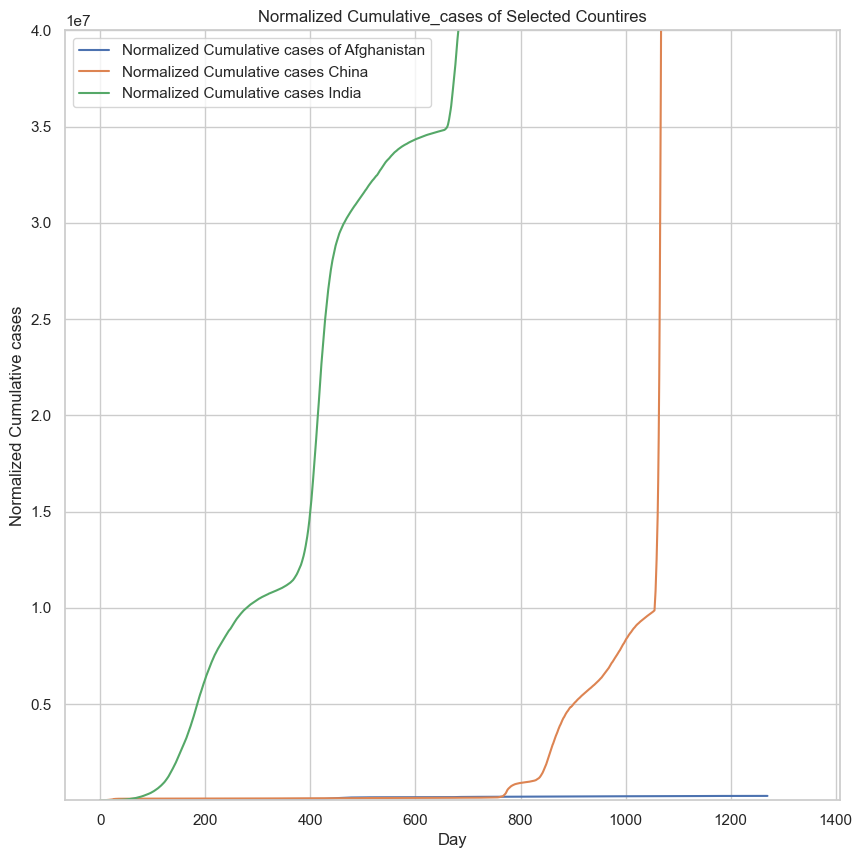

In [170]:

import matplotlib.pyplot as plt

# Plotting two columns from the filtered data
plt.figure(figsize=(10, 10))

plt.plot(norm_Afghanistan_Data['Cumulative_cases'], label='Normalized Cumulative cases of Afghanistan')
plt.plot(norm_China_Data['Cumulative_cases'], label='Normalized Cumulative cases China')
plt.plot(norm_India_Data['Cumulative_cases'], label='Normalized Cumulative cases India')
plt.ylim(1,40000000)
plt.xlabel('Day')
plt.ylabel('Normalized Cumulative cases')
plt.title('Normalized Cumulative_cases of Selected Countires')
plt.legend()
plt.grid(True)
plt.show()


# Spliting normalized data into waves for every country

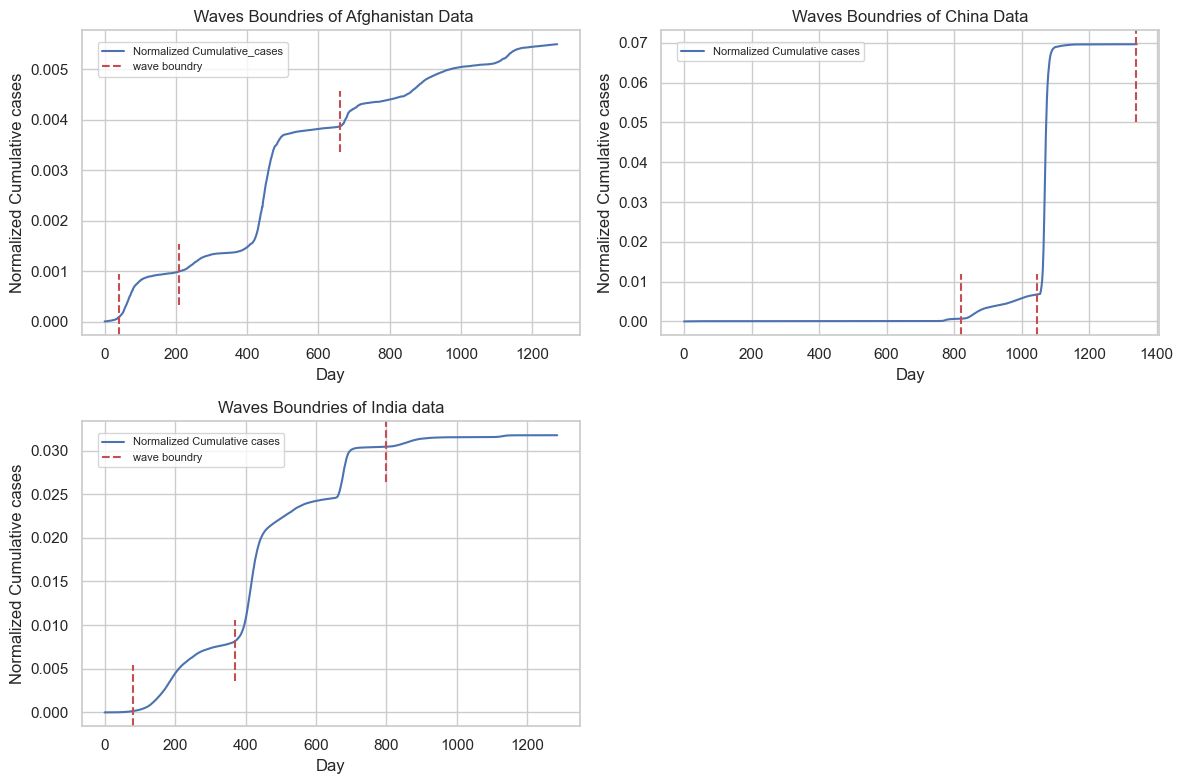

In [171]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plotting Pakistan data
axes[0, 0].plot(norm_Afghanistan_Data['norm_data'], label='Normalized Cumulative_cases')
axes[0, 0].axvline(x=40, color='r', linestyle='--', label='wave boundry',ymax=0.2, ymin=0)
axes[0, 0].axvline(x=210, color='r', linestyle='--',ymax=0.3, ymin=0.1)
axes[0, 0].axvline(x=660, color='r', linestyle='--',ymax=0.8, ymin=0.6)
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('Normalized Cumulative cases')
axes[0, 0].set_title(' Waves Boundries of Afghanistan Data')
legend_rok = axes[0, 0].legend(fontsize=8, loc='upper left', bbox_to_anchor=(0.02, 0.98))
axes[0, 0].grid(True)


# Plotting Brazil data
axes[0, 1].plot(norm_China_Data['norm_data'], label='Normalized Cumulative cases')
#axes[0, 1].axvline(x=100, color='r', linestyle='--', label='wave boundry',ymax=0.2, ymin=0)
axes[0, 1].axvline(x=820, color='r', linestyle='--',ymax=0.2, ymin=0.001)
axes[0, 1].axvline(x=1045, color='r', linestyle='--',ymax=0.2, ymin=0.001)
axes[0, 1].axvline(x=1340, color='r', linestyle='--',ymax=1.0, ymin=0.7)
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Normalized Cumulative cases')
axes[0, 1].set_title('Waves Boundries of China Data')
legend_rok = axes[0, 1].legend(fontsize=8, loc='upper left', bbox_to_anchor=(0.02, 0.98))
axes[0, 1].grid(True)

# Plotting Russian Federatio data
axes[1, 0].plot(norm_India_Data['norm_data'], label='Normalized Cumulative cases')
axes[1, 0].axvline(x=80, color='r', linestyle='--', label='wave boundry',ymax=0.2, ymin=0)
axes[1, 0].axvline(x=370, color='r', linestyle='--',ymax=0.35, ymin=0.15)
axes[1, 0].axvline(x=800, color='r', linestyle='--',ymax=1.0, ymin=0.8)
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Normalized Cumulative cases')
axes[1, 0].set_title('Waves Boundries of India data')
legend_rok = axes[1, 0].legend(fontsize=8, loc='upper left', bbox_to_anchor=(0.02, 0.98))
axes[1, 0].grid(True)


axes[1, 1].axis('off')

plt.tight_layout()

plt.show()

# SPLITTING DATA FOR 3 COUNTRIES


In [172]:
Afghanistan_wave = norm_Afghanistan_Data[40:659+1]
Afghanistan_wave

Date_reported      Country  Cumulative_cases  population  norm_data  index
40     2020-05-09  Afghanistan              3563  41128771.0   0.000087     41
41     2020-05-10  Afghanistan              3563  41128771.0   0.000087     42
42     2020-05-11  Afghanistan              4041  41128771.0   0.000098     43
43     2020-05-12  Afghanistan              4402  41128771.0   0.000107     44
44     2020-05-13  Afghanistan              4664  41128771.0   0.000113     45
..            ...          ...               ...         ...        ...    ...
655    2022-01-14  Afghanistan            158602  41128771.0   0.003856    656
656    2022-01-15  Afghanistan            158639  41128771.0   0.003857    657
657    2022-01-16  Afghanistan            158678  41128771.0   0.003858    658
658    2022-01-17  Afghanistan            158737  41128771.0   0.003860    659
659    2022-01-18  Afghanistan            158826  41128771.0   0.003862    660

[620 rows x 6 columns]

In [173]:
print(1-Afghanistan_wave['norm_data'][40])
print(1-Afghanistan_wave['norm_data'][130])

0.9999133696457888
0.9991029150858897


In [174]:
China_wave = norm_China_Data[820:1339+1]
China_wave

Date_reported Country  Cumulative_cases    population  norm_data  index
820     2022-04-18   China            979966  1.425887e+09   0.000687    821
821     2022-04-19   China            984769  1.425887e+09   0.000691    822
822     2022-04-20   China            990420  1.425887e+09   0.000695    823
823     2022-04-21   China            995928  1.425887e+09   0.000698    824
824     2022-04-22   China           1003057  1.425887e+09   0.000703    825
...            ...     ...               ...           ...        ...    ...
1335    2023-09-15   China          99309232  1.425887e+09   0.069647   1336
1336    2023-09-16   China          99309232  1.425887e+09   0.069647   1337
1337    2023-09-17   China          99309232  1.425887e+09   0.069647   1338
1338    2023-09-18   China          99309232  1.425887e+09   0.069647   1339
1339    2023-09-19   China          99309232  1.425887e+09   0.069647   1340

[520 rows x 6 columns]

In [175]:
print(1-China_wave['norm_data'][820])
print(1-China_wave['norm_data'][1045])

0.9993127325178006
0.9932371851900386


In [176]:
India_wave = norm_India_Data[80:799+1]
India_wave

Date_reported Country  Cumulative_cases    population  norm_data  index
80     2020-06-03   India            207615  1.417173e+09   0.000146     81
81     2020-06-04   India            216919  1.417173e+09   0.000153     82
82     2020-06-05   India            226770  1.417173e+09   0.000160     83
83     2020-06-06   India            236657  1.417173e+09   0.000167     84
84     2020-06-07   India            246628  1.417173e+09   0.000174     85
..            ...     ...               ...           ...        ...    ...
795    2022-05-19   India          43129563  1.417173e+09   0.030434    796
796    2022-05-20   India          43131822  1.417173e+09   0.030435    797
797    2022-05-21   India          43134145  1.417173e+09   0.030437    798
798    2022-05-22   India          43136371  1.417173e+09   0.030438    799
799    2022-05-23   India          43138393  1.417173e+09   0.030440    800

[720 rows x 6 columns]

In [177]:
print(1-India_wave['norm_data'][80])
print(1-India_wave['norm_data'][210])

0.9998535006137884
0.995022622404665


# taking log of Data wave wise

     Taking log of Afghanistan Data

In [178]:
import numpy as np
Afghanistan_wave['logrithm'] = np.log(Afghanistan_wave['norm_data'])
Afghanistan_wave
    

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/848373714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Afghanistan_wave['logrithm'] = np.log(Afghanistan_wave['norm_data'])


Date_reported      Country  Cumulative_cases  population  norm_data  \
40     2020-05-09  Afghanistan              3563  41128771.0   0.000087   
41     2020-05-10  Afghanistan              3563  41128771.0   0.000087   
42     2020-05-11  Afghanistan              4041  41128771.0   0.000098   
43     2020-05-12  Afghanistan              4402  41128771.0   0.000107   
44     2020-05-13  Afghanistan              4664  41128771.0   0.000113   
..            ...          ...               ...         ...        ...   
655    2022-01-14  Afghanistan            158602  41128771.0   0.003856   
656    2022-01-15  Afghanistan            158639  41128771.0   0.003857   
657    2022-01-16  Afghanistan            158678  41128771.0   0.003858   
658    2022-01-17  Afghanistan            158737  41128771.0   0.003860   
659    2022-01-18  Afghanistan            158826  41128771.0   0.003862   

     index  logrithm  
40      41 -9.353860  
41      42 -9.353860  
42      43 -9.227971  
43      44 -9.142404  
44      45 -9.084590  
..     ...       ...  
655    656 -5.558065  
656    657 -5.557832  
657    658 -5.557586  
658    659 -5.557214  
659    660 -5.556654  

[620 rows x 7 columns]

 Taking log of China Data


In [179]:
China_wave['logrithm'] = np.log(China_wave['norm_data'])
China_wave

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/3398218266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  China_wave['logrithm'] = np.log(China_wave['norm_data'])


Date_reported Country  Cumulative_cases    population  norm_data  index  \
820     2022-04-18   China            979966  1.425887e+09   0.000687    821   
821     2022-04-19   China            984769  1.425887e+09   0.000691    822   
822     2022-04-20   China            990420  1.425887e+09   0.000695    823   
823     2022-04-21   China            995928  1.425887e+09   0.000698    824   
824     2022-04-22   China           1003057  1.425887e+09   0.000703    825   
...            ...     ...               ...           ...        ...    ...   
1335    2023-09-15   China          99309232  1.425887e+09   0.069647   1336   
1336    2023-09-16   China          99309232  1.425887e+09   0.069647   1337   
1337    2023-09-17   China          99309232  1.425887e+09   0.069647   1338   
1338    2023-09-18   China          99309232  1.425887e+09   0.069647   1339   
1339    2023-09-19   China          99309232  1.425887e+09   0.069647   1340   

      logrithm  
820  -7.282787  
821  -7.277898  
822  -7.272176  
823  -7.266630  
824  -7.259497  
...        ...  
1335 -2.664311  
1336 -2.664311  
1337 -2.664311  
1338 -2.664311  
1339 -2.664311  

[520 rows x 7 columns]

 Taking log of India Data

In [180]:
India_wave['logrithm'] = np.log(India_wave['norm_data'])
India_wave

/var/folders/w8/63c5j3sj4k17tv89_t_4vj1w0000gn/T/ipykernel_2186/1296339407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India_wave['logrithm'] = np.log(India_wave['norm_data'])


Date_reported Country  Cumulative_cases    population  norm_data  index  \
80     2020-06-03   India            207615  1.417173e+09   0.000146     81   
81     2020-06-04   India            216919  1.417173e+09   0.000153     82   
82     2020-06-05   India            226770  1.417173e+09   0.000160     83   
83     2020-06-06   India            236657  1.417173e+09   0.000167     84   
84     2020-06-07   India            246628  1.417173e+09   0.000174     85   
..            ...     ...               ...           ...        ...    ...   
795    2022-05-19   India          43129563  1.417173e+09   0.030434    796   
796    2022-05-20   India          43131822  1.417173e+09   0.030435    797   
797    2022-05-21   India          43134145  1.417173e+09   0.030437    798   
798    2022-05-22   India          43136371  1.417173e+09   0.030438    799   
799    2022-05-23   India          43138393  1.417173e+09   0.030440    800   

     logrithm  
80  -8.828489  
81  -8.784651  
82  -8.740238  
83  -8.697563  
84  -8.656294  
..        ...  
795 -3.492211  
796 -3.492158  
797 -3.492105  
798 -3.492053  
799 -3.492006  

[720 rows x 7 columns]

# plotting log of every wave for Pakistan

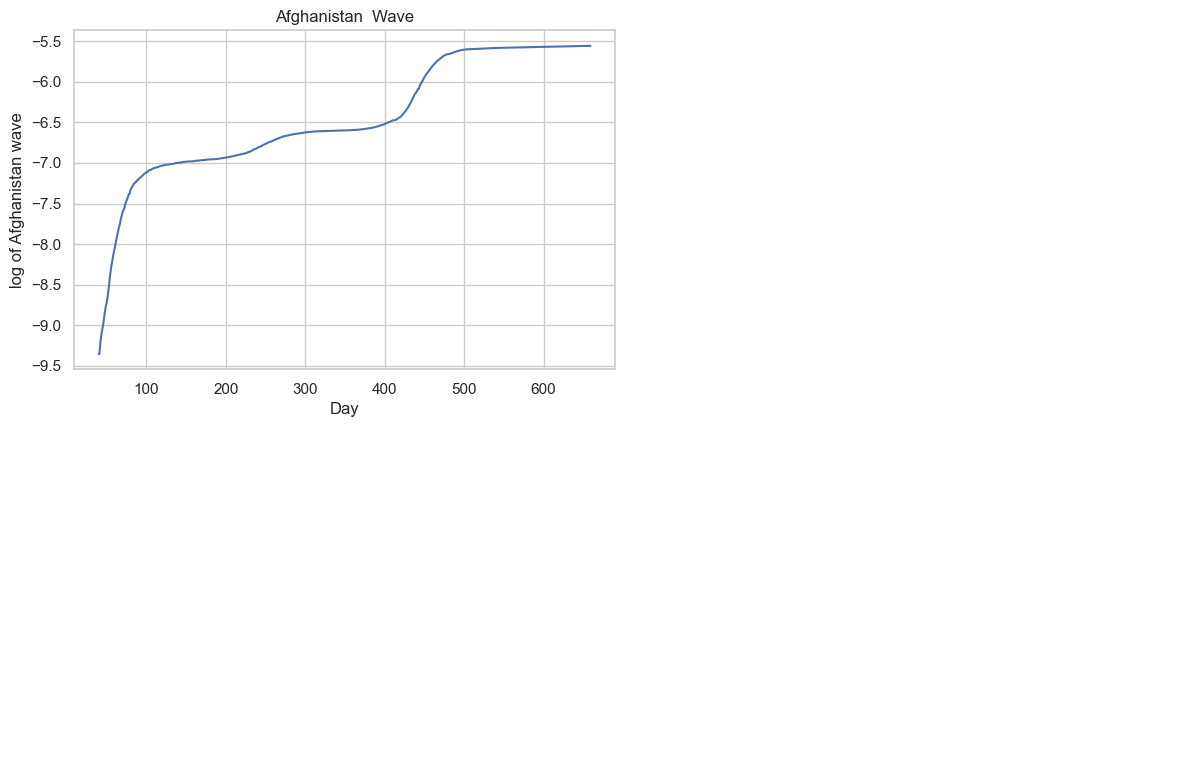

In [181]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plotting logrithm for wave
axes[0, 0].plot(Afghanistan_wave['logrithm'], label='Logrithm of Afghanistan wave')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('log of Afghanistan wave')
axes[0, 0].set_title('Afghanistan  Wave')
axes[0, 0].grid(True)

# Plotting logrithm for 2nd wave
axes[0,1].axis('off')

axes[1, 0].axis('off')

axes[1, 1].axis('off')
plt.tight_layout()

plt.show()

# plotting log of every wave for China

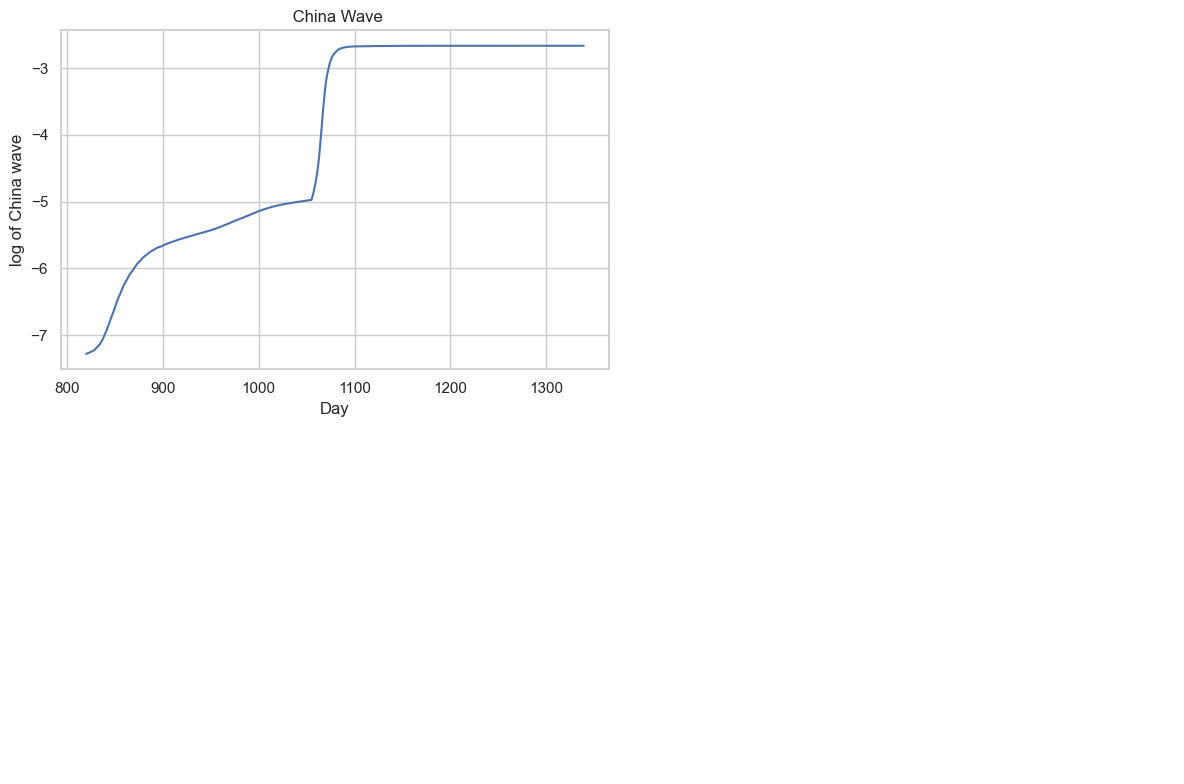

In [182]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plotting logrithm for wave
axes[0, 0].plot(China_wave['logrithm'], label='Logrithm of China wave')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('log of China wave')
axes[0, 0].set_title(' China Wave')
axes[0, 0].grid(True)

# Plotting logrithm for 2nd wave
axes[0,1].axis('off')

axes[1, 0].axis('off')

axes[1, 1].axis('off')
plt.tight_layout()

plt.show()



# plotting log of every wave for India

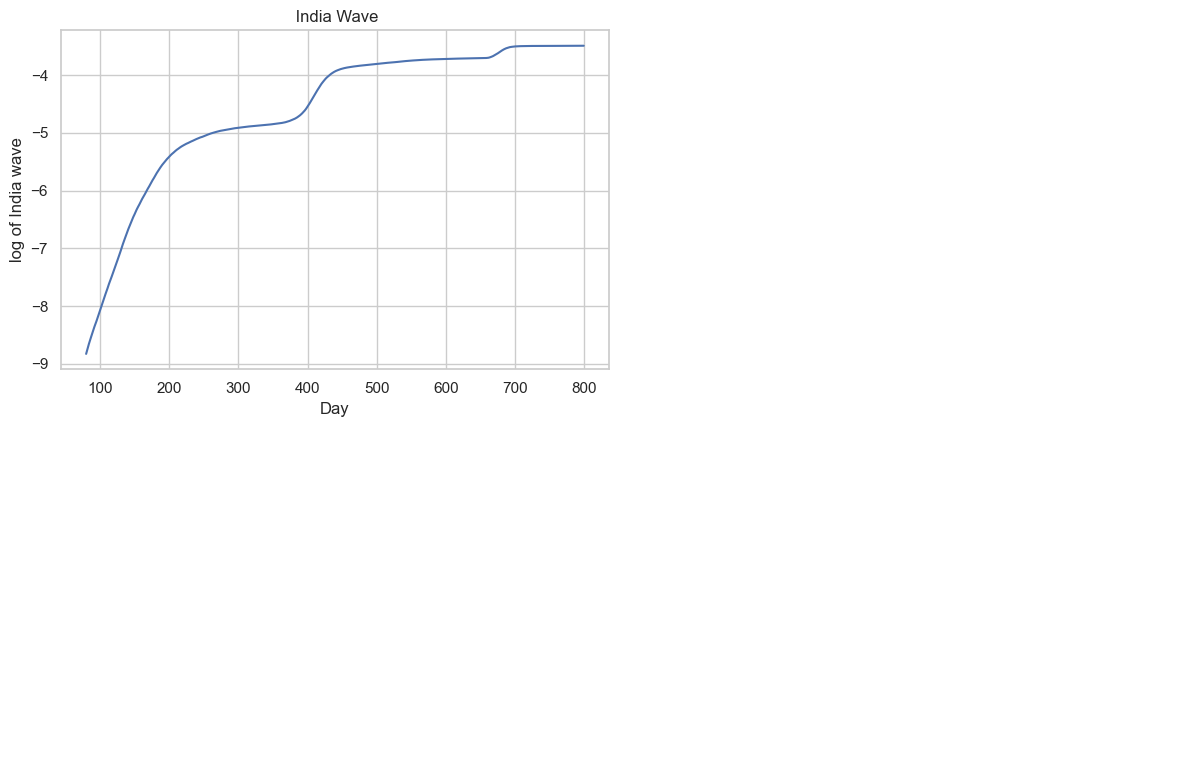

In [183]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plotting logrithm for wave
axes[0, 0].plot(India_wave['logrithm'], label='Logrithm of India wave')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('log of India wave')
axes[0, 0].set_title(' India Wave')
axes[0, 0].grid(True)

# Plotting logrithm for 2nd wave
axes[0,1].axis('off')

axes[1, 0].axis('off')

axes[1, 1].axis('off')
plt.tight_layout()

plt.show()



# plotting log of every wave for Pakistan

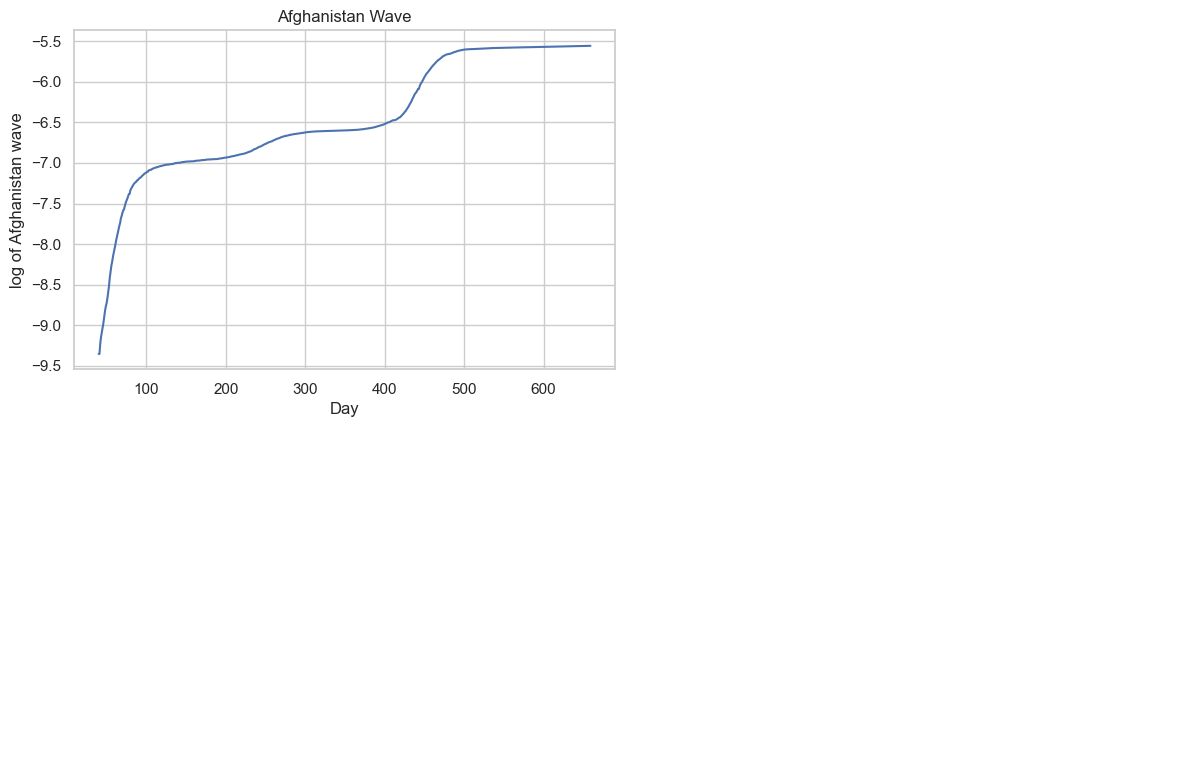

In [184]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plotting logrithm for wave
axes[0, 0].plot(Afghanistan_wave['logrithm'], label='Logrithm of Afghanistan wave')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('log of Afghanistan wave')
axes[0, 0].set_title('Afghanistan Wave')
axes[0, 0].grid(True)

# Plotting logrithm for 2nd wave
axes[0,1].axis('off')

axes[1, 0].axis('off')

axes[1, 1].axis('off')
plt.tight_layout()

plt.show()

# plotting log of every wave for Brazil

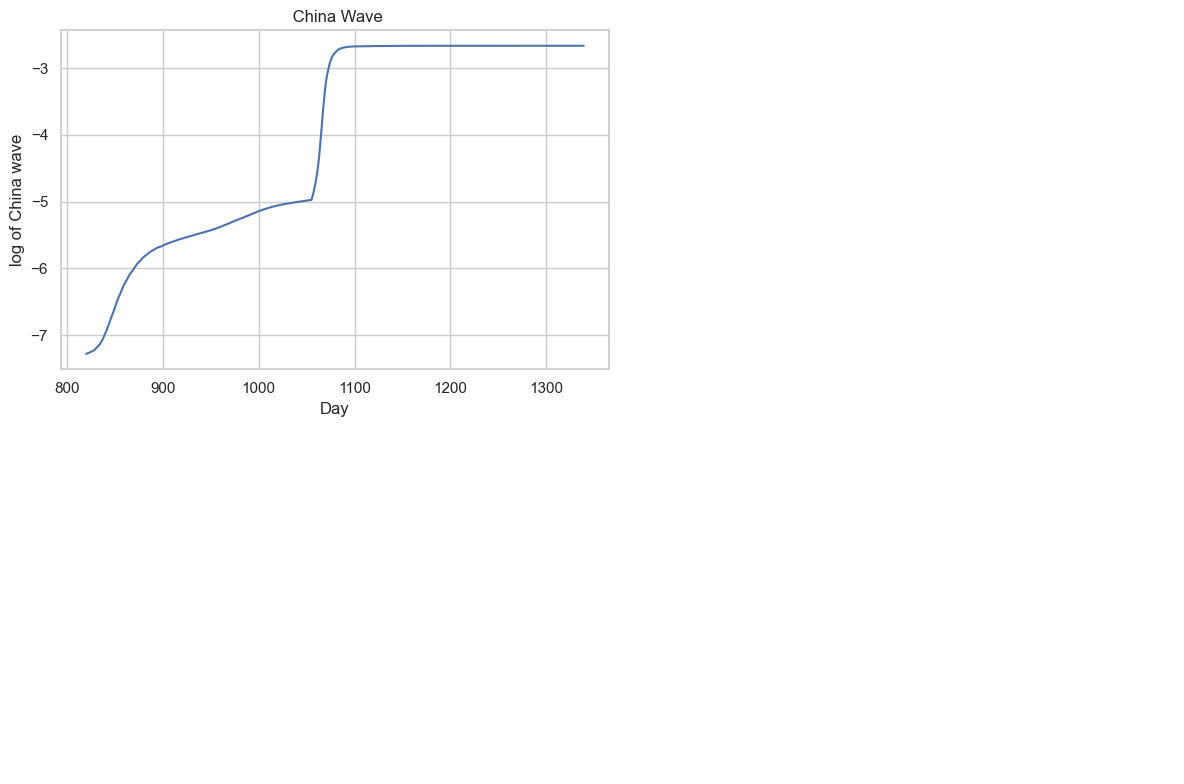

In [185]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plotting logrithm for wave
axes[0, 0].plot(China_wave['logrithm'], label='Logrithm of China wave')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('log of China wave')
axes[0, 0].set_title(' China Wave')
axes[0, 0].grid(True)

# Plotting logrithm for 2nd wave
axes[0,1].axis('off')

axes[1, 0].axis('off')

axes[1, 1].axis('off')
plt.tight_layout()

plt.show()



# plotting log of every wave for India

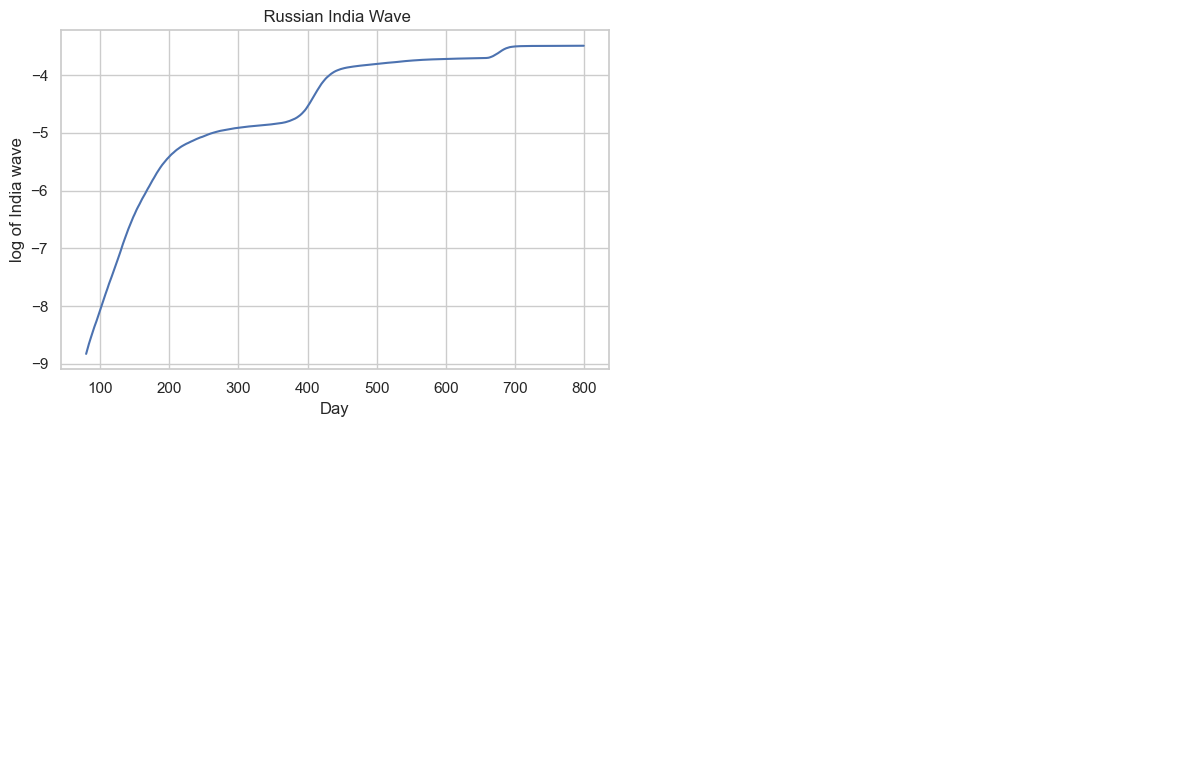

In [186]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plotting logrithm for wave
axes[0, 0].plot(India_wave['logrithm'], label='Logrithm of India wave')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('log of India wave')
axes[0, 0].set_title(' Russian India Wave')
axes[0, 0].grid(True)

# Plotting logrithm for 2nd wave
axes[0,1].axis('off')

axes[1, 0].axis('off')

axes[1, 1].axis('off')
plt.tight_layout()

plt.show()



# Finding value of coeff a & r for Afghanistan wave

In [189]:
# identifying peiod of exponential growth
growth_period= Afghanistan_wave[40:129+1]
coeff= np.polyfit(growth_period['index'],growth_period['norm_data'],1)
r, a = coeff
print(a,r)

0.0005229464893966754 2.6996604419966094e-06


In [190]:
Afghanistan_wave

Date_reported      Country  Cumulative_cases  population  norm_data  \
40     2020-05-09  Afghanistan              3563  41128771.0   0.000087   
41     2020-05-10  Afghanistan              3563  41128771.0   0.000087   
42     2020-05-11  Afghanistan              4041  41128771.0   0.000098   
43     2020-05-12  Afghanistan              4402  41128771.0   0.000107   
44     2020-05-13  Afghanistan              4664  41128771.0   0.000113   
..            ...          ...               ...         ...        ...   
655    2022-01-14  Afghanistan            158602  41128771.0   0.003856   
656    2022-01-15  Afghanistan            158639  41128771.0   0.003857   
657    2022-01-16  Afghanistan            158678  41128771.0   0.003858   
658    2022-01-17  Afghanistan            158737  41128771.0   0.003860   
659    2022-01-18  Afghanistan            158826  41128771.0   0.003862   

     index  logrithm  
40      41 -9.353860  
41      42 -9.353860  
42      43 -9.227971  
43      44 -9.142404  
44      45 -9.084590  
..     ...       ...  
655    656 -5.558065  
656    657 -5.557832  
657    658 -5.557586  
658    659 -5.557214  
659    660 -5.556654  

[620 rows x 7 columns]

starting Date =  40
starting cases value =  8.663035421116766e-05
a =  0.10000269966044201
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  8.663035421116766e-05
k3 =  1
k4 =  0.02
k5 =  0.01
error =  4.5925576054682565e-07


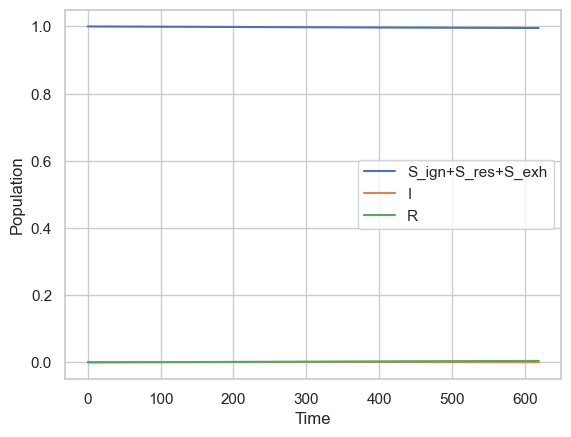

In [194]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5):
    S_ign, S_res, S_exh, I, R = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6
    dR_dt = r2

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

#starting point of wave
starting_point_index= 40
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = Afghanistan_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]


# Time grid
t = np.arange(0, len(Afghanistan_wave), 1)

# Rate constants
k3 = 1
k4 = 1/50
k5 = 1/100

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)

# Solve ODE
sol = odeint(model, y0, t, args=(a, b, k3, k4, k5))
p = 1 - sol[:, 0] - sol[:, 1] - sol[:, 2]
error = np.mean(np.square(p - Afghanistan_wave['norm_data']))
print("error = ", error)

# Plot results
plt.plot(t, sol[:, 0]+sol[:, 1]+sol[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol[:, 3], label='I')
plt.plot(t, sol[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()



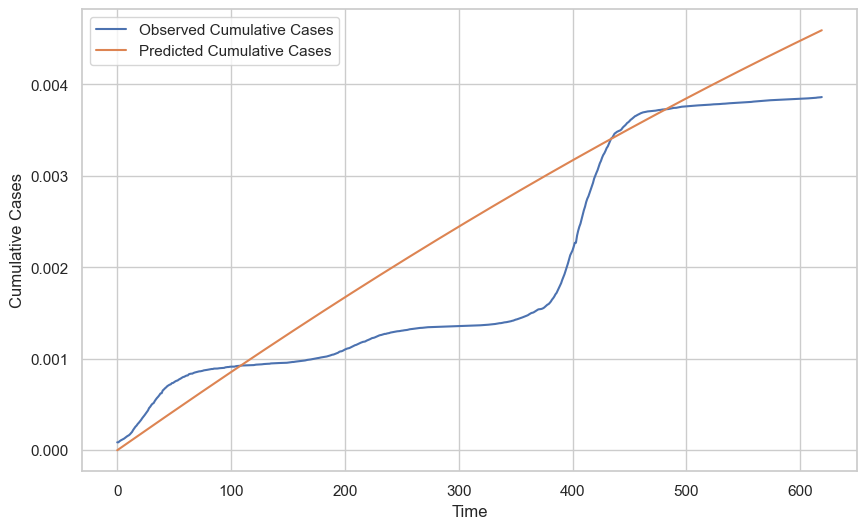

In [195]:
plt.figure(figsize=(10, 6))
plt.plot(t, Afghanistan_wave['norm_data'], label='Observed Cumulative Cases')
plt.plot(t, p, label='Predicted Cumulative Cases')
plt.xlabel('Time')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.show()

[0.09546835 0.0848794  0.99960824 0.05485508 0.        ]
error =  0.0015560737404427271


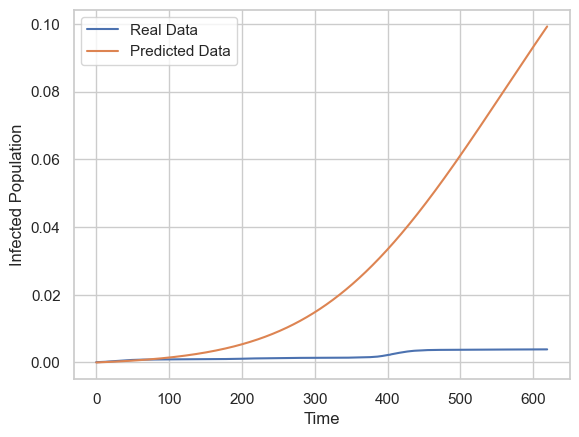

Optimal Parameters: [0.09546835 0.0848794  0.99960824 0.05485508 0.        ]


In [196]:

from scipy.optimize import minimize


# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5):
    S_ign, S_res, S_exh, I, R = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6
    dR_dt = r2

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

# Define the objective function (MSE)
def objective(params, *args):
    t, y0, real_data = args
    sol = odeint(model, y0, t, args=tuple(params))
    predicted_data = sol[:, 3]  # I column
    mse = np.mean((predicted_data - real_data)**2)
    return mse

# Real-world data (replace this with your actual data)
# Example data: cumulative cases over time
real_data = Afghanistan_wave['norm_data']

# Time grid
t = np.arange(len(real_data))


y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]

# Initial guess for parameters
initial_params = [a, b, k3, k4, k5]

# Minimize the objective function (MSE)
result = minimize(objective, initial_params, args=(t, y0, real_data),bounds=[(0, 1)]*5, method='L-BFGS-B')

# Extract the optimal parameters
optimal_params = result.x
print(optimal_params)
# Solve ODE with optimal parameters
sol_optimal = odeint(model, y0, t, args=tuple(optimal_params))
p = 1 - sol_optimal[:, 0] - sol_optimal[:, 1] - sol_optimal[:, 2]
error = np.mean(np.square(p - Afghanistan_wave['norm_data']))
print("error = ", error)

# Plot real data and predicted data
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

print("Optimal Parameters:", optimal_params)


##Optimal a&b

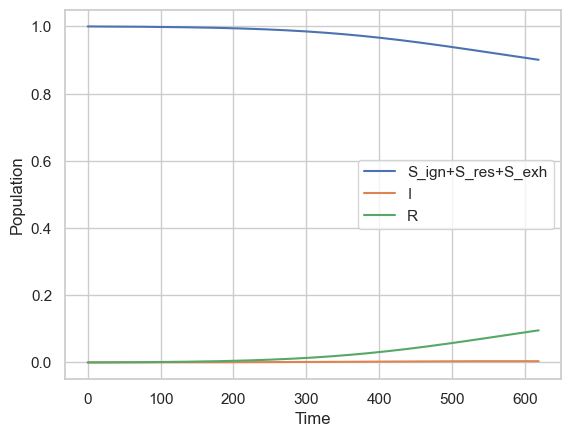

In [197]:
# Plot results
plt.plot(t, sol_optimal[:, 0]+sol_optimal[:, 1]+sol_optimal[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol_optimal[:, 3], label='I')
plt.plot(t, sol_optimal[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

Modification 1  (Introduce an Intervention Phase)
Let's introduce an additional compartment,intervene I intervene representing individuals who adhere to intervention measures, and modify the model accordingly.

starting Date =  40
starting cases value =  8.663035421116766e-05
a =  0.10000269966044201
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  8.663035421116766e-05
k3 =  1
k4 =  0.02
k5 =  0.01
k_intervene =  0.3
error =  4.5925576054682565e-07


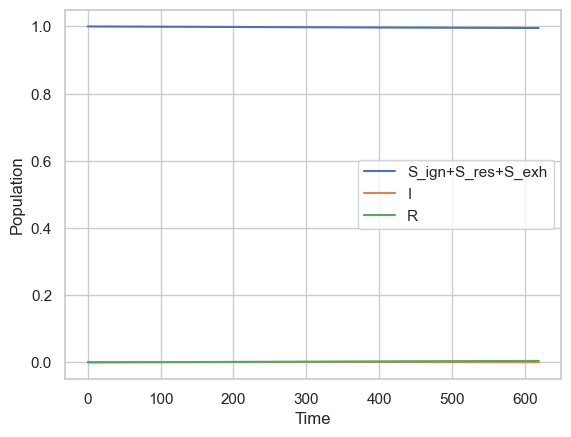

In [198]:
# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5, k_intervene):
    S_ign, S_res, S_exh, I, R, I_intervene = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I
    r_intervene = k_intervene * I_intervene

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - r_intervene
    dR_dt = r2
    dI_intervene_dt = r_intervene

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt, dI_intervene_dt]

#starting point of wave
starting_point_index= 40
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = Afghanistan_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0
dI_intervene_dt_0=0
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0,dI_intervene_dt_0]


# Time grid
t = np.arange(0, len(Afghanistan_wave), 1)

# Rate constants
k3 = 1
k4 = 1/50
k5 = 1/100
k_intervene=0.3

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)
print("k_intervene = ",k_intervene)

# Solve ODE
sol = odeint(model, y0, t, args=(a, b, k3, k4, k5,k_intervene))
p = 1 - sol[:, 0] - sol[:, 1] - sol[:, 2]-sol[:,5]

error = np.mean(np.square(p - Afghanistan_wave['norm_data']))
print("error = ", error)
# Plot results
plt.plot(t, sol[:, 0]+sol[:, 1]+sol[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol[:, 3], label='I')
plt.plot(t, sol[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

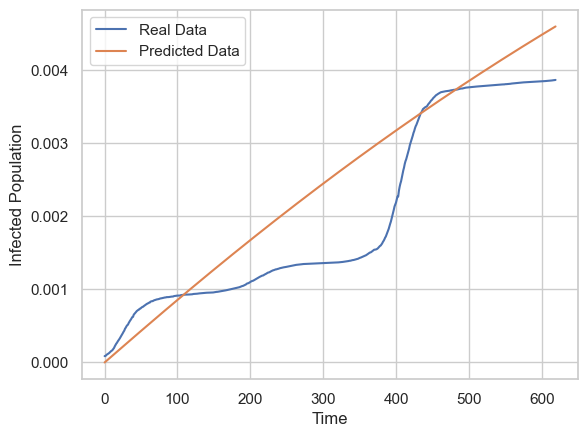

In [199]:
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

starting Date =  40
starting cases value =  8.663035421116766e-05
a =  0.10000269966044201
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  8.663035421116766e-05
k3 =  1
k4 =  0.02
k5 =  0.01
k_recovery =  0.005
error =  3.4282442479357294e-07


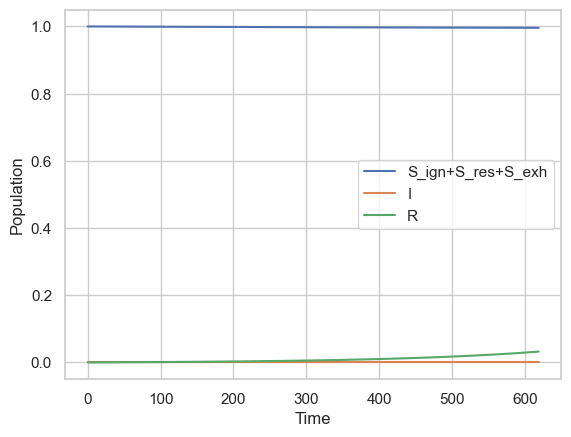

In [200]:
# Modification 3

# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5, k_recovery):
    S_ign, S_res, S_exh, I, R = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r_recovery = k_recovery * R

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5
    dI_dt = r1 - r2
    dR_dt = r2 + r_recovery

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

#starting point of wave
starting_point_index= 40
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = Afghanistan_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0

y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]


# Time grid
t = np.arange(0, len(Afghanistan_wave), 1)

# Rate constants
k3 = 1
k4 = 1/50
k5 = 1/100
k_recovery=1/200

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)
print("k_recovery = ",k_recovery)
# Solve ODE
sol = odeint(model, y0, t, args=(a, b, k3, k4, k5,k_recovery))
p = 1 - sol[:, 0] - sol[:, 1] - sol[:, 2]

error = np.mean(np.square(p - Afghanistan_wave['norm_data']))
print("error = ", error)
# Plot results
plt.plot(t, sol[:, 0]+sol[:, 1]+sol[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol[:, 3], label='I')
plt.plot(t, sol[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

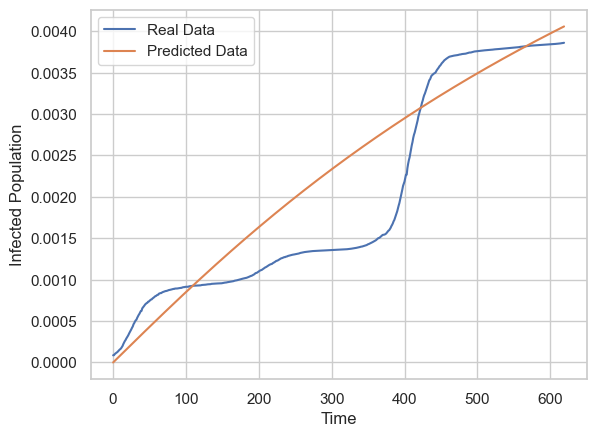

In [201]:
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

starting Date =  40
starting cases value =  8.663035421116766e-05
a =  0.10000269966044201
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  8.663035421116766e-05
k4 =  0.02
k5 =  0.01
Ip =  0.02
k  =  0.01
q  =  0.5
error =  6.133708504173447e-07


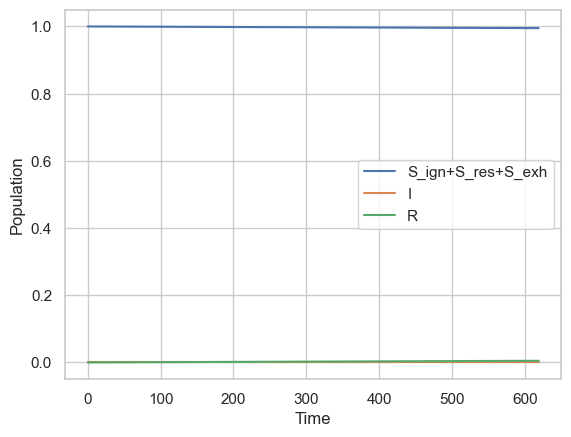

In [202]:
# CROWD EFFECT

# Define the system of ODEs with the new reaction
def model(y, t, a, b, q, k4, k5, Ip):
    S_ign, S_res, S_exh, I, R = y
    
    r1 = a * S_ign * I
    r2 = b * I
    r3 = q * S_ign * I**2
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    
    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - 2*r3  # Two times the effect due to the 2I in the reaction
    dR_dt = r2
    
    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

#starting point of wave
starting_point_index= 40
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = Afghanistan_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0

# Initial conditions
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]  # S_ign(0) = 1, S_res(0) = S_exh(0) = I(0) = R(0) = 0

# Time points
t = np.arange(0, len(Afghanistan_wave), 1)

# Rate constants

k4 = 1/50
k5 = 1/100

# Crowd effect parameters
Ip = 0.02
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip


print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k4 = ",k4)
print("k5 = ",k5)
print("Ip = ",Ip)
print("k  = ",k )
print("q  = ",q )



# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip))

p = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign, S_res, S_exh, I, R = solution.T

error = np.mean(np.square(p - Afghanistan_wave['norm_data']))
print("error = ", error)

# Plot results
plt.plot(t, solution[:, 0]+solution[:, 1]+solution[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, solution[:, 3], label='I')
plt.plot(t, solution[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

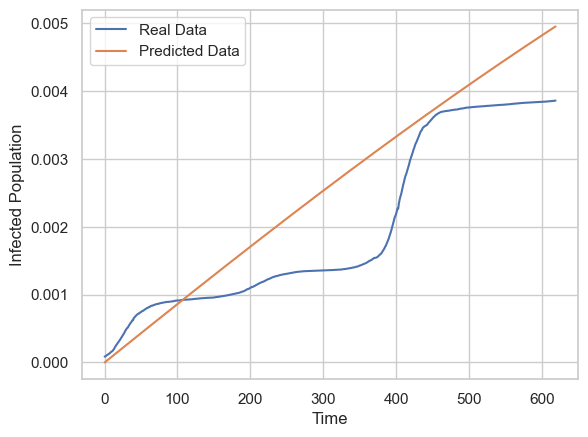

In [203]:
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

Optimal Parameters: [0.10534685 0.09459979 0.49999759 0.02000022 0.01       0.02      ]
error =  0.0020354762962667724


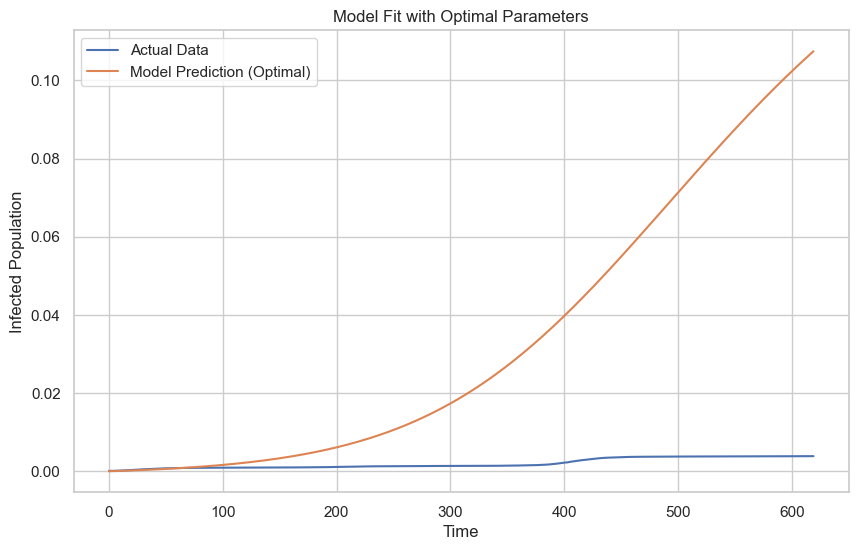

In [204]:
# OPTIMAL PARAMETERS

# Define the system of ODEs with the new reaction
def model(y, t, a, b, q, k4, k5, Ip):
    S_ign, S_res, S_exh, I, R = y
    
    r1 = a * S_ign * I
    r2 = b * I
    r3 = q * S_ign * I**2
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I
    
    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - 2*r3
    dR_dt = r2
    
    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

# Define the objective function to minimize (MSE)
def objective(params, *args):
    t, data = args
    a, b, q, k4, k5, Ip = params
    solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip))
    model_predictions = solution[:, 3]  # I column represents the infected population
    mse = np.mean((model_predictions - data)**2)
    return mse

# Generate some example data (replace this with your actual data)
t = np.arange(0, len(Afghanistan_wave), 1)
actual_data = Afghanistan_wave['norm_data']

# Initial guess for parameters
initial_params = [a, b, q, k4, k5, Ip]

# Perform the optimization
result = minimize(objective, initial_params, args=(t, actual_data),bounds=[(0, 1)]*6, method='L-BFGS-B')

# Extract the optimal parameters
optimal_params = result.x

# Print the optimal parameters
print("Optimal Parameters:", optimal_params)

# Plotting the results using the optimal parameters
solution = odeint(model, y0, t, args=tuple(optimal_params))
S_ign, S_res, S_exh, I, R = solution.T
p = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]

error = np.mean(np.square(p - Afghanistan_wave['norm_data']))
print("error = ", error)

plt.figure(figsize=(10, 6))
plt.plot(t, actual_data, label='Actual Data')
plt.plot(t, p, label='Model Prediction (Optimal)')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.title('Model Fit with Optimal Parameters')
plt.show()

## PLOT RESULTS

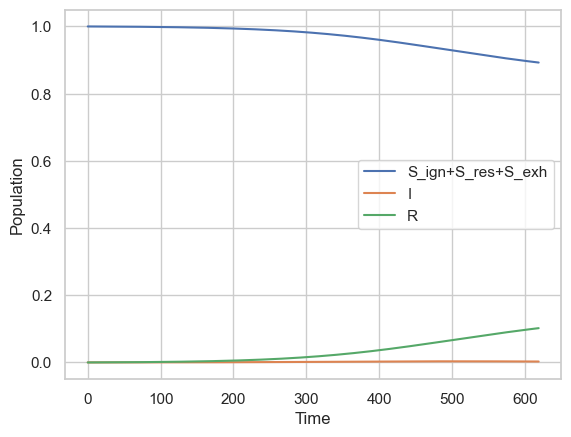

In [205]:
# Plot results
plt.plot(t, solution[:, 0]+solution[:, 1]+solution[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, solution[:, 3], label='I')
plt.plot(t, solution[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

# Different initial values of Ip 

starting Date =  40
starting cases value =  8.663035421116766e-05
a =  0.10000269966044201
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  8.663035421116766e-05
k4 =  0.02
k5 =  0.01
Ip1 =  0.02
k  =  0.01
q  =  0.5
error =  6.133708504173447e-07
Ip2 =  0.05
k  =  0.01
q  =  0.19999999999999998
error =  6.521898536840966e-07
Ip3 =  0.08
k  =  0.01
q  =  0.125
error =  6.624063677144633e-07


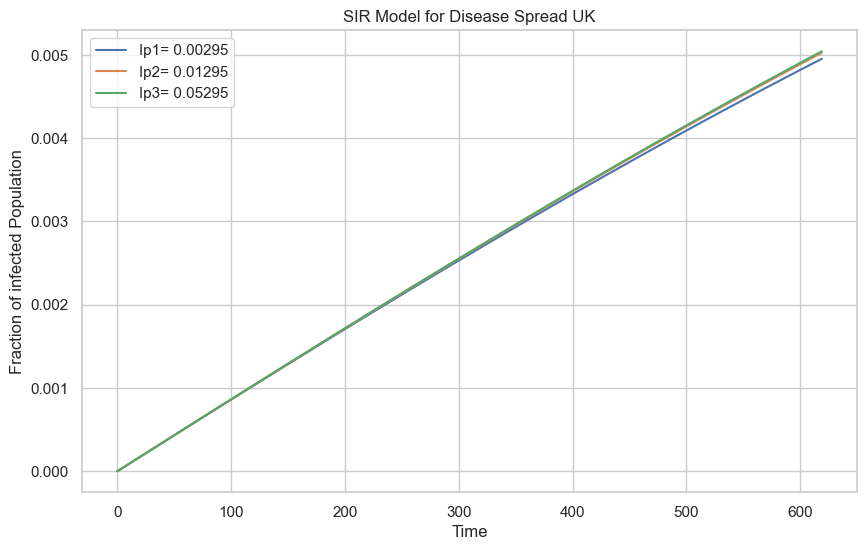

In [206]:
# Calculate b (recovery rate) from the given τ (time of virus spreading)
tau = 10  # τ ≈ 10 days
b = 1 / tau

# Calculate a (total rate of change) from the relationship a = r + b
# Given that when S is close to 1, r ≈ a - b, we'll assume r ≈ 0 for this example.
a =  r + b  # You can adjust r as needed

# Define the system of ODEs with the new reaction
def model(y, t, a, b, q, k4, k5, Ip):
    S_ign, S_res, S_exh, I, R = y
    
    r1 = a * S_ign * I
    r2 = b * I
    r3 = q * S_ign * I**2
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    
    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - 2*r3  # Two times the effect due to the 2I in the reaction
    dR_dt = r2
    
    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]


#starting point of wave
starting_point_index= 40
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = Afghanistan_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0

# Initial conditions
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]  # S_ign(0) = 1, S_res(0) = S_exh(0) = I(0) = R(0) = 0

# Time points
t = np.arange(0, len(Afghanistan_wave), 1)

# Rate constants

k4 = 1/50
k5 = 1/100

# Crowd effect parameters
Ip1 = 0.02
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip1

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k4 = ",k4)
print("k5 = ",k5)
print("Ip1 = ",Ip1)
print("k  = ",k )
print("q  = ",q )



# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip1))

p1 = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign1, S_res1, S_exh1, I1, R1 = solution.T

error = np.mean(np.square(p1 - Afghanistan_wave['norm_data']))
print("error = ", error)



# second I0

# Crowd effect parameters
Ip2 = 0.05
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip2

print("Ip2 = ",Ip2)
print("k  = ",k )
print("q  = ",q )
# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip2))

p2 = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign2, S_res2, S_exh2, I2, R2 = solution.T

error = np.mean(np.square(p2 - Afghanistan_wave['norm_data']))
print("error = ", error)


# third I0

# Crowd effect parameters
Ip3 = 0.08
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip3

print("Ip3 = ",Ip3)
print("k  = ",k )
print("q  = ",q )
# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip3))

p3 = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign3, S_res3, S_exh3, I3, R3 = solution.T

error = np.mean(np.square(p3 - Afghanistan_wave['norm_data']))
print("error = ", error)




# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, p1, label='Ip1= 0.00295')
plt.plot(t, p2, label='Ip2= 0.01295')
plt.plot(t, p3, label='Ip3= 0.05295')
plt.xlabel('Time')
plt.ylabel('Fraction of infected Population')
plt.legend()
plt.title('SIR Model for Disease Spread UK')
plt.show()


In [ ]:
China_wave_df = China_wave.reset_index(drop=False)

In [ ]:
China_wave_df

level_0 Date_reported Country  Cumulative_cases    population  norm_data  \
0        820    2022-04-18   China            979966  1.425887e+09   0.000687   
1        821    2022-04-19   China            984769  1.425887e+09   0.000691   
2        822    2022-04-20   China            990420  1.425887e+09   0.000695   
3        823    2022-04-21   China            995928  1.425887e+09   0.000698   
4        824    2022-04-22   China           1003057  1.425887e+09   0.000703   
..       ...           ...     ...               ...           ...        ...   
515     1335    2023-09-15   China          99309232  1.425887e+09   0.069647   
516     1336    2023-09-16   China          99309232  1.425887e+09   0.069647   
517     1337    2023-09-17   China          99309232  1.425887e+09   0.069647   
518     1338    2023-09-18   China          99309232  1.425887e+09   0.069647   
519     1339    2023-09-19   China          99309232  1.425887e+09   0.069647   

     index  logrithm  
0      821 -7.282787  
1      822 -7.277898  
2      823 -7.272176  
3      824 -7.266630  
4      825 -7.259497  
..     ...       ...  
515   1336 -2.664311  
516   1337 -2.664311  
517   1338 -2.664311  
518   1339 -2.664311  
519   1340 -2.664311  

[520 rows x 8 columns]

In [ ]:
# Finding value of coeff a & r for China wave

In [ ]:
growth_period

Date_reported      Country  Cumulative_cases  population  norm_data  \
80     2020-06-18  Afghanistan             26874  41128771.0   0.000653   
81     2020-06-19  Afghanistan             27337  41128771.0   0.000665   
82     2020-06-20  Afghanistan             27878  41128771.0   0.000678   
83     2020-06-21  Afghanistan             28297  41128771.0   0.000688   
84     2020-06-22  Afghanistan             28833  41128771.0   0.000701   
..            ...          ...               ...         ...        ...   
165    2020-09-11  Afghanistan             38572  41128771.0   0.000938   
166    2020-09-12  Afghanistan             38606  41128771.0   0.000939   
167    2020-09-13  Afghanistan             38641  41128771.0   0.000940   
168    2020-09-14  Afghanistan             38716  41128771.0   0.000941   
169    2020-09-15  Afghanistan             38772  41128771.0   0.000943   

     index  logrithm  
80      81 -7.333304  
81      82 -7.316222  
82      83 -7.296625  
83      84 -7.281707  
84      85 -7.262943  
..     ...       ...  
165    166 -6.971937  
166    167 -6.971055  
167    168 -6.970149  
168    169 -6.968210  
169    170 -6.966765  

[90 rows x 7 columns]

In [ ]:
# identifying peiod of exponential growth
growth_period = China_wave_df[China_wave_df["level_0"]<=1045]
coeff= np.polyfit(growth_period['index'],growth_period['norm_data'],1)
r, a = coeff
print(a,r)

-0.021668543071931962 2.7470831693094927e-05


starting Date =  821
starting cases value =  0.0006906359110193851
a =  0.1000274708316931
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.0006906359110193851
k3 =  1
k4 =  0.02
k5 =  0.01
error =  0.0014493570249050477


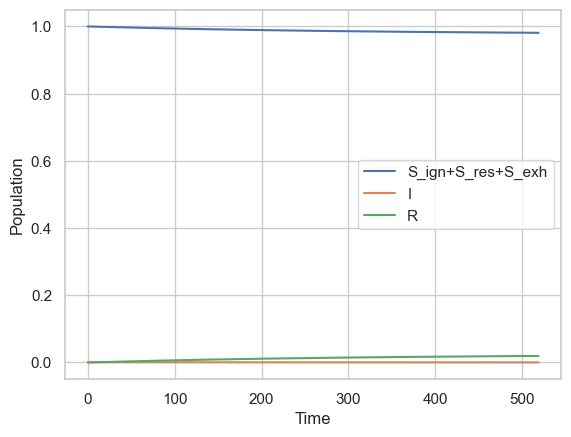

In [ ]:
# SIR Brazil WAVE

# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5):
    S_ign, S_res, S_exh, I, R = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6
    dR_dt = r2

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]


#starting point of wave
starting_point_index= 821
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = China_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]

# Define the time span
t = np.arange(0, len(China_wave), 1)  # Start and end times

# Rate constants
k3 = 1
k4 = 1/50
k5 = 1/100

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)




# Solve ODE
sol = odeint(model, y0, t, args=(a, b, k3, k4, k5))
p = 1 - sol[:, 0] - sol[:, 1] - sol[:, 2]
# Calculate the mean squared error (MSE)

error = np.mean(np.square(p - China_wave['norm_data']))
print("error = ", error)

# Plot results
plt.plot(t, sol[:, 0]+sol[:, 1]+sol[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol[:, 3], label='I')
plt.plot(t, sol[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()



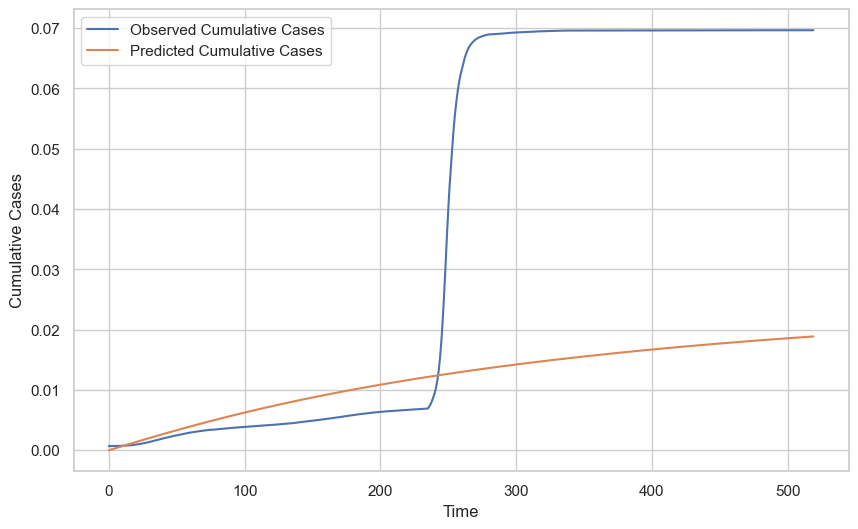

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, China_wave['norm_data'], label='Observed Cumulative Cases')
plt.plot(t, p, label='Predicted Cumulative Cases')
plt.xlabel('Time')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.show()

# Optimal parameters

error =  0.031101254447455404


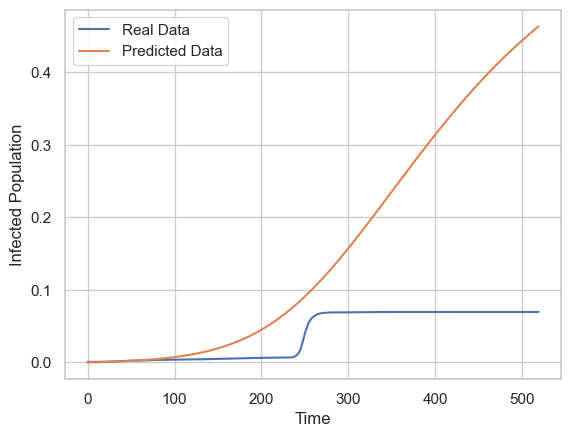

Optimal Parameters: [0.03825606 0.01985124 0.98849799 0.22151576 1.        ]


In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5):
    S_ign, S_res, S_exh, I, R = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6
    dR_dt = r2

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

# Define the objective function (MSE)
def objective(params, *args):
    t, y0, real_data = args
    sol = odeint(model, y0, t, args=tuple(params))
    predicted_data = sol[:, 3]  # I column
    mse = np.mean((predicted_data - real_data)**2)
    return mse

real_data = China_wave['norm_data']

# Time grid
t = np.arange(len(real_data))


y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]

# Initial guess for parameters
initial_params = [a, b, k3, k4, k5]

# Minimize the objective function (MSE)
result = minimize(objective, initial_params, args=(t, y0, real_data),bounds=[(0, 1)]*5, method='L-BFGS-B')

# Extract the optimal parameters
optimal_params = result.x

# Solve ODE with optimal parameters
sol_optimal = odeint(model, y0, t, args=tuple(optimal_params))
p = 1 - sol_optimal[:, 0] - sol_optimal[:, 1] - sol_optimal[:, 2]
# Calculate the mean squared error (MSE)
error = np.mean(np.square(p - China_wave['norm_data']))
print("error = ", error)

# Plot real data and predicted data
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

print("Optimal Parameters:", optimal_params)



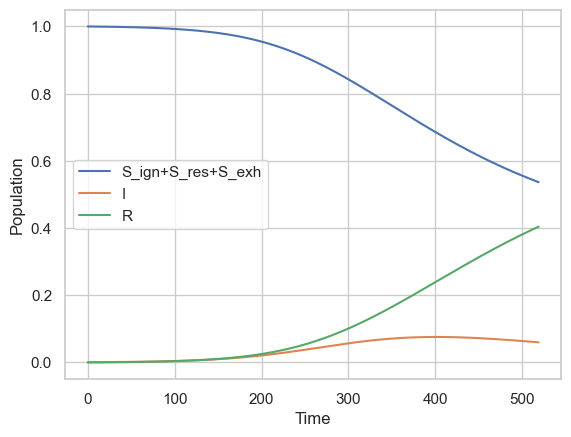

In [ ]:
# Plot results
plt.plot(t, sol_optimal[:, 0]+sol_optimal[:, 1]+sol_optimal[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol_optimal[:, 3], label='I')
plt.plot(t, sol_optimal[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

Modificcation 1 (Introduce an Intervention Phase)

starting Date =  821
starting cases value =  0.0006906359110193851
a =  0.1000274708316931
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.0006906359110193851
k3 =  1
k4 =  0.02
k5 =  0.01
k_intervene =  0.3
error =  0.0014493570249050477


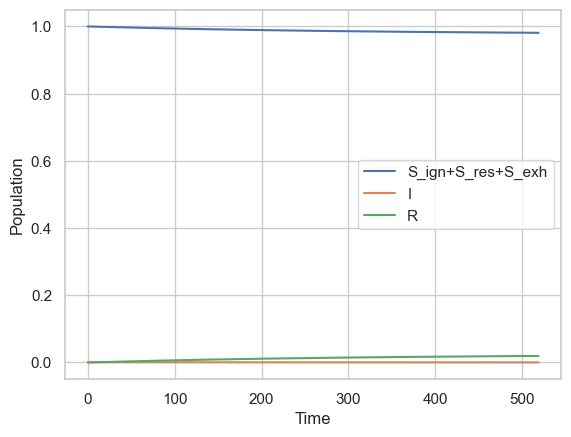

In [ ]:
# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5, k_intervene):
    S_ign, S_res, S_exh, I, R, I_intervene = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I
    r_intervene = k_intervene * I_intervene

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - r_intervene
    dR_dt = r2
    dI_intervene_dt = r_intervene

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt, dI_intervene_dt]

#starting point of wave
starting_point_index= 821
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = China_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0
dI_intervene_dt_0=0
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0,dI_intervene_dt_0]

t = np.arange(0, len(China_wave), 1)

# Rate constants
k3 = 1
k4 = 1/50
k5 = 1/100
k_intervene=0.3

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)
print("k_intervene = ",k_intervene)

# Solve ODE
sol = odeint(model, y0, t, args=(a, b, k3, k4, k5,k_intervene))
p = 1 - sol[:, 0] - sol[:, 1] - sol[:, 2]-sol[:,5]

error = np.mean(np.square(p - China_wave['norm_data']))
print("error = ", error)
# Plot results
plt.plot(t, sol[:, 0]+sol[:, 1]+sol[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol[:, 3], label='I')
plt.plot(t, sol[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

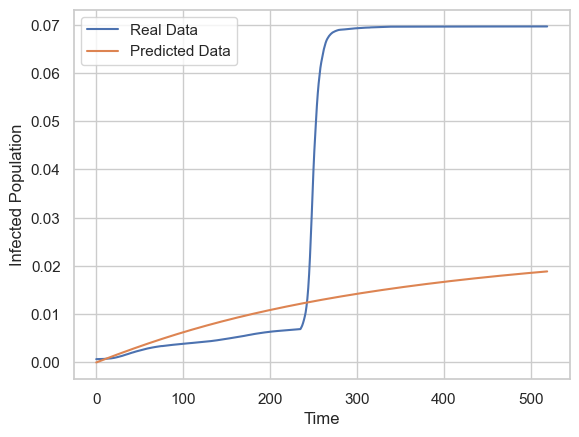

In [ ]:
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

# Modification 3: Time-Varying Recovery Rate

starting Date =  821
starting cases value =  0.0006906359110193851
a =  0.1000274708316931
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.0006906359110193851
k3 =  1
k4 =  0.02
k5 =  0.01
k_recovery =  0.005
error =  0.001660465406724693


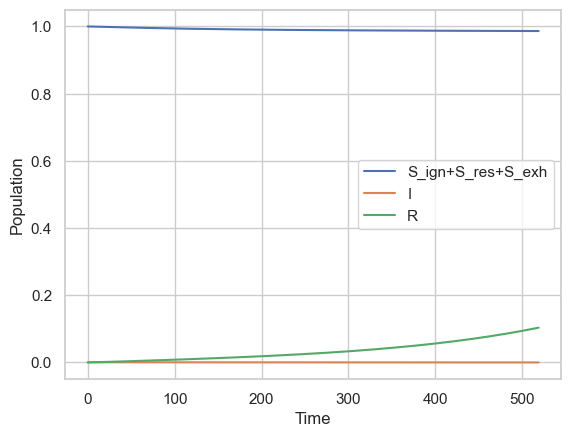

In [ ]:
# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5, k_recovery):
    S_ign, S_res, S_exh, I, R = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r_recovery = k_recovery * R

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5
    dI_dt = r1 - r2
    dR_dt = r2 + r_recovery

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

#starting point of wave
starting_point_index= 821
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = China_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0

y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]

t = np.arange(0, len(China_wave), 1)

# Rate constants
k3 = 1
k4 = 1/50
k5 = 1/100
k_recovery=1/200

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)
print("k_recovery = ",k_recovery)


# Solve ODE
sol = odeint(model, y0, t, args=(a, b, k3, k4, k5,k_recovery))
p = 1 - sol[:, 0] - sol[:, 1] - sol[:, 2]

error = np.mean(np.square(p - China_wave['norm_data']))
print("error = ", error)
# Plot results
plt.plot(t, sol[:, 0]+sol[:, 1]+sol[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol[:, 3], label='I')
plt.plot(t, sol[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

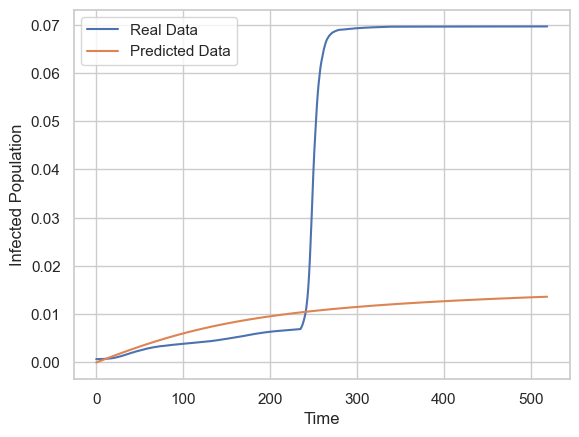

In [ ]:
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

# Crowd Effect

starting Date =  821
starting cases value =  0.0006906359110193851
a =  0.1000274708316931
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.0006906359110193851
k4 =  0.02
k5 =  0.01
Ip =  0.02
k  =  0.01
q  =  0.5
error =  0.0012350141678704543


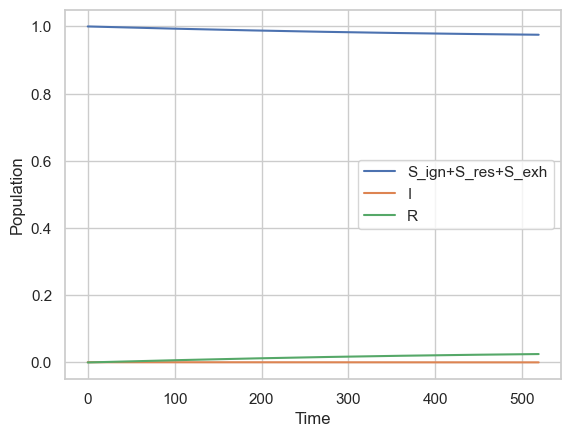

In [ ]:
# Define the system of ODEs with the new reaction
def model(y, t, a, b, q, k4, k5, Ip):
    S_ign, S_res, S_exh, I, R = y
    
    r1 = a * S_ign * I
    r2 = b * I
    r3 = q * S_ign * I**2
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    
    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - 2*r3  # Two times the effect due to the 2I in the reaction
    dR_dt = r2
    
    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

#starting point of wave
starting_point_index= 821
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = China_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0

# Initial conditions
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]  # S_ign(0) = 1, S_res(0) = S_exh(0) = I(0) = R(0) = 0

t = np.arange(0, len(China_wave), 1)

# Rate constants

k4 = 1/50
k5 = 1/100

# Crowd effect parameters
Ip = 0.02
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip


print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k4 = ",k4)
print("k5 = ",k5)
print("Ip = ",Ip)
print("k  = ",k )
print("q  = ",q )


# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip))

p = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign, S_res, S_exh, I, R = solution.T

error = np.mean(np.square(p - China_wave['norm_data']))
print("error = ", error)

# Plot results
plt.plot(t, solution[:, 0]+solution[:, 1]+solution[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, solution[:, 3], label='I')
plt.plot(t, solution[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


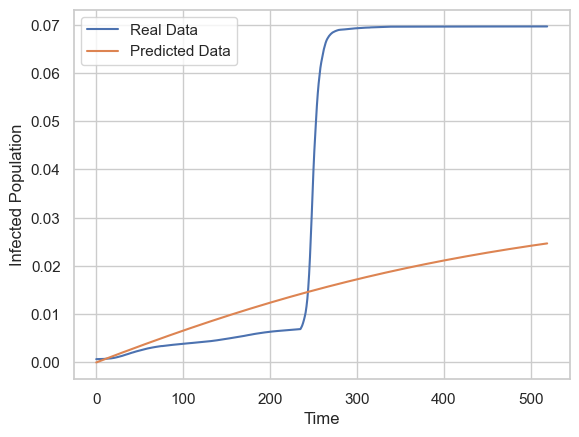

In [ ]:
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

Optimal Parameters: [0.03361166 0.01535392 0.07142172 0.85793484 0.01642151 0.02      ]
error =  0.036139885706650346


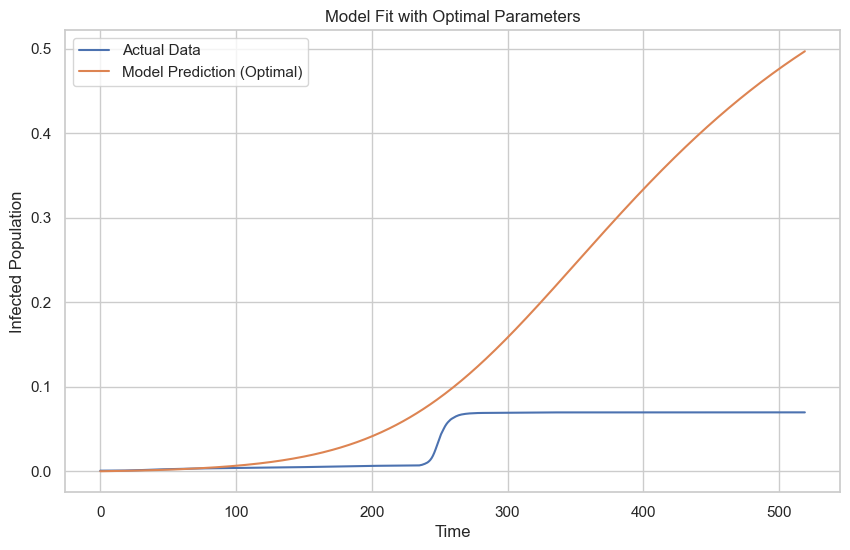

In [ ]:
# OPTIMAL PARAMETERS

# Define the system of ODEs with the new reaction
def model(y, t, a, b, q, k4, k5, Ip):
    S_ign, S_res, S_exh, I, R = y
    
    r1 = a * S_ign * I
    r2 = b * I
    r3 = q * S_ign * I**2
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I
    
    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - 2*r3
    dR_dt = r2
    
    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

# Define the objective function to minimize (MSE)
def objective(params, *args):
    t, data = args
    a, b, q, k4, k5, Ip = params
    solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip))
    model_predictions = solution[:, 3]  # I column represents the infected population
    mse = np.mean((model_predictions - data)**2)
    return mse

# Generate some example data (replace this with your actual data)
t = np.arange(0, len(China_wave), 1)
actual_data = China_wave['norm_data']

# Initial guess for parameters
initial_params = [a, b, q, k4, k5, Ip]

# Perform the optimization
result = minimize(objective, initial_params, args=(t, actual_data),bounds=[(0, 1)]*6, method='L-BFGS-B')

# Extract the optimal parameters
optimal_params = result.x

# Print the optimal parameters
print("Optimal Parameters:", optimal_params)

# Plotting the results using the optimal parameters
solution = odeint(model, y0, t, args=tuple(optimal_params))
S_ign, S_res, S_exh, I, R = solution.T
p = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]

error = np.mean(np.square(p - China_wave['norm_data']))
print("error = ", error)

plt.figure(figsize=(10, 6))
plt.plot(t, actual_data, label='Actual Data')
plt.plot(t, p, label='Model Prediction (Optimal)')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.title('Model Fit with Optimal Parameters')
plt.show()

PLOT RESULTS

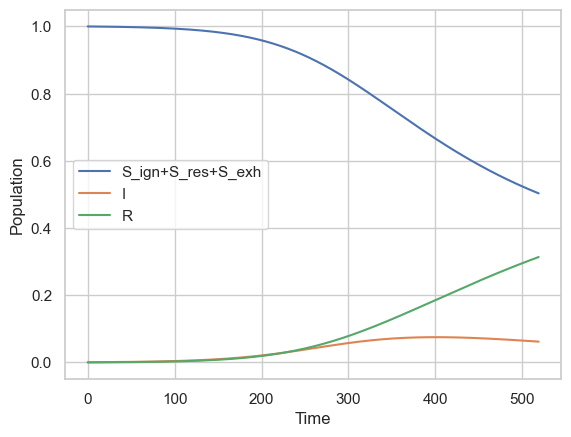

In [ ]:
# Plot results
plt.plot(t, solution[:, 0]+solution[:, 1]+solution[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, solution[:, 3], label='I')
plt.plot(t, solution[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

# Different initial values of Ip 

starting Date =  821
starting cases value =  0.0006906359110193851
a =  0.1000274708316931
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.0006906359110193851
k4 =  0.02
k5 =  0.01
Ip1 =  0.02
k  =  0.01
q  =  0.5
error =  0.0012350141678704543
Ip2 =  0.05
k  =  0.01
q  =  0.19999999999999998
error =  0.0011783343622067154
Ip3 =  0.08
k  =  0.01
q  =  0.125
error =  0.0011630454323659151


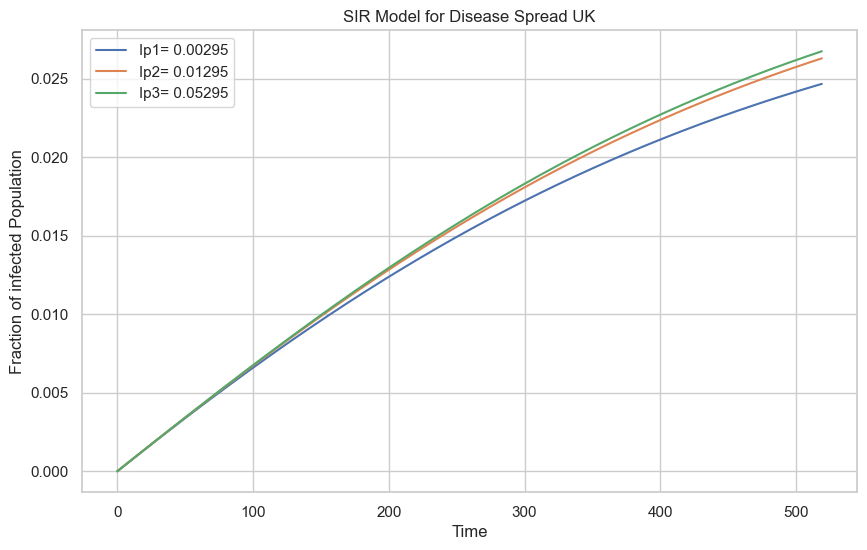

In [ ]:
# Calculate b (recovery rate) from the given τ (time of virus spreading)
tau = 10  # τ ≈ 10 days
b = 1 / tau

# Calculate a (total rate of change) from the relationship a = r + b
# Given that when S is close to 1, r ≈ a - b, we'll assume r ≈ 0 for this example.
a =  r + b  # You can adjust r as needed

# Define the system of ODEs with the new reaction
def model(y, t, a, b, q, k4, k5, Ip):
    S_ign, S_res, S_exh, I, R = y
    
    r1 = a * S_ign * I
    r2 = b * I
    r3 = q * S_ign * I**2
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    
    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - 2*r3  # Two times the effect due to the 2I in the reaction
    dR_dt = r2
    
    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]


#starting point of wave
starting_point_index= 821
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = China_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0

# Initial conditions
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]  # S_ign(0) = 1, S_res(0) = S_exh(0) = I(0) = R(0) = 0

# Time points
t = np.arange(0, len(China_wave), 1)

# Rate constants

k4 = 1/50
k5 = 1/100

# Crowd effect parameters
Ip1 = 0.02
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip1

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k4 = ",k4)
print("k5 = ",k5)
print("Ip1 = ",Ip1)
print("k  = ",k )
print("q  = ",q )



# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip1))

p1 = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign1, S_res1, S_exh1, I1, R1 = solution.T

error = np.mean(np.square(p1 - China_wave['norm_data']))
print("error = ", error)



# second I0

# Crowd effect parameters
Ip2 = 0.05
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip2

print("Ip2 = ",Ip2)
print("k  = ",k )
print("q  = ",q )
# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip2))

p2 = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign2, S_res2, S_exh2, I2, R2 = solution.T

error = np.mean(np.square(p2 - China_wave['norm_data']))
print("error = ", error)


# third I0

# Crowd effect parameters
Ip3 = 0.08
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip3

print("Ip3 = ",Ip3)
print("k  = ",k )
print("q  = ",q )
# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip3))

p3 = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign3, S_res3, S_exh3, I3, R3 = solution.T

error = np.mean(np.square(p3 - China_wave['norm_data']))
print("error = ", error)




# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, p1, label='Ip1= 0.00295')
plt.plot(t, p2, label='Ip2= 0.01295')
plt.plot(t, p3, label='Ip3= 0.05295')
plt.xlabel('Time')
plt.ylabel('Fraction of infected Population')
plt.legend()
plt.title('SIR Model for Disease Spread UK')
plt.show()


# Finding value of coeff a & r for India wave

In [ ]:
# identifying peiod of exponential growth
growth_period= India_wave[80:209+1]
coeff= np.polyfit(growth_period['index'],growth_period['norm_data'],1)
r, a = coeff
print(a,r)

-0.0038720268725183395 4.027779940795618e-05


# SIR Russian Federation Wave 

starting Date =  80
starting cases value =  0.00014649938621156782
a =  0.10004027779940797
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.00014649938621156782
k3 =  1
k4 =  0.02
k5 =  0.01
error =  0.00019931290200567048


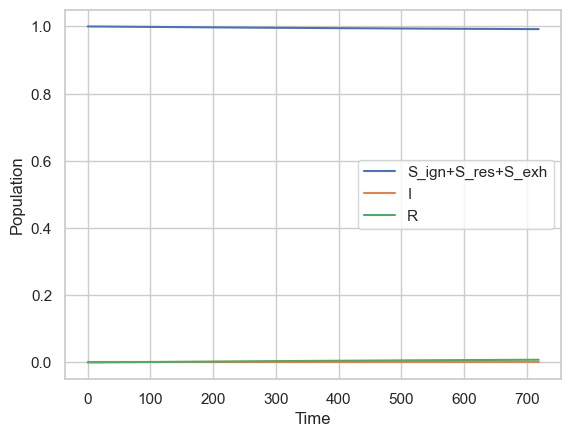

In [ ]:
# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5):
    S_ign, S_res, S_exh, I, R = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6
    dR_dt = r2

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

#starting point of wave
starting_point_index= 80
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = India_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]


# Define the time span
t =np.arange(0, len(India_wave), 1) # Start and end times

# Rate constants
k3 = 1
k4 = 1/50
k5 = 1/100

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)

# Solve ODE
sol = odeint(model, y0, t, args=(a, b, k3, k4, k5))
p = 1 - sol[:, 0] - sol[:, 1] - sol[:, 2]
error = np.mean(np.square(p - India_wave['norm_data']))
print("error = ", error)


# Plot results
plt.plot(t, sol[:, 0]+sol[:, 1]+sol[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol[:, 3], label='I')
plt.plot(t, sol[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


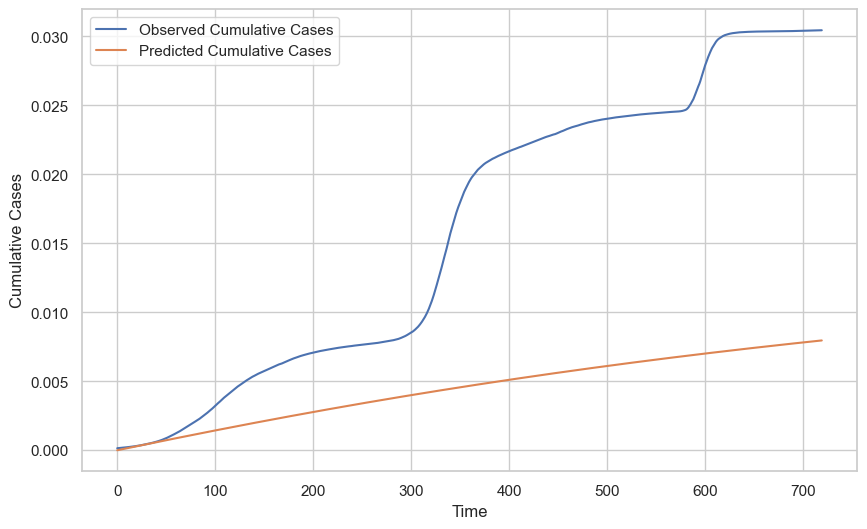

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, India_wave['norm_data'], label='Observed Cumulative Cases')
plt.plot(t, p, label='Predicted Cumulative Cases')
plt.xlabel('Time')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.show()

# Optimal parameters

error =  0.0005949172780571495


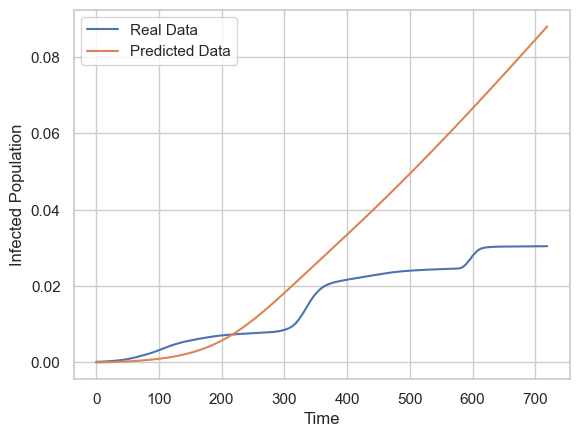

Optimal Parameters: [0.02348059 0.0051295  0.99999999 0.00583569 0.02929332]


In [ ]:
# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5):
    S_ign, S_res, S_exh, I, R = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6
    dR_dt = r2

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

# Define the objective function (MSE)
def objective(params, *args):
    t, y0, real_data = args
    sol = odeint(model, y0, t, args=tuple(params))
    predicted_data = sol[:, 3]  # I column
    mse = np.mean((predicted_data - real_data)**2)
    return mse


# Real-world data (replace this with your actual data)

real_data = India_wave['norm_data']

# Time grid
t = np.arange(len(real_data))


y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]

# Initial guess for parameters
initial_params = [a, b, k3, k4, k5]


# Minimize the objective function (MSE)
result = minimize(objective, initial_params, args=(t, y0, real_data),bounds=[(0, 1)]*5, method='L-BFGS-B')

# Extract the optimal parameters
optimal_params = result.x

# Solve ODE with optimal parameters
sol_optimal = odeint(model, y0, t, args=tuple(optimal_params))
p = 1 - sol_optimal[:, 0] - sol_optimal[:, 1] - sol_optimal[:, 2]
error = np.mean(np.square(p - India_wave['norm_data']))
print("error = ", error)

# Plot real data and predicted data
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

print("Optimal Parameters:", optimal_params)


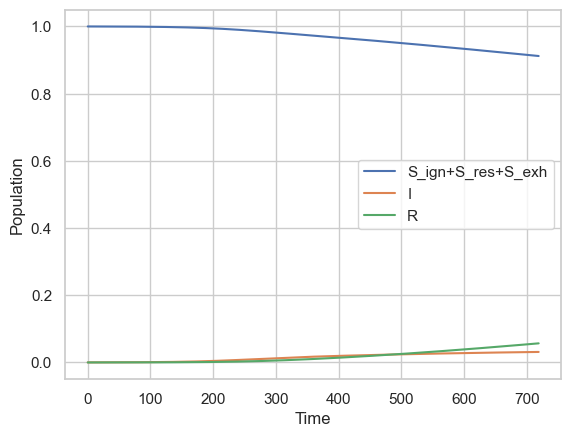

In [ ]:
# Plot results
plt.plot(t, sol_optimal[:, 0]+sol_optimal[:, 1]+sol_optimal[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol_optimal[:, 3], label='I')
plt.plot(t, sol_optimal[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

# Modificcation 1 (Introduce an Intervention Phase)

starting Date =  80
starting cases value =  0.00014649938621156782
a =  0.10004027779940797
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.00014649938621156782
k3 =  1
k4 =  0.02
k5 =  0.01
k_intervene =  0.3
error =  0.00019931290200567048


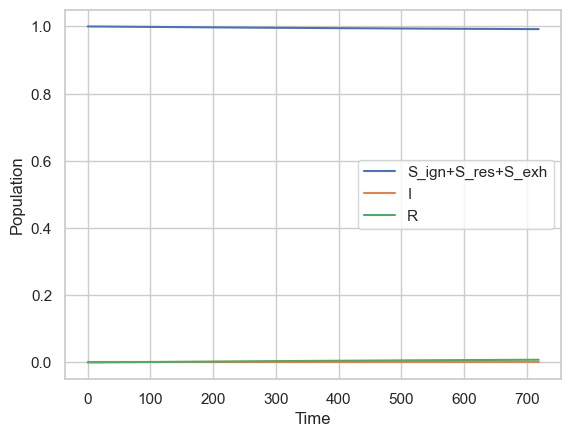

In [ ]:
# Function that returns dS_ign/dt, dS_res/dt, dS_exh/dt, dI/dt, dR/dt
def model(y, t, a, b, k3, k4, k5, k_intervene):
    S_ign, S_res, S_exh, I, R, I_intervene = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I
    r_intervene = k_intervene * I_intervene

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - r_intervene
    dR_dt = r2
    dI_intervene_dt = r_intervene

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt, dI_intervene_dt]

#starting point of wave
starting_point_index= 80
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = India_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0
dI_intervene_dt_0=0
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0,dI_intervene_dt_0]

t =np.arange(0, len(India_wave), 1)

# Rate constants
k3 = 1
k4 = 1/50
k5 = 1/100
k_intervene=0.3

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)
print("k_intervene = ",k_intervene)

# Solve ODE
sol = odeint(model, y0, t, args=(a, b, k3, k4, k5,k_intervene))
p = 1 - sol[:, 0] - sol[:, 1] - sol[:, 2]-sol[:,5]

error = np.mean(np.square(p - India_wave['norm_data']))
print("error = ", error)
# Plot results
plt.plot(t, sol[:, 0]+sol[:, 1]+sol[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol[:, 3], label='I')
plt.plot(t, sol[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

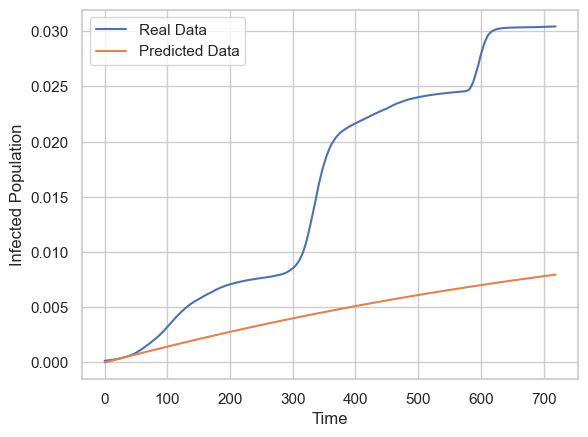

In [ ]:
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

# Modification 3: Time-Varying Recovery Rate

starting Date =  80
starting cases value =  0.00014649938621156782
a =  0.10004027779940797
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.00014649938621156782
k3 =  1
k4 =  0.02
k5 =  0.01
k_recovery =  0.005
error =  0.00021930813320323065


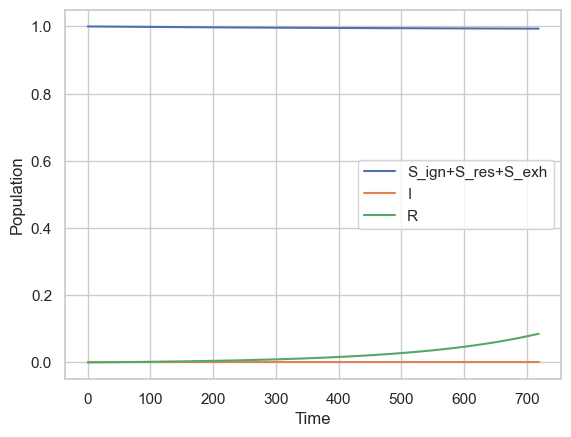

In [ ]:
def model(y, t, a, b, k3, k4, k5, k_recovery):
    S_ign, S_res, S_exh, I, R = y

    r1 = a * S_ign * I
    r2 = b * I
    r3 = k3 * S_ign * I
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r_recovery = k_recovery * R

    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5
    dI_dt = r1 - r2
    dR_dt = r2 + r_recovery

    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

#starting point of wave
starting_point_index= 80
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = India_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0

y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]

t =np.arange(0, len(India_wave), 1)

# Rate constants
k3 = 1
k4 = 1/50
k5 = 1/100
k_recovery=1/200

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)
print("k_recovery = ",k_recovery)
# Solve ODE
sol = odeint(model, y0, t, args=(a, b, k3, k4, k5,k_recovery))
p = 1 - sol[:, 0] - sol[:, 1] - sol[:, 2]

error = np.mean(np.square(p - India_wave['norm_data']))
print("error = ", error)
# Plot results
plt.plot(t, sol[:, 0]+sol[:, 1]+sol[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, sol[:, 3], label='I')
plt.plot(t, sol[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


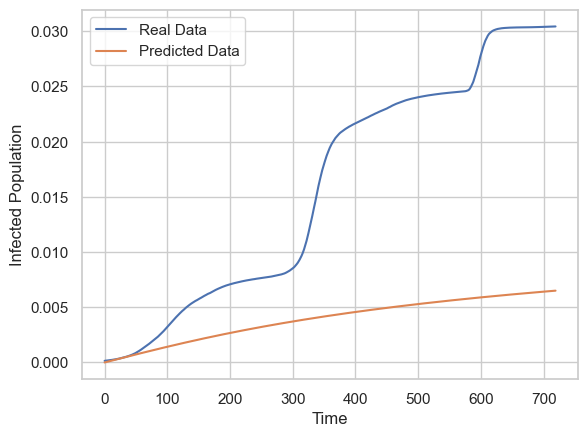

In [ ]:
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

# Crowd Effect

starting Date =  80
starting cases value =  0.00014649938621156782
a =  0.10004027779940797
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.00014649938621156782
k4 =  0.02
k5 =  0.01
Ip =  0.02
k  =  0.01
q  =  0.5
error =  0.00018473269493977226


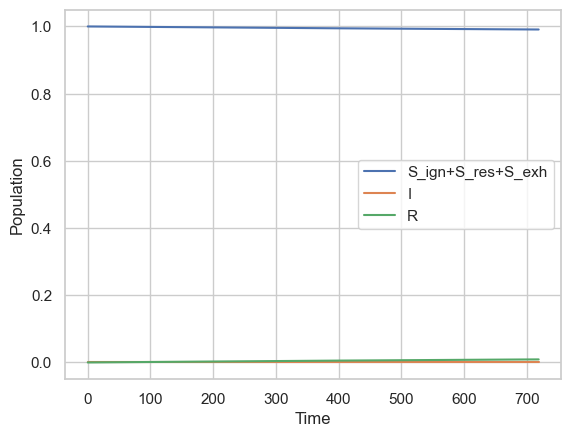

In [ ]:
# Define the system of ODEs with the new reaction
def model(y, t, a, b, q, k4, k5, Ip):
    S_ign, S_res, S_exh, I, R = y
    
    r1 = a * S_ign * I
    r2 = b * I
    r3 = q * S_ign * I**2
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    
    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - 2*r3  # Two times the effect due to the 2I in the reaction
    dR_dt = r2
    
    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

#starting point of wave
starting_point_index= 80
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = India_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0

# Initial conditions
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]  # S_ign(0) = 1, S_res(0) = S_exh(0) = I(0) = R(0) = 0

t =np.arange(0, len(India_wave), 1)

# Rate constants

k4 = 1/50
k5 = 1/100

# Crowd effect parameters
Ip = 0.02
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip


print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k4 = ",k4)
print("k5 = ",k5)
print("Ip = ",Ip)
print("k  = ",k )
print("q  = ",q )

# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip))

p = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign, S_res, S_exh, I, R = solution.T

error = np.mean(np.square(p - India_wave['norm_data']))
print("error = ", error)

# Plot results
plt.plot(t, solution[:, 0]+solution[:, 1]+solution[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, solution[:, 3], label='I')
plt.plot(t, solution[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

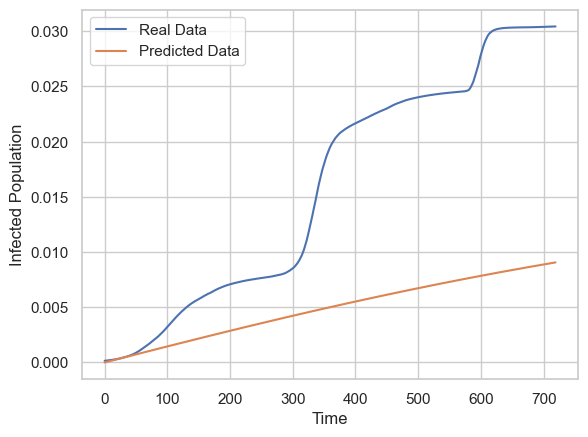

In [ ]:
plt.plot(t, real_data, label='Real Data')
plt.plot(t, p, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.show()

# optimal parameters

Optimal Parameters: [0.01628908 0.         0.30076942 0.06937928 0.         0.02      ]
error =  0.0029584057376647456


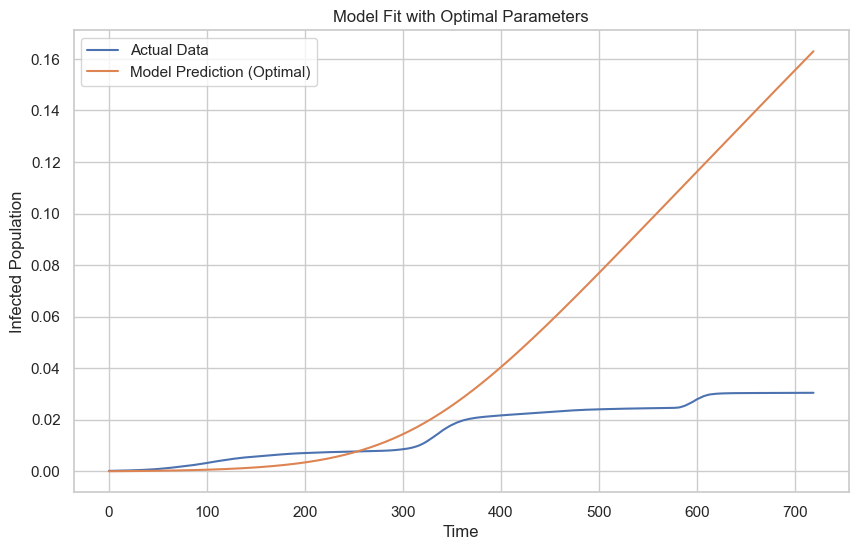

In [ ]:
# Define the system of ODEs with the new reaction
def model(y, t, a, b, q, k4, k5, Ip):
    S_ign, S_res, S_exh, I, R = y
    
    r1 = a * S_ign * I
    r2 = b * I
    r3 = q * S_ign * I**2
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I
    
    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - 2*r3
    dR_dt = r2
    
    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

# Define the objective function to minimize (MSE)
def objective(params, *args):
    t, data = args
    a, b, q, k4, k5, Ip = params
    solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip))
    model_predictions = solution[:, 3]  # I column represents the infected population
    mse = np.mean((model_predictions - data)**2)
    return mse

t =np.arange(0, len(India_wave), 1)

actual_data = India_wave['norm_data']

# Initial guess for parameters
initial_params = [a, b, q, k4, k5, Ip]

# Perform the optimization
result = minimize(objective, initial_params, args=(t, actual_data),bounds=[(0, 1)]*6, method='L-BFGS-B')

# Extract the optimal parameters
optimal_params = result.x

# Print the optimal parameters
print("Optimal Parameters:", optimal_params)

# Plotting the results using the optimal parameters
solution = odeint(model, y0, t, args=tuple(optimal_params))
S_ign, S_res, S_exh, I, R = solution.T
p = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]

error = np.mean(np.square(p - India_wave['norm_data']))
print("error = ", error)

plt.figure(figsize=(10, 6))
plt.plot(t, actual_data, label='Actual Data')
plt.plot(t, p, label='Model Prediction (Optimal)')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.legend()
plt.title('Model Fit with Optimal Parameters')
plt.show()

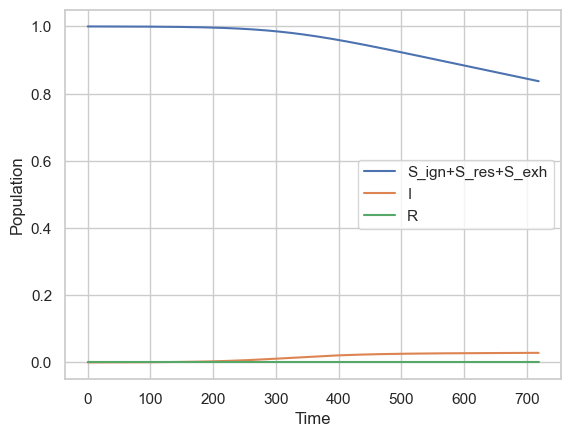

In [ ]:
# Plot results
plt.plot(t, solution[:, 0]+solution[:, 1]+solution[:, 2], label='S_ign+S_res+S_exh')
plt.plot(t, solution[:, 3], label='I')
plt.plot(t, solution[:, 4], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

# Different initial values of Ip


starting Date =  80
starting cases value =  0.00014649938621156782
a =  0.10004027779940797
b =  0.1
S_ign_0 =  1
S_res_0 =  0.0
S_exh_0 =  0.0
RO =  0.0
IO =  0.00014649938621156782
k3 =  1
k4 =  0.02
k5 =  0.01
Ip1 =  0.02
k  =  0.01
q  =  0.5
error =  0.00018473269493977226
Ip2 =  0.06
k  =  0.01
q  =  0.16666666666666669
error =  0.00018135380517107533
Ip3 =  0.07
k  =  0.01
q  =  0.14285714285714285
error =  0.00018110547852675902


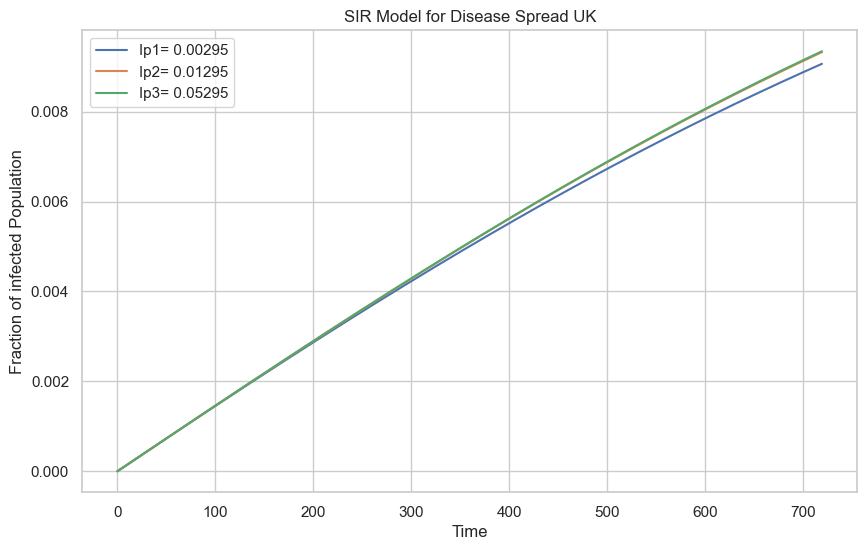

In [ ]:
# Define the system of ODEs with the new reaction
def model(y, t, a, b, q, k4, k5, Ip):
    S_ign, S_res, S_exh, I, R = y
    
    r1 = a * S_ign * I
    r2 = b * I
    r3 = q * S_ign * I**2
    r4 = k4 * S_res
    r5 = k5 * S_exh
    r6 = a * S_exh * I

    
    dS_ign_dt = -r1 - r3 + r5
    dS_res_dt = r3 - r4
    dS_exh_dt = r4 - r5 - r6
    dI_dt = r1 - r2 + r6 - 2*r3  # Two times the effect due to the 2I in the reaction
    dR_dt = r2
    
    return [dS_ign_dt, dS_res_dt, dS_exh_dt, dI_dt, dR_dt]

#starting point of wave
starting_point_index= 80
print("starting Date = ",starting_point_index)
# Extract cumulative cases at the starting point
cumulative_cases_at_start = India_wave.loc[starting_point_index,'norm_data']
print("starting cases value = ",cumulative_cases_at_start)

tau = 10  # τ ≈ 10 days
b = 1 / tau
# Parameters
a = r+b  # Rate constant for SIR model

# Initial conditions
S_ign_0 = 1
S_res_0 = 0.0
S_exh_0 = 0.0
I_0 = cumulative_cases_at_start
R_0 = 0.0

# Initial conditions
y0 = [S_ign_0, S_res_0, S_exh_0, I_0, R_0]  # S_ign(0) = 1, S_res(0) = S_exh(0) = I(0) = R(0) = 0

# Time points
t = np.arange(0, len(India_wave), 1)

# Rate constants

k4 = 1/50
k5 = 1/100

# Crowd effect parameters
Ip1 = 0.02
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip1

print("a = ",a)
print("b = ",b)
print("S_ign_0 = ",S_ign_0)
print("S_res_0 = ",S_res_0)
print("S_exh_0 = ",S_exh_0)
print("RO = ",R_0)
print("IO = ",I_0)
print("k3 = ",k3)
print("k4 = ",k4)
print("k5 = ",k5)
print("Ip1 = ",Ip1)
print("k  = ",k )
print("q  = ",q )



# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip1))

p1 = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign1, S_res1, S_exh1, I1, R1 = solution.T

error = np.mean(np.square(p1 - India_wave['norm_data']))
print("error = ", error)



# second I0

# Crowd effect parameters
Ip2 = 0.06
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip2

print("Ip2 = ",Ip2)
print("k  = ",k )
print("q  = ",q )
# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip2))

p2 = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign2, S_res2, S_exh2, I2, R2 = solution.T

error = np.mean(np.square(p2 - India_wave['norm_data']))
print("error = ", error)


# third I0

# Crowd effect parameters
Ip3 = 0.07
k = 0.01  # You can adjust this value based on your scenario

# Calculate q based on the specified condition
q = k / Ip3

print("Ip3 = ",Ip3)
print("k  = ",k )
print("q  = ",q )
# Solve ODEs
solution = odeint(model, y0, t, args=(a, b, q, k4, k5, Ip3))

p3 = 1 - solution[:, 0] - solution[:, 1] - solution[:, 2]
# Extracting the results
S_ign3, S_res3, S_exh3, I3, R3 = solution.T

error = np.mean(np.square(p3 - India_wave['norm_data']))
print("error = ", error)




# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, p1, label='Ip1= 0.00295')
plt.plot(t, p2, label='Ip2= 0.01295')
plt.plot(t, p3, label='Ip3= 0.05295')
plt.xlabel('Time')
plt.ylabel('Fraction of infected Population')
plt.legend()
plt.title('SIR Model for Disease Spread UK')
plt.show()